## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from itertools import combinations
import requests
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
import json
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
with open("data/zip_dic.json", "r") as zzd:
    zip_dic = json.load(zzd)

# Exploratory

In [4]:
data_df = pd.read_csv('data/kc_house_data.csv')

In [3]:
data_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Deal with nulls and convert to numeric

Issues -
nulls - waterfront, view, yr_renovated
date - wrong datatype
sqft_basement - why is it object?
zipcode probably shouldbe string



## investigate

In [ ]:
#waterfornt values

In [4]:
data_df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [44]:
p_waterfront = 146/(19075+146)
p_waterfront 

0.007595858696217679

In [45]:
likely_wrong = p_waterfront * (21597-19221)
likely_wrong

18.047760262213206

In [36]:
# dont want to use median or mean as it is a binary column,
# filling in the nans randomly using probability observed in the recorded data
# gives us no advantage over just using 0 given as there its far more likely
# that a 1 one erroneously fall on a 0 rather than correctly on a 1. 
# Only around 18 false values likley, so not going to skew values too much

In [46]:
data_df['yr_renovated'].value_counts()

0.000000       17011
2014.000000       73
2003.000000       31
2013.000000       31
2007.000000       30
               ...  
1946.000000        1
1959.000000        1
1971.000000        1
1951.000000        1
1954.000000        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
# replace with 0 as that is the dummy value for places that haven't been done up
# possibly worth making into a new feature of renovted v not renovated, and then 
# testing relantionship between year renovated and price

In [9]:
data_df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

## deal with

In [ ]:
#assume the nans are no views

In [5]:
data_df = data_df.fillna({'waterfront' : 0, 'view' : 0, 'yr_renovated': 0,  'view' : 0})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
data_df["date"] = pd.to_datetime(data_df["date"])


In [7]:
data_df['year_sold'] = data_df['date'].dt.year
data_df['month_sold'] = data_df['date'].dt.month
data_df['date_sold'] = data_df['date'].dt.day
data_df.drop('date', axis=1, inplace=True)


In [7]:
data_df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2190.0        1
652.0         1
2050.0        1
1798.0        1
207.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [8]:
#insert 0
data_df['sqft_basement'].replace(to_replace='?', value=0.0, inplace=True)
data_df['sqft_basement'] = data_df['sqft_basement'].astype(float)
data_df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

# Split into test/train and create baseline model

In [9]:
y_base = data_df["price"]
X_base = data_df.drop("price", axis=1)

In [14]:
x_int = sm.add_constant(X_base)
baseline = sm.OLS(y_base,x_int).fit()
baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2308.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:03:35   Log-Likelihood:            -2.9432e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21574   BIC:                         5.889e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.682e+07   9.97e+06     -6.701      0.000   -8.64e+07   -4.73e+07
id            -1.348e-06   4.81e-07     -2.801      0.005   -2.29e-06   -4.05e-07
bedrooms      -3.611e+04   1895.453    -19.050      0.000   -3.98e+04   -3.24e+04
bathrooms      4.185e+04   3253.776     12.862      0.000    3.55e+04    4.82e+04
sqft_living     103.7644     18.027      5.756      0.000      68.431     139.098
sqft_lot          0.1177      0.048      2.459      0.014       0.024       0.211
floors         7644.5741   3591.351      2.129      0.033     605.261    1.47e+04
waterfront     6.188e+05   1.81e+04     34.212      0.000    5.83e+05    6.54e+05
view           5.316e+04   2117.328     25.109      0.000     4.9e+04    5.73e+04
condition      2.807e+04   2344.433     11.971      0.000    2.35e+04    3.27e+04
grade          9.726e+04   2155.477     45.122      0.000     9.3e+04    1.01e+05
sqft_above       77.0668     18.018      4.277      0.000      41.750     112.383
sqft_basement    46.9048     17.858      2.627      0.009      11.902      81.908
yr_built      -2639.9001     71.732    -36.802      0.000   -2780.500   -2499.300
yr_renovated     24.4748      3.968      6.169      0.000      16.698      32.252
zipcode        -584.8168     32.901    -17.775      0.000    -649.306    -520.328
lat            6.027e+05   1.07e+04     56.260      0.000    5.82e+05    6.24e+05
long          -2.156e+05   1.31e+04    -16.405      0.000   -2.41e+05    -1.9e+05
sqft_living15    21.5470      3.441      6.262      0.000      14.802      28.292
sqft_lot15       -0.4007      0.073     -5.464      0.000      -0.544      -0.257
year_sold      3.657e+04   4721.636      7.746      0.000    2.73e+04    4.58e+04
month_sold     1130.0414    708.768      1.594      0.111    -259.197    2519.280
date_sold      -360.8721    159.163     -2.267      0.023    -672.843     -48.902
==============================================================================
Omnibus:                    18405.094   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1877386.440
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.112   Cond. No.                     3.95e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# big problems with JB no, residuals are definitely not normal

# Preparation

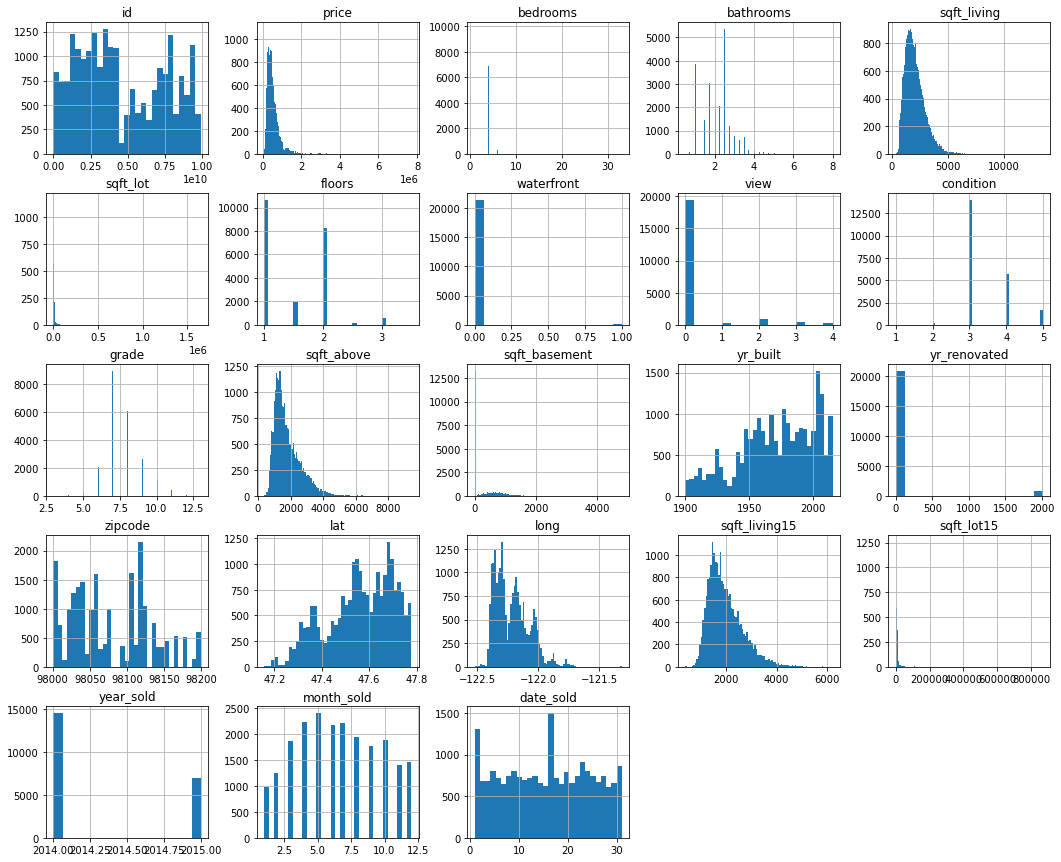

In [53]:
data_df.hist(figsize=(18,15), bins='auto');

In [54]:
data_df['bedrooms'].sort_values(ascending=False)


15856    33
8748     11
19239    10
13301    10
15147    10
         ..
12823     1
14340     1
14332     1
9536      1
9877      1
Name: bedrooms, Length: 21597, dtype: int64

In [15]:
data_df = data_df.drop(15856)
data_df['bedrooms'].sort_values(ascending=False)

8748     11
13301    10
15147    10
19239    10
4231      9
         ..
12823     1
14340     1
14332     1
9536      1
9877      1
Name: bedrooms, Length: 21596, dtype: int64

In [56]:
data_df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [16]:
pd.set_option('float_format', '{:f}'.format)

In [21]:
data_df['sqft_lot'].describe()

count     21596.000000
mean      15099.830107
std       41413.549419
min         520.000000
25%        5040.000000
50%        7619.000000
75%       10685.500000
max     1651359.000000
Name: sqft_lot, dtype: float64

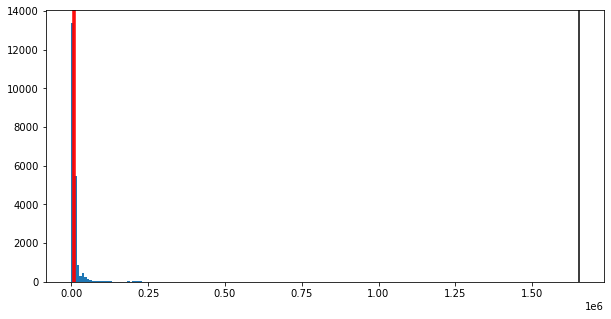

In [58]:
plt.figure(figsize=(10,5))
plt.axvline(x=5040, color='red')
plt.axvline(x=7618, color='red')
plt.axvline(x=10685, color='red')
plt.axvline(x=1651359, color='black')
plt.hist(data_df['sqft_lot'], bins =200);

In [23]:
data_df['sqft_lot'].sort_values(ascending=False).head(20)

1717     1651359
17305    1164794
7640     1074218
7762     1024068
3945      982998
4437      982278
6685      920423
7070      881654
20436     871200
9705      871200
4536      843309
12993     715690
13464     641203
16174     623779
7287      577605
17811     542322
17562     533610
12906     507038
2962      505166
20405     503989
Name: sqft_lot, dtype: int64

In [17]:
data_df = data_df.drop(1717)
data_df['sqft_lot'].sort_values(ascending=False).head(20)

17305    1164794
7640     1074218
7762     1024068
3945      982998
4437      982278
6685      920423
7070      881654
9705      871200
20436     871200
4536      843309
12993     715690
13464     641203
16174     623779
7287      577605
17811     542322
17562     533610
12906     507038
2962      505166
20405     503989
17335     501376
Name: sqft_lot, dtype: int64

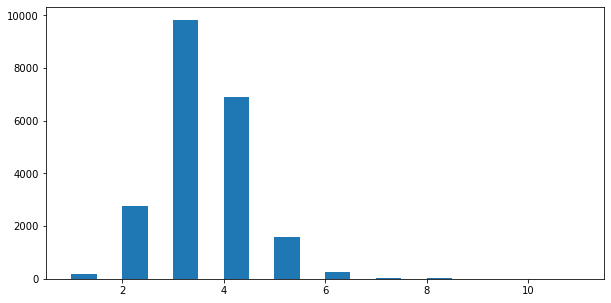

In [60]:
plt.figure(figsize=(10,5))
plt.hist(data_df['bedrooms'], bins =20);

In [61]:
print(len(data_df))

21595


In [62]:
13279/21595

0.6149108589951378

In [ ]:
#turn into binary

In [15]:
data_df.groupby(['sqft_basement']).count()


id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
sqft_basement                                                             
0.000000       13279  13279     13279      13279        13279     13279   
10.000000          2      2         2          2            2         2   
20.000000          1      1         1          1            1         1   
40.000000          4      4         4          4            4         4   
50.000000         11     11        11         11           11        11   
...              ...    ...       ...        ...          ...       ...   
3260.000000        1      1         1          1            1         1   
3480.000000        1      1         1          1            1         1   
3500.000000        1      1         1          1            1         1   
4130.000000        1      1         1          1            1         1   
4820.000000        1      1         1          1            1         1   

               floors  waterfront   view  condition  ...  yr_built  \
sqft_basement                                        ...             
0.000000        13279       13279  13279      13279  ...     13279   
10.000000           2           2      2          2  ...         2   
20.000000           1           1      1          1  ...         1   
40.000000           4           4      4          4  ...         4   
50.000000          11          11     11         11  ...        11   
...               ...         ...    ...        ...  ...       ...   
3260.000000         1           1      1          1  ...         1   
3480.000000         1           1      1          1  ...         1   
3500.000000         1           1      1          1  ...         1   
4130.000000         1           1      1          1  ...         1   
4820.000000         1           1      1          1  ...         1   

               yr_renovated  zipcode    lat   long  sqft_living15  sqft_lot15  \
sqft_basement                                                                   
0.000000              13279    13279  13279  13279          13279       13279   
10.000000                 2        2      2      2              2           2   
20.000000                 1        1      1      1              1           1   
40.000000                 4        4      4      4              4           4   
50.000000                11       11     11     11             11          11   
...                     ...      ...    ...    ...            ...         ...   
3260.000000               1        1      1      1              1           1   
3480.000000               1        1      1      1              1           1   
3500.000000               1        1      1      1              1           1   
4130.000000               1        1      1      1              1           1   
4820.000000               1        1      1      1              1           1   

               year_sold  month_sold  date_sold  
sqft_basement                                    
0.000000           13279       13279      13279  
10.000000              2           2          2  
20.000000              1           1          1  
40.000000              4           4          4  
50.000000             11          11         11  
...                  ...         ...        ...  
3260.000000            1           1          1  
3480.000000            1           1          1  
3500.000000            1           1          1  
4130.000000            1           1          1  
4820.000000            1           1          1  

[303 rows x 22 columns]

In [18]:
data_df.loc[(data_df.sqft_basement > 0), 'sqft_basement'] = 1

In [103]:
data_df['sqft_basement'].value_counts()

0.000000    13279
1.000000     8316
Name: sqft_basement, dtype: int64

In [31]:
data_df.groupby(['yr_renovated']).count()

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
yr_renovated                                                             
0.000000      20851  20851     20851      20851        20851     20851   
1934.000000       1      1         1          1            1         1   
1940.000000       2      2         2          2            2         2   
1944.000000       1      1         1          1            1         1   
1945.000000       3      3         3          3            3         3   
...             ...    ...       ...        ...          ...       ...   
2011.000000       9      9         9          9            9         9   
2012.000000       8      8         8          8            8         8   
2013.000000      31     31        31         31           31        31   
2014.000000      73     73        73         73           73        73   
2015.000000      14     14        14         14           14        14   

              floors  waterfront   view  condition  ...  sqft_basement  \
yr_renovated                                        ...                  
0.000000       20851       20851  20851      20851  ...          20851   
1934.000000        1           1      1          1  ...              1   
1940.000000        2           2      2          2  ...              2   
1944.000000        1           1      1          1  ...              1   
1945.000000        3           3      3          3  ...              3   
...              ...         ...    ...        ...  ...            ...   
2011.000000        9           9      9          9  ...              9   
2012.000000        8           8      8          8  ...              8   
2013.000000       31          31     31         31  ...             31   
2014.000000       73          73     73         73  ...             73   
2015.000000       14          14     14         14  ...             14   

              yr_built  zipcode    lat   long  sqft_living15  sqft_lot15  \
yr_renovated                                                               
0.000000         20851    20851  20851  20851          20851       20851   
1934.000000          1        1      1      1              1           1   
1940.000000          2        2      2      2              2           2   
1944.000000          1        1      1      1              1           1   
1945.000000          3        3      3      3              3           3   
...                ...      ...    ...    ...            ...         ...   
2011.000000          9        9      9      9              9           9   
2012.000000          8        8      8      8              8           8   
2013.000000         31       31     31     31             31          31   
2014.000000         73       73     73     73             73          73   
2015.000000         14       14     14     14             14          14   

              year_sold  month_sold  date_sold  
yr_renovated                                    
0.000000          20851       20851      20851  
1934.000000           1           1          1  
1940.000000           2           2          2  
1944.000000           1           1          1  
1945.000000           3           3          3  
...                 ...         ...        ...  
2011.000000           9           9          9  
2012.000000           8           8          8  
2013.000000          31          31         31  
2014.000000          73          73         73  
2015.000000          14          14         14  

[70 rows x 22 columns]

In [19]:
data_df.loc[(0 < data_df['yr_renovated']) & (data_df['yr_renovated'] <= 2000), 'yr_renovated'] =1
data_df.loc[(data_df.yr_renovated >= 1999), 'yr_renovated'] = 2

In [20]:

data_df['yr_renovated'].unique()

array([0., 1., 2.])

In [21]:
data_df['sqft_living15'].corr(data_df['sqft_living'])

0.7564576129985509

In [22]:
data_df['sqft_lot15'].corr(data_df['sqft_lot'])

0.7207424689600423

In [23]:
data_df = data_df.drop(['sqft_lot15', 'sqft_living15'], axis=1)
data_df

id         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 221900.000000         3   1.000000         1180      5650   
1      6414100192 538000.000000         3   2.250000         2570      7242   
2      5631500400 180000.000000         2   1.000000          770     10000   
3      2487200875 604000.000000         4   3.000000         1960      5000   
4      1954400510 510000.000000         3   2.000000         1680      8080   
...           ...           ...       ...        ...          ...       ...   
21592   263000018 360000.000000         3   2.500000         1530      1131   
21593  6600060120 400000.000000         4   2.500000         2310      5813   
21594  1523300141 402101.000000         2   0.750000         1020      1350   
21595   291310100 400000.000000         3   2.500000         1600      2388   
21596  1523300157 325000.000000         2   0.750000         1020      1076   

        floors  waterfront     view  condition  ...  sqft_above  \
0     1.000000    0.000000 0.000000          3  ...        1180   
1     2.000000    0.000000 0.000000          3  ...        2170   
2     1.000000    0.000000 0.000000          3  ...         770   
3     1.000000    0.000000 0.000000          5  ...        1050   
4     1.000000    0.000000 0.000000          3  ...        1680   
...        ...         ...      ...        ...  ...         ...   
21592 3.000000    0.000000 0.000000          3  ...        1530   
21593 2.000000    0.000000 0.000000          3  ...        2310   
21594 2.000000    0.000000 0.000000          3  ...        1020   
21595 2.000000    0.000000 0.000000          3  ...        1600   
21596 2.000000    0.000000 0.000000          3  ...        1020   

       sqft_basement  yr_built  yr_renovated  zipcode       lat        long  \
0           0.000000      1955      0.000000    98178 47.511200 -122.257000   
1           1.000000      1951      1.000000    98125 47.721000 -122.319000   
2           0.000000      1933      0.000000    98028 47.737900 -122.233000   
3           1.000000      1965      0.000000    98136 47.520800 -122.393000   
4           0.000000      1987      0.000000    98074 47.616800 -122.045000   
...              ...       ...           ...      ...       ...         ...   
21592       0.000000      2009      0.000000    98103 47.699300 -122.346000   
21593       0.000000      2014      0.000000    98146 47.510700 -122.362000   
21594       0.000000      2009      0.000000    98144 47.594400 -122.299000   
21595       0.000000      2004      0.000000    98027 47.534500 -122.069000   
21596       0.000000      2008      0.000000    98144 47.594100 -122.299000   

       year_sold  month_sold  date_sold  
0           2014          10         13  
1           2014          12          9  
2           2015           2         25  
3           2014          12          9  
4           2015           2         18  
...          ...         ...        ...  
21592       2014           5         21  
21593       2015           2         23  
21594       2014           6         23  
21595       2015           1         16  
21596       2014          10         15  

[21595 rows x 21 columns]

In [24]:
y_2 = data_df["price"]
X_2 = data_df.drop("price", axis=1)

In [25]:
x_int = sm.add_constant(X_2)
model2_train = sm.OLS(y_2,x_int).fit()
model2_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2540.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:04:41   Log-Likelihood:            -2.9430e+05
No. Observations:               21595   AIC:                         5.886e+05
Df Residuals:                   21574   BIC:                         5.888e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.468e+07   9.96e+06     -6.495      0.000   -8.42e+07   -4.52e+07
id            -1.193e-06    4.8e-07     -2.484      0.013   -2.13e-06   -2.52e-07
bedrooms      -3.938e+04   1973.773    -19.951      0.000   -4.32e+04   -3.55e+04
bathrooms      4.198e+04   3280.118     12.799      0.000    3.56e+04    4.84e+04
sqft_living     157.7750      5.956     26.491      0.000     146.101     169.449
sqft_lot         -0.1019      0.036     -2.795      0.005      -0.173      -0.030
floors         5363.8780   3566.255      1.504      0.133   -1626.245    1.24e+04
waterfront     6.137e+05   1.81e+04     33.962      0.000    5.78e+05    6.49e+05
view           5.483e+04   2092.166     26.207      0.000    5.07e+04    5.89e+04
condition      2.806e+04   2347.216     11.954      0.000    2.35e+04    3.27e+04
grade          1.005e+05   2074.782     48.439      0.000    9.64e+04    1.05e+05
sqft_above       33.4616      6.522      5.131      0.000      20.679      46.244
sqft_basement -1780.4080   5055.879     -0.352      0.725   -1.17e+04    8129.488
yr_built      -2629.0654     71.430    -36.806      0.000   -2769.073   -2489.057
yr_renovated    4.05e+04   5064.173      7.998      0.000    3.06e+04    5.04e+04
zipcode        -606.6003     32.795    -18.497      0.000    -670.880    -542.321
lat            6.072e+05   1.07e+04     56.718      0.000    5.86e+05    6.28e+05
long          -2.089e+05    1.3e+04    -16.111      0.000   -2.34e+05   -1.83e+05
year_sold      3.686e+04   4721.763      7.807      0.000    2.76e+04    4.61e+04
month_sold     1140.5388    708.732      1.609      0.108    -248.628    2529.706
date_sold      -378.4165    159.161     -2.378      0.017    -690.383     -66.450
==============================================================================
Omnibus:                    18069.710   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1740732.774
Skew:                           3.487   Prob(JB):                         0.00
Kurtosis:                      46.428   Cond. No.                     3.94e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

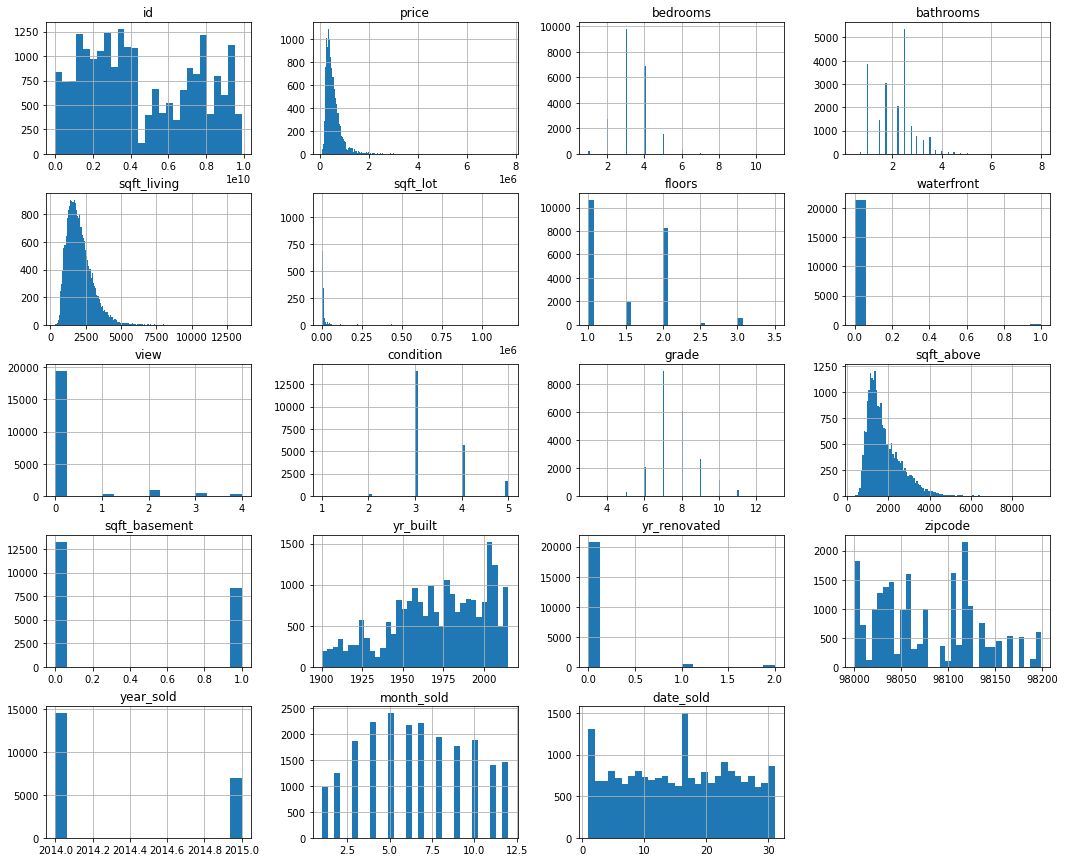

In [76]:
data_df.hist(figsize=(18,15), bins='auto');

In [112]:
cont_list = ['price', 'sqft_living', 'sqft_lot', 'sqft_above']
cat_list = ['waterfront', 'sqft_basement']
ambiguous_list = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'yr_renovated']
cont_amb = [x for x in cont_list]
cont_amb.extend(ambiguous_list)

# yr_sold, month_sold and date_sold are irrelevant to our needs, so get rid
# zipcode needs turning into somethin more useful, try converting to neighbourhoods using api
# yr_built could bing an add to ambiguous, speicifc year is not adding much info, rather gerneal 'newness'
# check ids for duplicates

In [27]:
data_df = data_df.drop(['year_sold', 'month_sold', 'date_sold'], axis=1)

In [28]:
#1900 to 2015 - bin every decade
bins = [1899, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
data_df['yr_built_binned'] = pd.cut(data_df['yr_built'], bins, labels=labels)


In [29]:
data_df['yr_built_binned'] = data_df['yr_built_binned'].astype(int)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21595 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21595 non-null  int64  
 1   price            21595 non-null  float64
 2   bedrooms         21595 non-null  int64  
 3   bathrooms        21595 non-null  float64
 4   sqft_living      21595 non-null  int64  
 5   sqft_lot         21595 non-null  int64  
 6   floors           21595 non-null  float64
 7   waterfront       21595 non-null  float64
 8   view             21595 non-null  float64
 9   condition        21595 non-null  int64  
 10  grade            21595 non-null  int64  
 11  sqft_above       21595 non-null  int64  
 12  sqft_basement    21595 non-null  float64
 13  yr_built         21595 non-null  int64  
 14  yr_renovated     21595 non-null  float64
 15  zipcode          21595 non-null  int64  
 16  lat              21595 non-null  float64
 17  long        

In [30]:
data_df.reset_index(drop=True, inplace=True)

In [31]:
ambiguous_list.append('yr_built_binned')


In [313]:
zip_list = data_df['zipcode'].unique().tolist()
zip_list

[98178,
 98125,
 98028,
 98136,
 98074,
 98053,
 98003,
 98198,
 98146,
 98038,
 98007,
 98115,
 98107,
 98126,
 98019,
 98103,
 98002,
 98133,
 98040,
 98092,
 98030,
 98119,
 98112,
 98052,
 98027,
 98117,
 98058,
 98001,
 98056,
 98166,
 98023,
 98070,
 98148,
 98105,
 98042,
 98008,
 98059,
 98122,
 98144,
 98004,
 98005,
 98034,
 98075,
 98116,
 98010,
 98118,
 98199,
 98032,
 98045,
 98102,
 98077,
 98108,
 98168,
 98177,
 98065,
 98029,
 98006,
 98109,
 98022,
 98033,
 98155,
 98024,
 98011,
 98031,
 98106,
 98072,
 98188,
 98014,
 98055,
 98039]

In [158]:
zip_dic = {}
for z in zip_list:
    url = f'http://api.geonames.org/postalCodeLookupJSON?postalcode={z}&country=US&username=JamesPheby'
    response=requests.get(url)
    town_r = json.loads(response.content.decode('utf-8')) 
    town = town_r['postalcodes'][0]['placeName']
    zip_dic[z]=town
zip_dic

{98178: 'Seattle',
 98125: 'Seattle',
 98028: 'Kenmore',
 98136: 'Seattle',
 98074: 'Sammamish',
 98053: 'Redmond',
 98003: 'Federal Way',
 98198: 'Seattle',
 98146: 'Seattle',
 98038: 'Maple Valley',
 98007: 'Bellevue',
 98115: 'Seattle',
 98107: 'Seattle',
 98126: 'Seattle',
 98019: 'Duvall',
 98103: 'Seattle',
 98002: 'Auburn',
 98133: 'Seattle',
 98040: 'Mercer Island',
 98092: 'Auburn',
 98030: 'Kent',
 98119: 'Seattle',
 98112: 'Seattle',
 98052: 'Redmond',
 98027: 'Issaquah',
 98117: 'Seattle',
 98058: 'Renton',
 98001: 'Auburn',
 98056: 'Renton',
 98166: 'Seattle',
 98023: 'Federal Way',
 98070: 'Vashon',
 98148: 'Seattle',
 98105: 'Seattle',
 98042: 'Kent',
 98008: 'Bellevue',
 98059: 'Renton',
 98122: 'Seattle',
 98144: 'Seattle',
 98004: 'Bellevue',
 98005: 'Bellevue',
 98034: 'Kirkland',
 98075: 'Sammamish',
 98116: 'Seattle',
 98010: 'Black Diamond',
 98118: 'Seattle',
 98199: 'Seattle',
 98032: 'Kent',
 98045: 'North Bend',
 98102: 'Seattle',
 98077: 'Woodinville',
 98108

In [27]:
zip_dic

{'98178': 'Seattle',
 '98125': 'Seattle',
 '98028': 'Kenmore',
 '98136': 'Seattle',
 '98074': 'Sammamish',
 '98053': 'Redmond',
 '98003': 'Federal Way',
 '98198': 'Seattle',
 '98146': 'Seattle',
 '98038': 'Maple Valley',
 '98007': 'Bellevue',
 '98115': 'Seattle',
 '98107': 'Seattle',
 '98126': 'Seattle',
 '98019': 'Duvall',
 '98103': 'Seattle',
 '98002': 'Auburn',
 '98133': 'Seattle',
 '98040': 'Mercer Island',
 '98092': 'Auburn',
 '98030': 'Kent',
 '98119': 'Seattle',
 '98112': 'Seattle',
 '98052': 'Redmond',
 '98027': 'Issaquah',
 '98117': 'Seattle',
 '98058': 'Renton',
 '98001': 'Auburn',
 '98056': 'Renton',
 '98166': 'Seattle',
 '98023': 'Federal Way',
 '98070': 'Vashon',
 '98148': 'Seattle',
 '98105': 'Seattle',
 '98042': 'Kent',
 '98008': 'Bellevue',
 '98059': 'Renton',
 '98122': 'Seattle',
 '98144': 'Seattle',
 '98004': 'Bellevue',
 '98005': 'Bellevue',
 '98034': 'Kirkland',
 '98075': 'Sammamish',
 '98116': 'Seattle',
 '98010': 'Black Diamond',
 '98118': 'Seattle',
 '98199': 'Se

In [159]:
with open("data/zip_dic.json", "w") as zd:
    json.dump(zip_dic, zd)

In [32]:
for index, row in data_df.iterrows(): 
    zipc = str(int(row['zipcode']))
    place = zip_dic[zipc].replace(" ", "")
    data_df.loc[index, 'PlaceName'] = place
data_df

id         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 221900.000000         3   1.000000         1180      5650   
1      6414100192 538000.000000         3   2.250000         2570      7242   
2      5631500400 180000.000000         2   1.000000          770     10000   
3      2487200875 604000.000000         4   3.000000         1960      5000   
4      1954400510 510000.000000         3   2.000000         1680      8080   
...           ...           ...       ...        ...          ...       ...   
21590   263000018 360000.000000         3   2.500000         1530      1131   
21591  6600060120 400000.000000         4   2.500000         2310      5813   
21592  1523300141 402101.000000         2   0.750000         1020      1350   
21593   291310100 400000.000000         3   2.500000         1600      2388   
21594  1523300157 325000.000000         2   0.750000         1020      1076   

        floors  waterfront     view  condition  grade  sqft_above  \
0     1.000000    0.000000 0.000000          3      7        1180   
1     2.000000    0.000000 0.000000          3      7        2170   
2     1.000000    0.000000 0.000000          3      6         770   
3     1.000000    0.000000 0.000000          5      7        1050   
4     1.000000    0.000000 0.000000          3      8        1680   
...        ...         ...      ...        ...    ...         ...   
21590 3.000000    0.000000 0.000000          3      8        1530   
21591 2.000000    0.000000 0.000000          3      8        2310   
21592 2.000000    0.000000 0.000000          3      7        1020   
21593 2.000000    0.000000 0.000000          3      8        1600   
21594 2.000000    0.000000 0.000000          3      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode       lat        long  \
0           0.000000      1955      0.000000    98178 47.511200 -122.257000   
1           1.000000      1951      1.000000    98125 47.721000 -122.319000   
2           0.000000      1933      0.000000    98028 47.737900 -122.233000   
3           1.000000      1965      0.000000    98136 47.520800 -122.393000   
4           0.000000      1987      0.000000    98074 47.616800 -122.045000   
...              ...       ...           ...      ...       ...         ...   
21590       0.000000      2009      0.000000    98103 47.699300 -122.346000   
21591       0.000000      2014      0.000000    98146 47.510700 -122.362000   
21592       0.000000      2009      0.000000    98144 47.594400 -122.299000   
21593       0.000000      2004      0.000000    98027 47.534500 -122.069000   
21594       0.000000      2008      0.000000    98144 47.594100 -122.299000   

       yr_built_binned  PlaceName  
0                    6    Seattle  
1                    6    Seattle  
2                    8    Kenmore  
3                    5    Seattle  
4                    3  Sammamish  
...                ...        ...  
21590                1    Seattle  
21591                0    Seattle  
21592                1    Seattle  
21593                1   Issaquah  
21594                1    Seattle  

[21595 rows x 20 columns]

In [634]:
data_df['PlaceName'].unique()

array(['Seattle', 'Kenmore', 'Sammamish', 'Redmond', 'FederalWay',
       'MapleValley', 'Bellevue', 'Duvall', 'Auburn', 'MercerIsland',
       'Kent', 'Issaquah', 'Renton', 'Vashon', 'Kirkland', 'BlackDiamond',
       'NorthBend', 'Woodinville', 'Snoqualmie', 'Enumclaw', 'FallCity',
       'Bothell', 'Carnation', 'Medina'], dtype=object)

In [33]:
no_zip_df=data_df.drop(['zipcode'], axis=1)


In [34]:
place_df = no_zip_df['PlaceName']
place_df = pd.get_dummies(place_df, drop_first=True)


In [35]:
#takes log, sq, 
skew_list=[]

def deskew(df, cont_list, method='log'):
    bcox_list=[]
    
    continuous = df.copy()
    continuous = continuous[cont_list]
    
    continuous = continuous.replace(0,0.000001)
    
    mean_before= np.mean(abs(continuous.skew()))
    print(f'before transform = {mean_before}')
   
    continuous_log = np.log(continuous)
    mean_log = np.mean(abs(continuous_log.skew()))
    print(f'afer log transform = {mean_log}')

    continuous_root = np.square(continuous)
    mean_root = np.mean(abs(continuous_root.skew()))
    print(f'afer root transform = {mean_root}')
    
    if mean_root > mean_log:
        best_transform = [continuous_log, mean_log, 'log']
    else:
        best_transform = [continuous_root, mean_root, 'root']
        
    bc_df = pd.DataFrame()
    for col in continuous.columns:
        cont_boxcox = stats.boxcox(continuous[col])[0]
        series = pd.Series(cont_boxcox)
        col_skew = series.skew() 
        bc_df[col] = series
        bcox_list.append(abs(col_skew))
    
    mean_boxcox = np.mean(bcox_list)
    print(f'afer boxcox transform = {mean_boxcox}')
    
    if mean_boxcox < best_transform[1]:
        best_transform = [bc_df, mean_boxcox, 'boxcox']

    print(f'best method = {best_transform[2]}, see histograms below')
    
    best_transform[0].hist(figsize=(10, 10), bins='auto')
    
    best_df = pd.DataFrame(best_transform[0])
    
    return best_df



before transform = 4.595551652352174
afer log transform = 0.4185617921931295
afer root transform = 16.448948767054187
afer boxcox transform = 0.03312635852480936
best method = boxcox, see histograms below


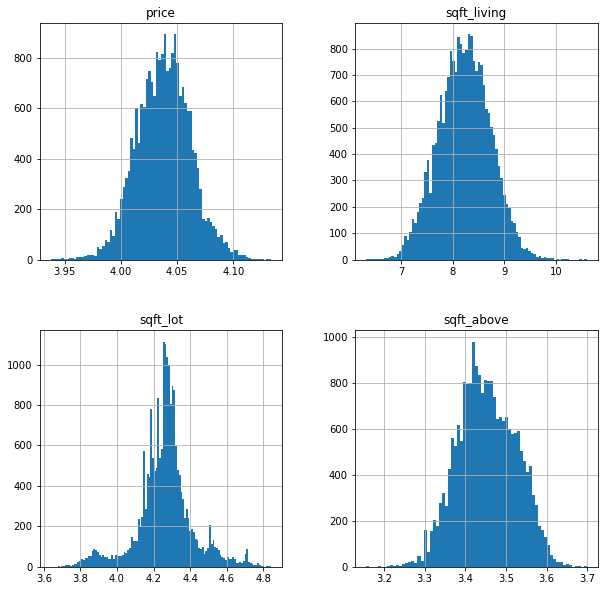

In [36]:
continuous = deskew(no_zip_df, cont_list)

before transform = 1.6609048069871573
afer log transform = 1.707056390494833
afer root transform = 2.731768434208565
afer boxcox transform = 1.1062186128889269
best method = boxcox, see histograms below


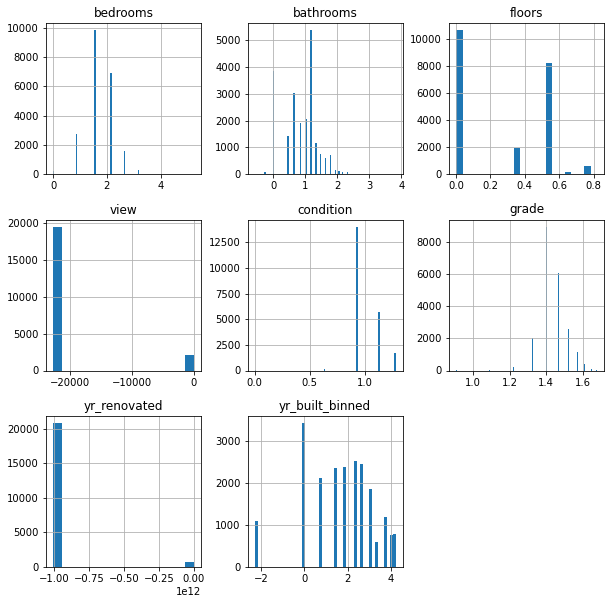

In [37]:
amb_continuous = deskew(no_zip_df, ambiguous_list)


In [38]:
cat_df=no_zip_df[cat_list]
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21595 entries, 0 to 21594
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   waterfront     21595 non-null  float64
 1   sqft_basement  21595 non-null  float64
dtypes: float64(2)
memory usage: 337.5 KB


# make cat model

In [39]:
scaler = MinMaxScaler()

In [40]:
amb_cont_preprocessed = pd.concat([amb_continuous, continuous, cat_df, place_df], axis=1)


In [41]:
def process_y(y_train, y_test):
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    ytr = y_train.values
    yte = y_test.values

    ytr_df = pd.DataFrame(ytr)
    yte_df = pd.DataFrame(yte)

    y_train_scaled_arr = scaler.fit_transform(ytr_df)
    y_test_scaled_arr = scaler.transform(yte_df)
    
    y_train_scaled = pd.DataFrame(y_train_scaled_arr)
    y_test_scaled = pd.DataFrame(y_test_scaled_arr)
    
    y_train_scaled.columns=['price']
    y_test_scaled.columns=['price']

    return(y_train_scaled, y_test_scaled)

In [42]:
def process_x(x_train, x_test, x):
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    x_train_df = pd.DataFrame(x_train_scaled)
    x_train_df.columns = x.columns
    
    x_test_df = pd.DataFrame(x_test_scaled)
    x_test_df.columns = x.columns   
    
    return(x_train_df, x_test_df)

In [43]:
def splitter(prep):
    y = prep["price"]
    x = prep.drop("price", axis=1)
    x_tr, x_te, y_tr, y_te = train_test_split(x, y)
    
    x_train, x_test = process_x(x_tr, x_te, x)
    y_train, y_test = process_y(y_tr, y_te)
    
    return(x_train, x_test, y_train, y_test, x, y)
    

In [71]:
def make_ols_model(prep, cv=False):
    
    x_train, x_test, y_train, y_test, x_o, y_o = splitter(prep)

    x_int = sm.add_constant(x_train)
    

    predictors_int = sm.add_constant(x_train)
    model = sm.OLS(y_train, predictors_int).fit()
    
    predictors_test = sm.add_constant(x_test)
    
    y_hat_train = model.predict(predictors_int)
    y_hat_test = model.predict(predictors_test)
    
    if cv==True:
        regression = LinearRegression()
        model_scores = cross_validate(
        estimator=regression,
        scoring=('r2','neg_mean_squared_error'),
        X=x_o,
        y=y_o,
        return_train_score=True,
        cv=5)
        
        print("Train score:     ", model_scores["train_r2"].mean())
        print("Validation score:", model_scores["test_r2"].mean())

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    print('Train Mean Squarred Error:', train_mse)
    print('Test Mean Squarred Error:', test_mse)
    
    r_sq = np.mean(cross_val_score(regression, x_o, y_o, scoring='r2', cv=10))
    print(f'cros_val r2 = {r_sq}')
    

    return model

In [72]:
amb_cont_model = make_ols_model(amb_cont_preprocessed, cv=True)

Train score:      0.7542509517300802
Validation score: 0.746550845650453
Train Mean Squarred Error: 0.0037317983889478
Test Mean Squarred Error: 0.0036593829922760635
cros_val r2 = 0.7453885944823561


In [152]:
amb_cont_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1353.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:28:21   Log-Likelihood:                 22294.
No. Observations:               16196   AIC:                        -4.451e+04
Df Residuals:                   16159   BIC:                        -4.423e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1885      0.007    -26.379      0.000      -0.202      -0.174
bedrooms           -0.0726      0.006    -11.451      0.000      -0.085      -0.060
bathrooms           0.0447      0.007      6.338      0.000       0.031       0.059
floors              0.0242      0.002     10.131      0.000       0.020       0.029
view                0.0303      0.002     16.850      0.000       0.027       0.034
condition           0.0947      0.005     17.628      0.000       0.084       0.105
grade               0.4281      0.009     48.260      0.000       0.411       0.445
yr_renovated        0.0189      0.003      6.786      0.000       0.013       0.024
yr_built_binned     0.0568      0.003     17.666      0.000       0.051       0.063
sqft_living         0.3259      0.017     19.262      0.000       0.293       0.359
sqft_lot           -0.0161      0.006     -2.821      0.005      -0.027      -0.005
sqft_above          0.0766      0.015      5.169      0.000       0.048       0.106
waterfront          0.0733      0.006     11.869      0.000       0.061       0.085
sqft_basement       0.0098      0.002      5.076      0.000       0.006       0.014
Bellevue            0.1709      0.003     55.632      0.000       0.165       0.177
BlackDiamond        0.0747      0.008      9.836      0.000       0.060       0.090
Bothell             0.1083      0.006     19.424      0.000       0.097       0.119
Carnation           0.0905      0.007     13.421      0.000       0.077       0.104
Duvall              0.0914      0.006     15.952      0.000       0.080       0.103
Enumclaw            0.0249      0.005      4.772      0.000       0.015       0.035
FallCity            0.1275      0.009     14.942      0.000       0.111       0.144
FederalWay         -0.0102      0.003     -2.972      0.003      -0.017      -0.003
Issaquah            0.1255      0.004     35.535      0.000       0.119       0.132
Kenmore             0.1011      0.005     21.205      0.000       0.092       0.110
Kent                0.0113      0.003      3.635      0.000       0.005       0.017
Kirkland            0.1488      0.003     45.826      0.000       0.142       0.155
MapleValley         0.0455      0.004     12.221      0.000       0.038       0.053
Medina              0.2642      0.010     27.020      0.000       0.245       0.283
MercerIsland        0.1879      0.005     38.033      0.000       0.178       0.198
NorthBend           0.0899      0.005     16.864      0.000       0.079       0.100
Redmond             0.1458      0.003     44.915      0.000       0.139       0.152
Renton              0.0616      0.003     21.338      0.000       0.056       0.067
Sammamish           0.1317      0.003     37.969      0.000       0.125       0.139
Seattle             0.1275      0.003     49.155      0.000

## amb as cat

In [73]:
amb_cat = no_zip_df[ambiguous_list]
amb_cat = amb_cat.astype(str)

In [74]:
amb_cat = pd.get_dummies(amb_cat, drop_first=True)

In [75]:
preprocessed_cat = pd.concat([amb_cat, continuous, cat_df, place_df], axis=1)

In [76]:
amb_cat_model = make_ols_model(preprocessed_cat, cv=True)


Train score:      0.7807095159647508
Validation score: -1.5838291372703577e+20
Train Mean Squarred Error: 0.0033851346975210415
Test Mean Squarred Error: 0.003484643344797648
cros_val r2 = -8.774579045168924e+17


In [77]:
amb_cat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     575.1
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:23:00   Log-Likelihood:                 23083.
No. Observations:               16196   AIC:                        -4.596e+04
Df Residuals:                   16094   BIC:                        -4.518e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1691      0.037      4.628      0.000       0.097       0.241
bedrooms_10           -0.0458      0.035     -1.314      0.189      -0.114       0.022
bedrooms_11           -0.0682      0.059     -1.160      0.246      -0.184       0.047
bedrooms_2            -0.0038      0.005     -0.721      0.471      -0.014       0.007
bedrooms_3            -0.0141      0.005     -2.659      0.008      -0.025      -0.004
bedrooms_4            -0.0175      0.005     -3.218      0.001      -0.028      -0.007
bedrooms_5            -0.0260      0.006     -4.535      0.000      -0.037      -0.015
bedrooms_6            -0.0268      0.007     -3.823      0.000      -0.041      -0.013
bedrooms_7            -0.0390      0.013     -3.053      0.002      -0.064      -0.014
bedrooms_8            -0.0132      0.019     -0.706      0.480      -0.050       0.023
bedrooms_9            -0.0236      0.030     -0.786      0.432      -0.082       0.035
bathrooms_0.75         0.0734      0.035      2.102      0.036       0.005       0.142
bathrooms_1.0          0.0809      0.034      2.391      0.017       0.015       0.147
bathrooms_1.25         0.1160      0.040      2.926      0.003       0.038       0.194
bathrooms_1.5          0.0855      0.034      2.522      0.012       0.019       0.152
bathrooms_1.75         0.0931      0.034      2.750      0.006       0.027       0.160
bathrooms_2.0          0.0927      0.034      2.736      0.006       0.026       0.159
bathrooms_2.25         0.0970      0.034      2.862      0.004       0.031       0.163
bathrooms_2.5          0.0973      0.034      2.871      0.004       0.031       0.164
bathrooms_2.75         0.1001      0.034      2.950      0.003       0.034       0.167
bathrooms_3.0          0.1010      0.034      2.973      0.003       0.034       0.168
bathrooms_3.25         0.1083      0.034      3.183      0.001       0.042       0.175
bathrooms_3.5          0.1059      0.034      3.112      0.002       0.039       0.173
bathrooms_3.75         0.1241      0.034      3.609      0.000       0.057       0.191
bathrooms_4.0          0.1127      0.034      3.270      0.001       0.045       0.180
bathrooms_4.25         0.1212      0.035      3.480      0.001       0.053       0.189
bathrooms_4.5          0.1087      0.035      3.143      0.002       0.041       0.177
bathrooms_4.75         0.1318      0.037      3.599      0.000       0.060       0.204
bathrooms_5.0          0.1235      0.036      3.386      0.001       0.052       0.195
bathrooms_5.25         0.1106      0.039      2.842      0.004       0.034       0.187
bathrooms_5.5          0.1219      0.041      2.959      0.003       0.041       0.203
bathrooms_5.75         0.0884      0.049      1.807      0.071      -0.008       0.184
bathrooms_6.0          0.0834      0.0

# Charts

## heatmap

In [282]:
def heatmap(preprocessed):
    x_train, x_test, y_train, y_test = splitter(preprocessed)
    
    heatmap_data = pd.concat([y_train, x_train], axis=1)
    corr = heatmap_data.corr()

    fig, ax = plt.subplots(figsize=(20, 30))

    sns.heatmap(
        data=corr,
        mask=np.triu(np.ones_like(corr, dtype=bool)),
        ax=ax,
        annot=True,
        cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
    )

    ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

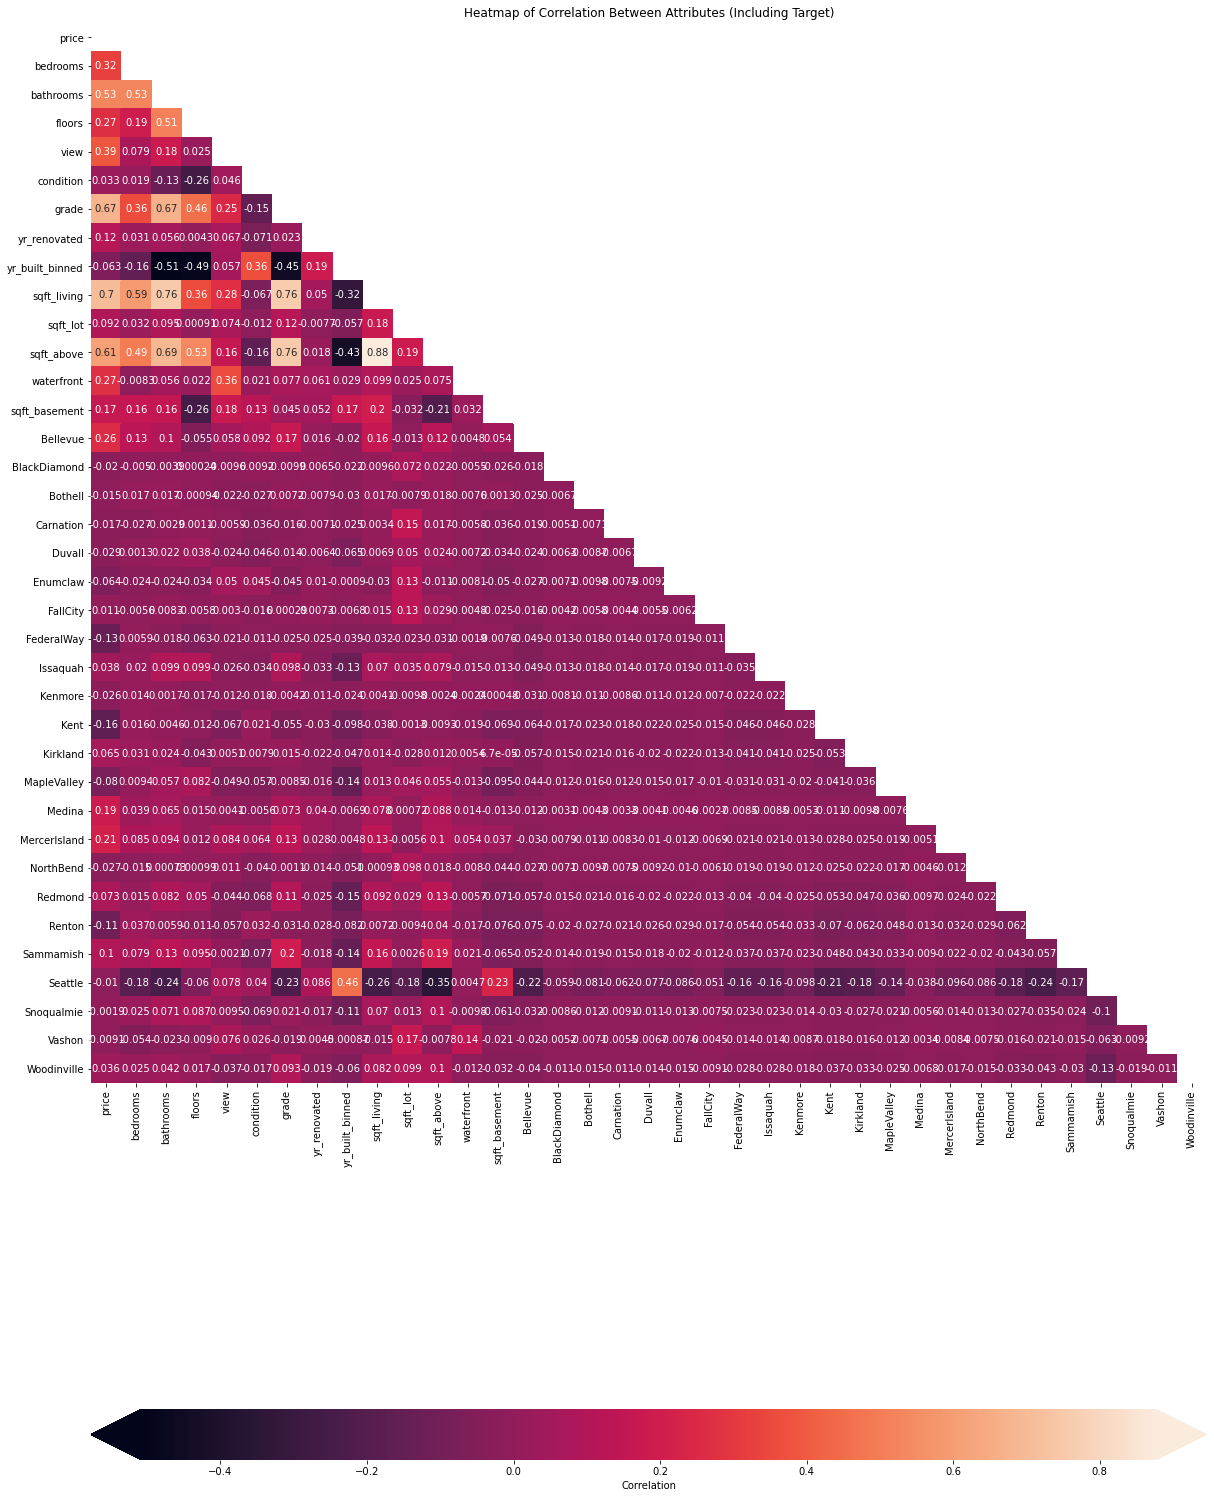

In [271]:
heatmap(preprocessed)

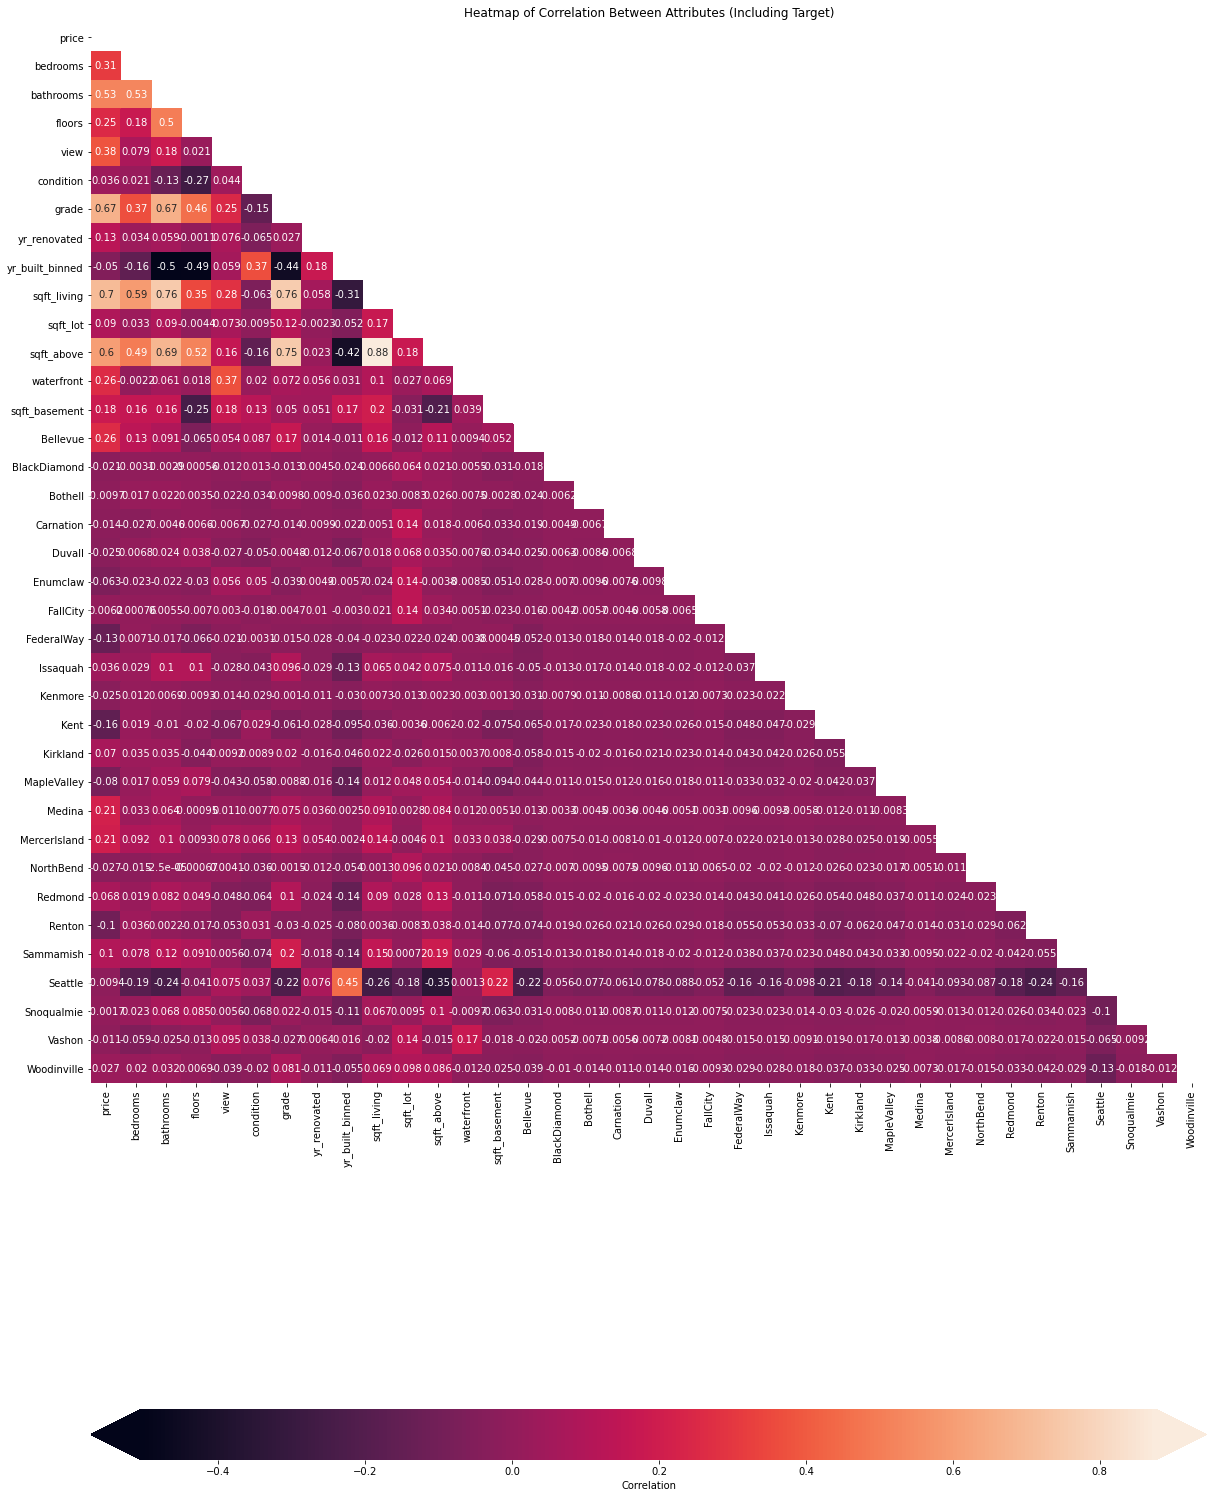

In [272]:
heatmap(preprocessed_cat)

## scatterplots predictors v target

In [492]:
def scatterplot(preprocessed):
    x_train, x_test, y_train, y_test, x, y = splitter(preprocessed)
    
    no_cols = len(x_train.columns)
    
    rs = (int(no_cols/3) + (no_cols % 3>0))


    fig, axes = plt.subplots(ncols=3, nrows=rs, figsize=(12, 15))
    fig.set_tight_layout(True)

    for index, col in enumerate(x_train.columns):
        ax = axes[index//3][index%3]
        ax.scatter(x_train[col], y_train, alpha=0.2)
        ax.set_xlabel(col)
        ax.set_ylabel("price")

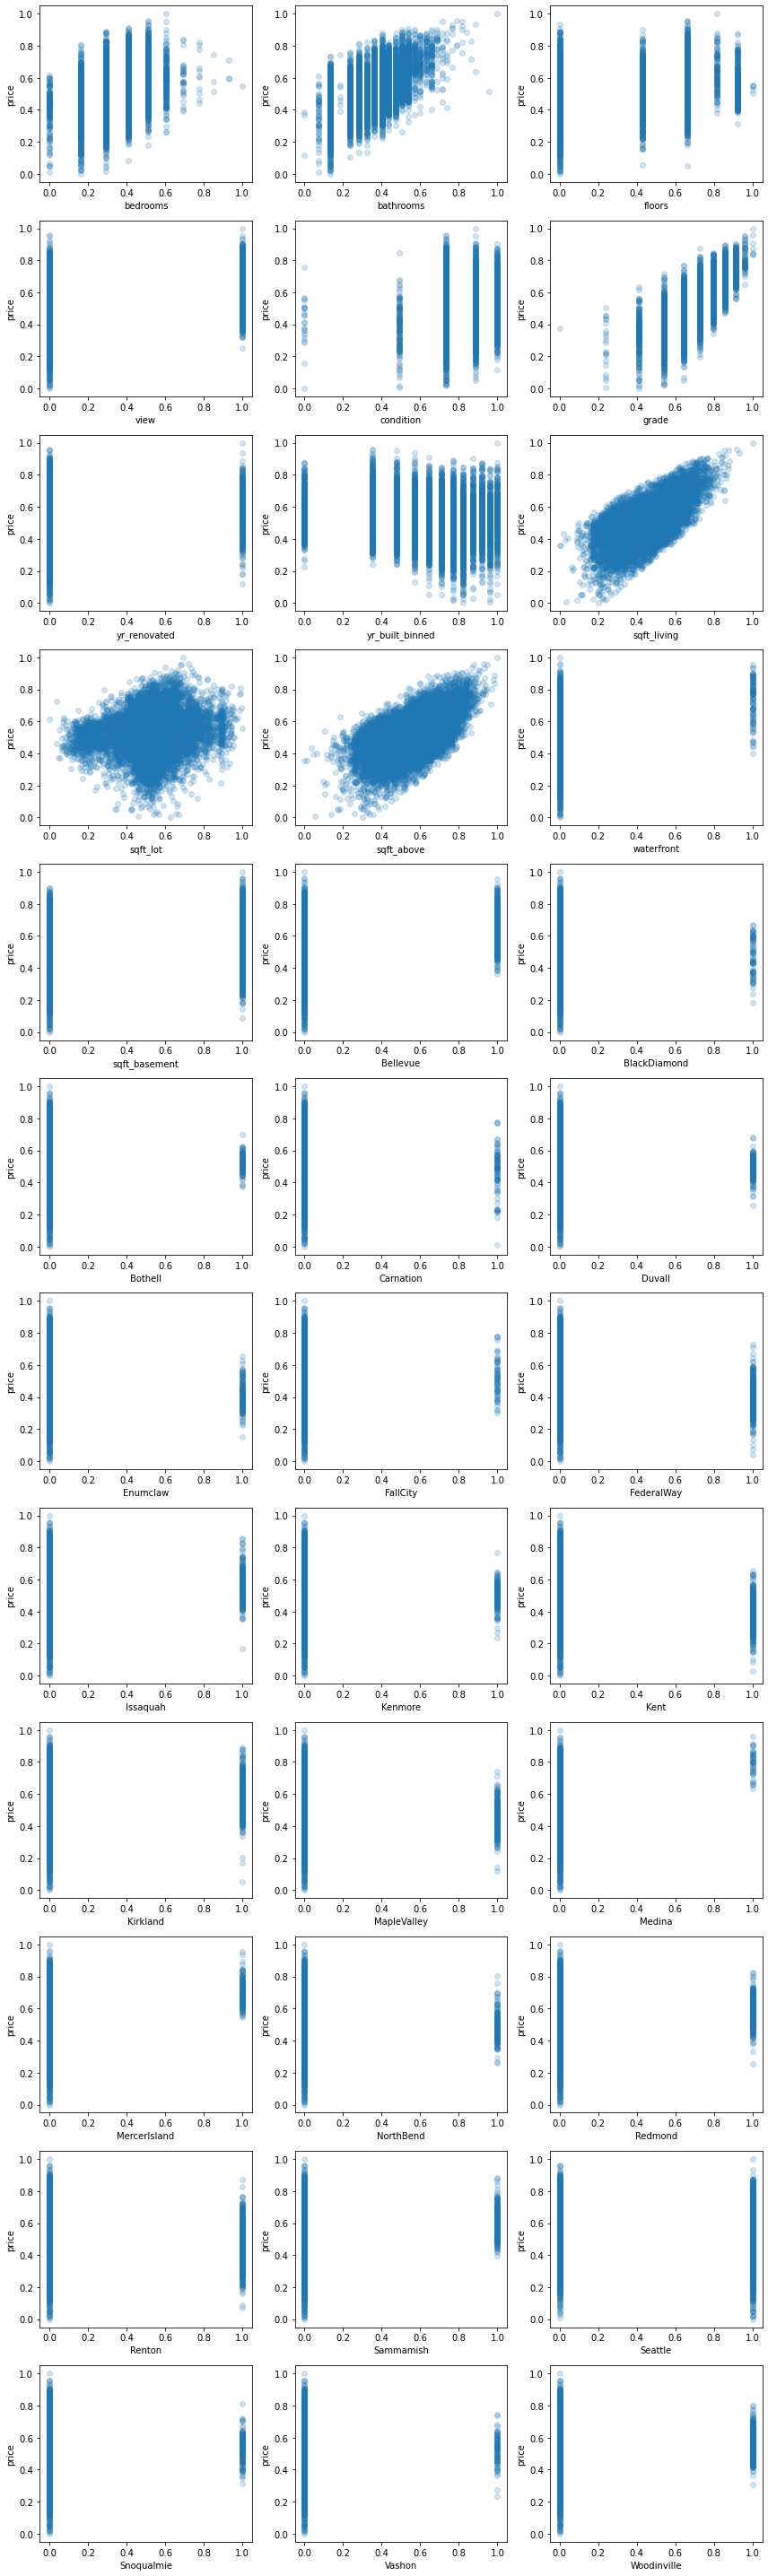

In [664]:
scatterplot(amb_cont_preprocessed)

## linearity

In [251]:
def linearity_test(prep):
    x_train, x_test, y_train, y_test, x, y = splitter(prep)
    lin_data = pd.concat([y_train, x_train], axis=1)

    for col in lin_data.columns:
        f = f'price~{col}'
        model = smf.ols(formula=f, data=lin_data).fit()

        print(f'{col} normality tests')
        result=[col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]]
        print(result)
    
        fig, axes = plt.subplots(figsize=(15,8))
        fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
        fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
        fig.tight_layout()
        plt.show()
    return y_train

price normality tests
['price', 1.0, 5.637851296924623e-16, 0.9999999999999997, 0.0, 907.5936733273934]


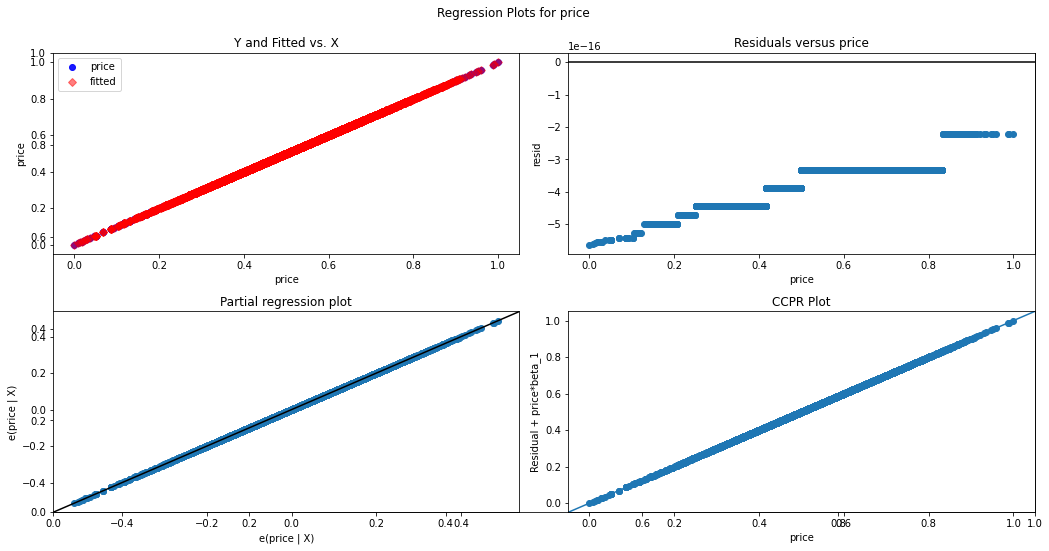

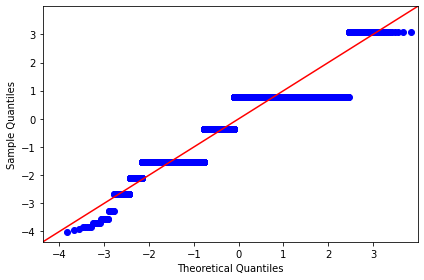

bedrooms normality tests
['bedrooms', 0.1258599823351415, 0.37465818617011154, 0.3848648071437117, 0.0, 20.57008264036395]


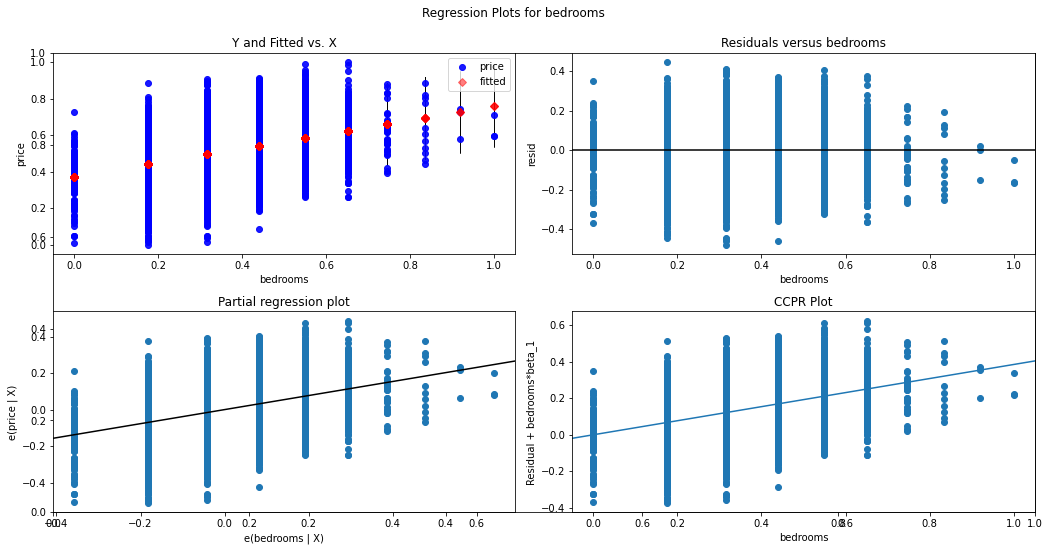

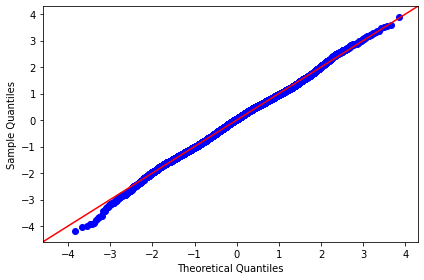

bathrooms normality tests
['bathrooms', 0.2901642773030477, 0.3384386085220865, 0.5253894556677561, 0.0, 18.329504183944834]


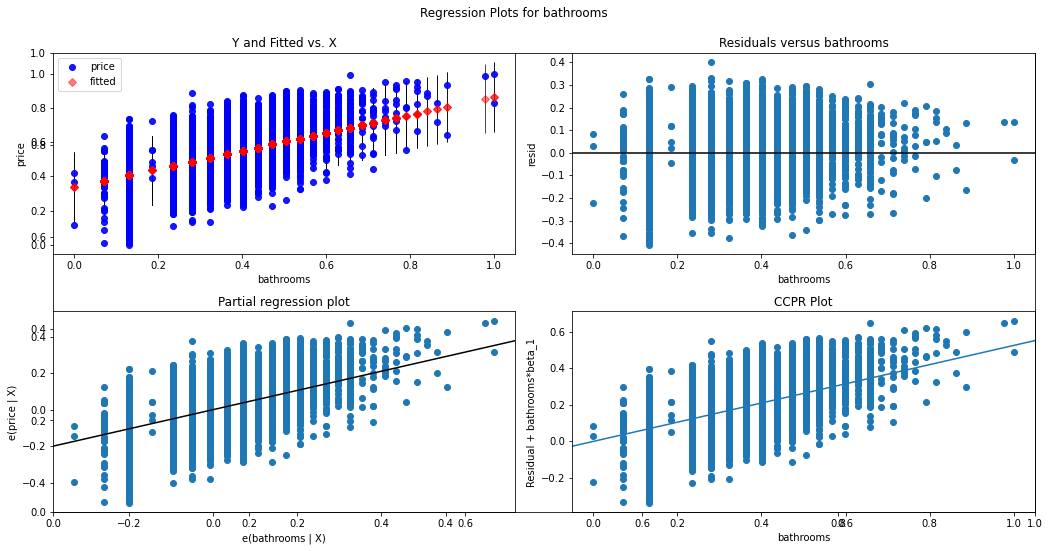

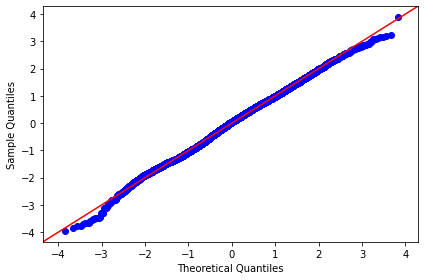

floors normality tests
['floors', 0.1098263841552708, 0.47277802787839573, 0.12312536419091118, 0.0, 61.106817837810965]


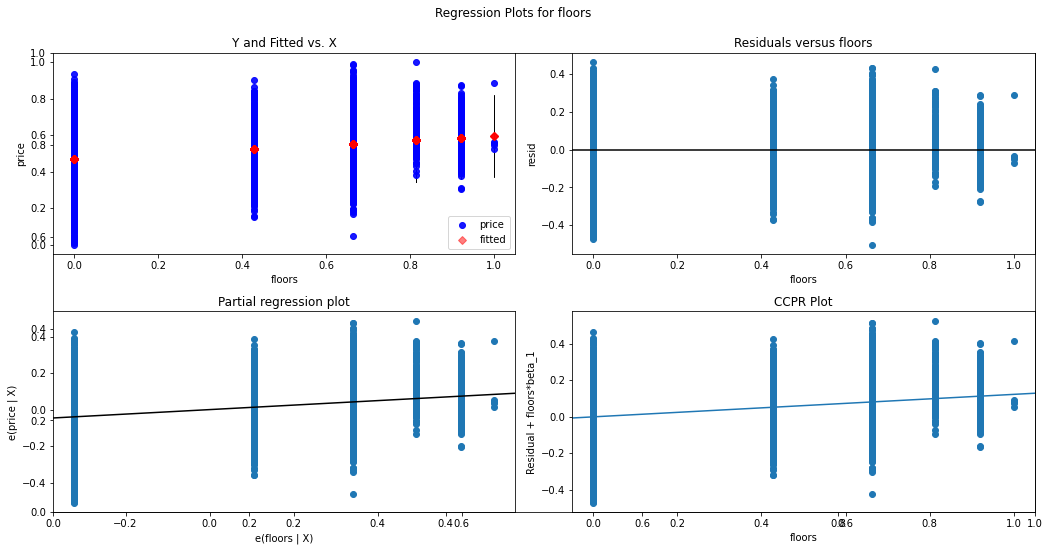

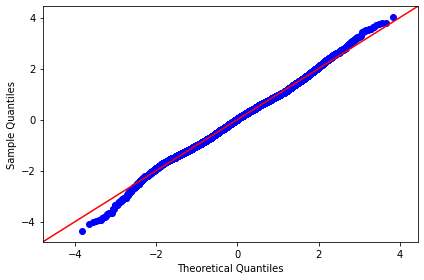

view normality tests
['view', 0.09529631144592632, 0.5001749916274919, 0.12784609346884024, 0.0, 97.06437693235362]


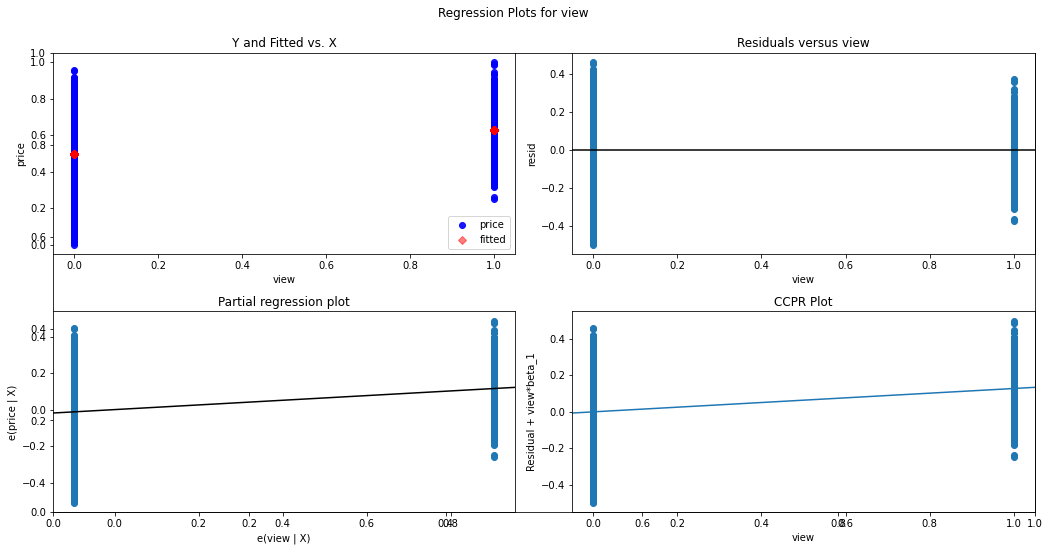

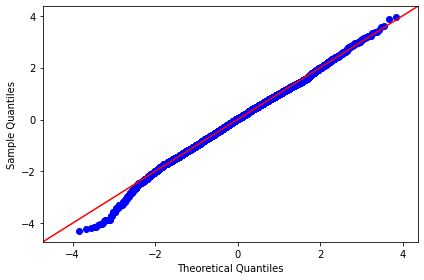

condition normality tests
['condition', 0.0023971647071645563, 0.4644962078552429, 0.060598445937197716, 4.5413010328092793e-10, 78.76300038390482]


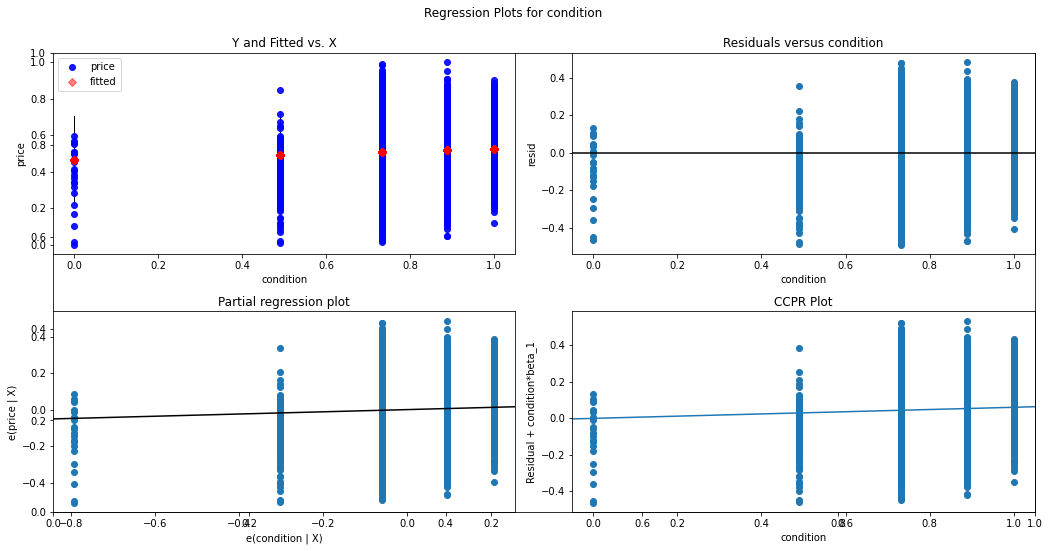

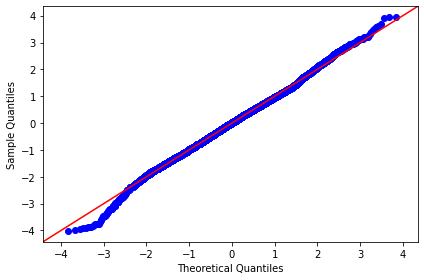

grade normality tests
['grade', 0.463956441563969, 0.11583448509830921, 0.6719420689431689, 0.0, 55.9384978642758]


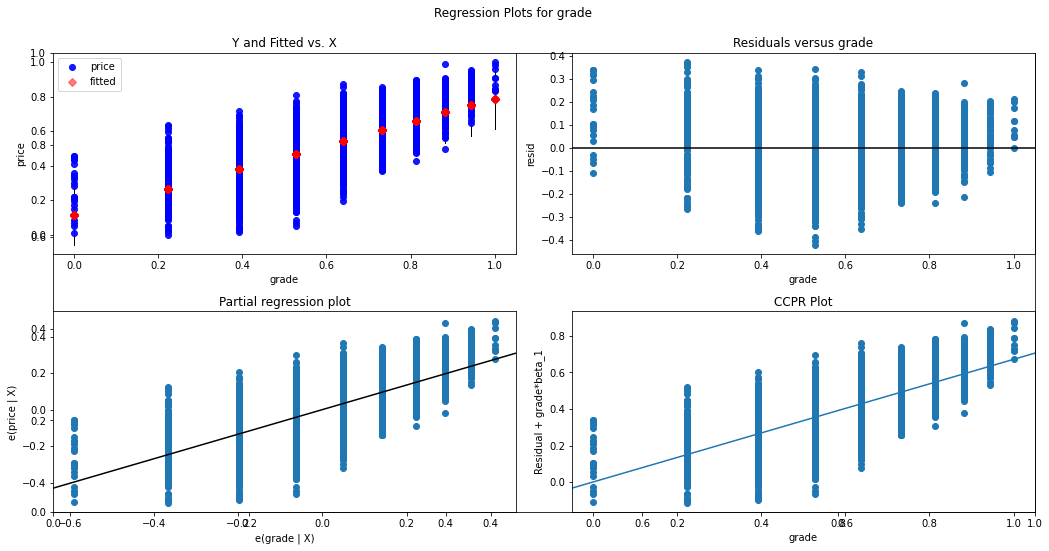

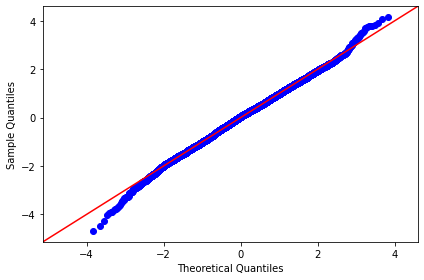

yr_renovated normality tests
['yr_renovated', 0.009747733732855313, 0.5102208579946932, 0.06642721600566584, 2.2606261263485453e-36, 91.70892424261262]


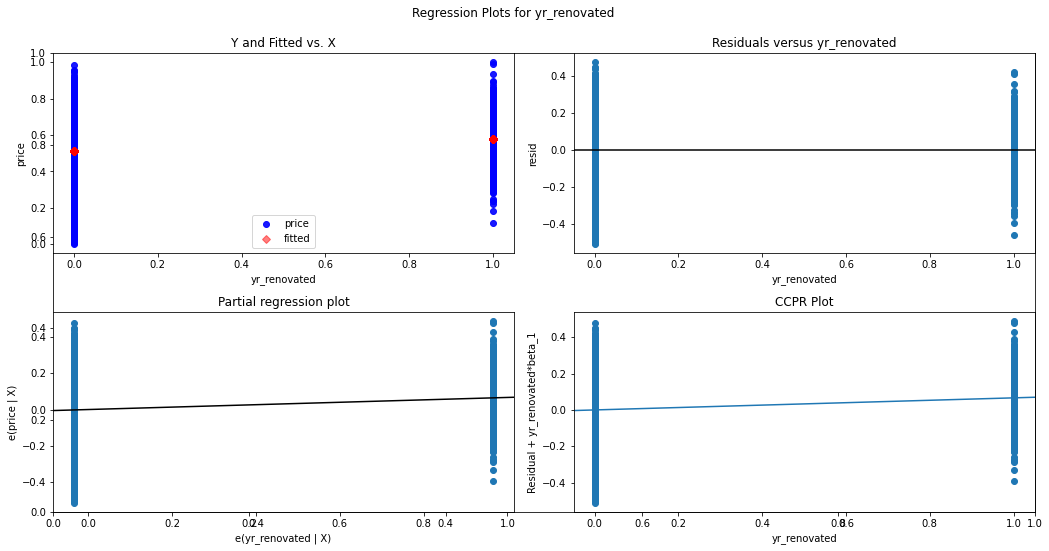

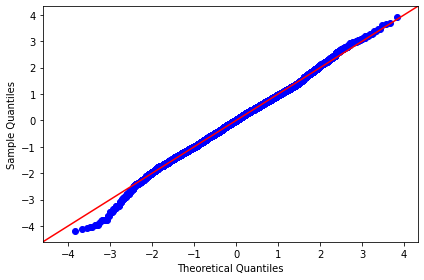

yr_built_binned normality tests
['yr_built_binned', 0.01587522038997069, 0.5527882243956392, -0.06471370530535729, 2.6451693518666217e-58, 63.50286420242514]


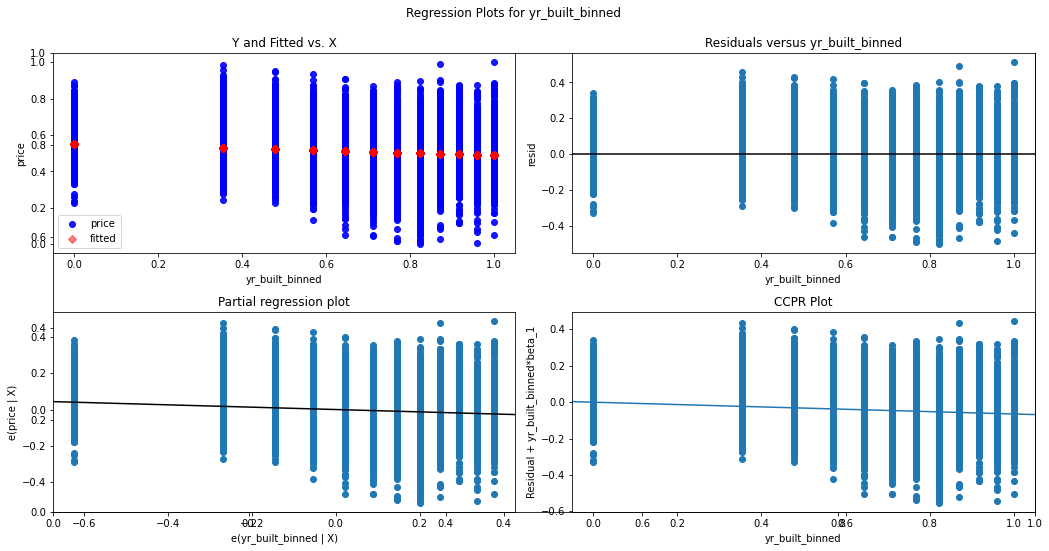

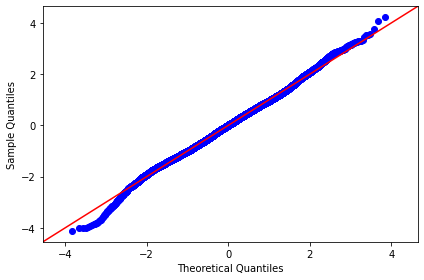

sqft_living normality tests
['sqft_living', 0.4504892233055646, 0.20210357162891324, 0.6953850066098557, 0.0, 96.45643359026708]


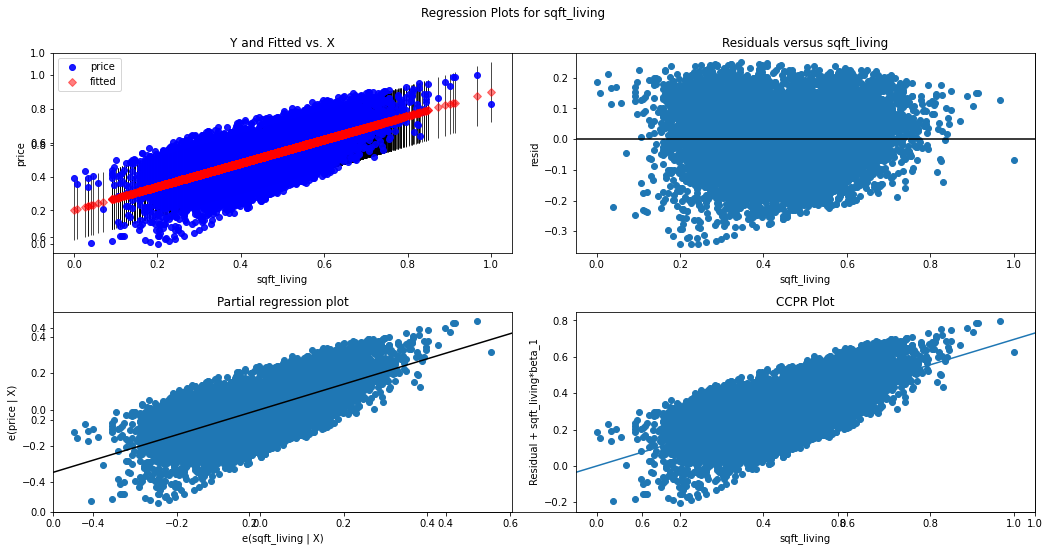

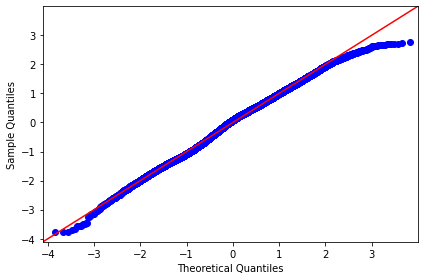

sqft_lot normality tests
['sqft_lot', 0.012965898304210688, 0.4555534926147821, 0.10967368407203149, 7.019685912855052e-48, 80.99101252969504]


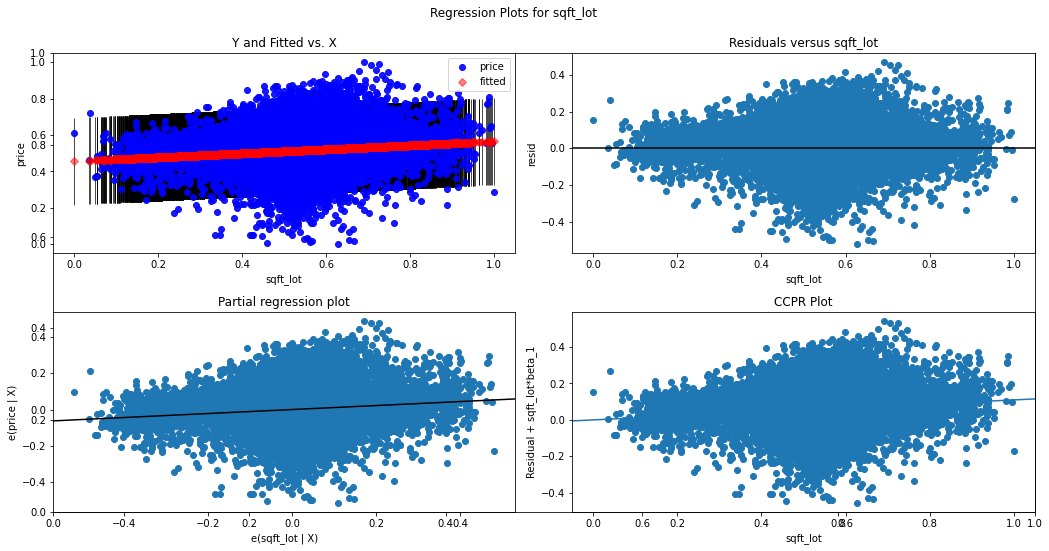

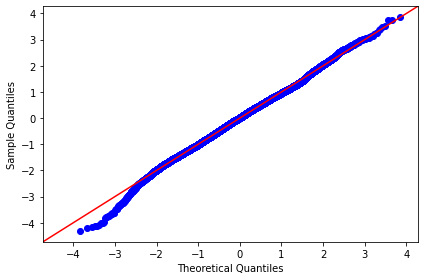

sqft_above normality tests
['sqft_above', 0.32710836551383227, 0.22346952361311934, 0.5271178018321483, 0.0, 80.55505488361776]


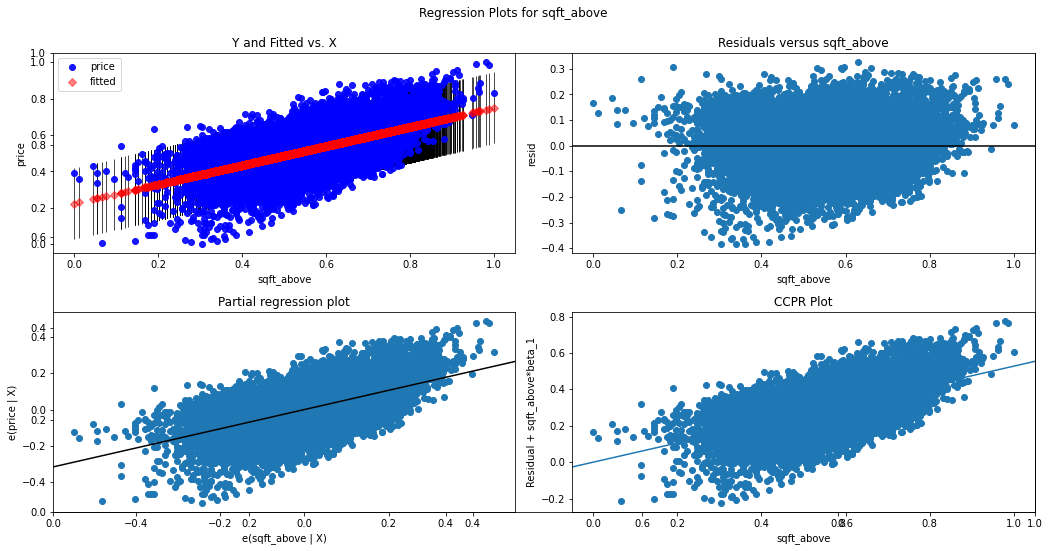

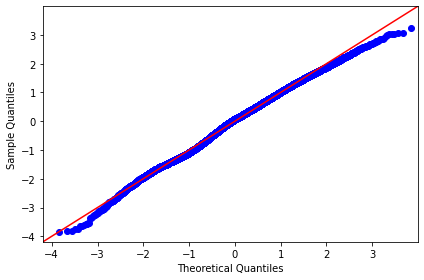

waterfront normality tests
['waterfront', 0.024243087314876566, 0.5108384465921445, 0.22092384732894627, 2.0096572595533875e-88, 73.1498931107336]


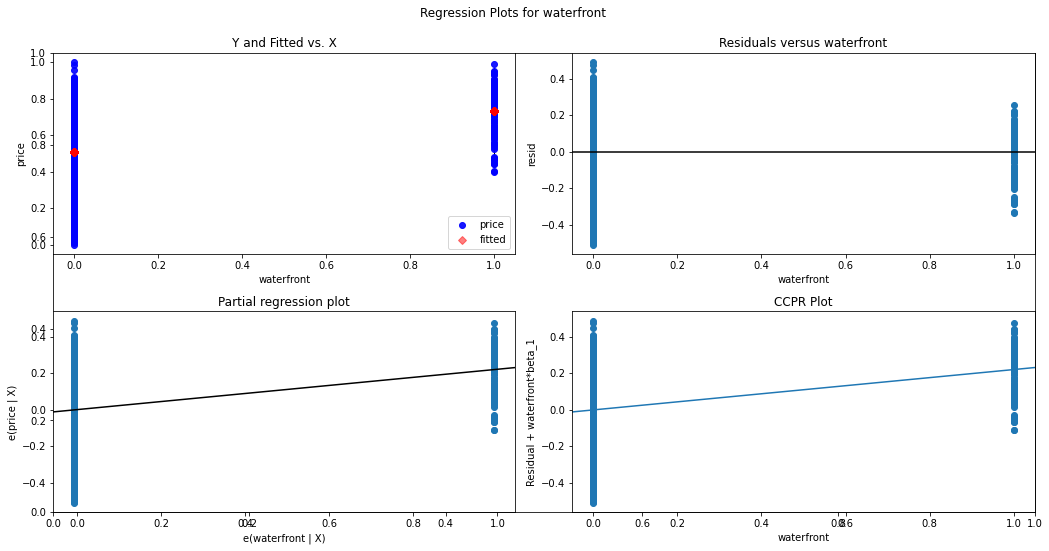

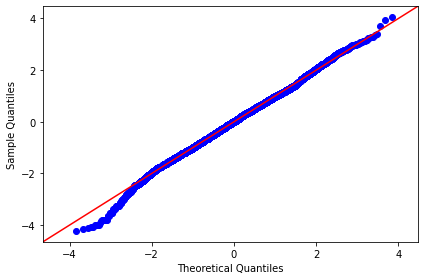

sqft_basement normality tests
['sqft_basement', 0.04605443708582613, 0.49173052818208984, 0.05387878719487831, 4.6515088208752955e-168, 51.899372005585015]


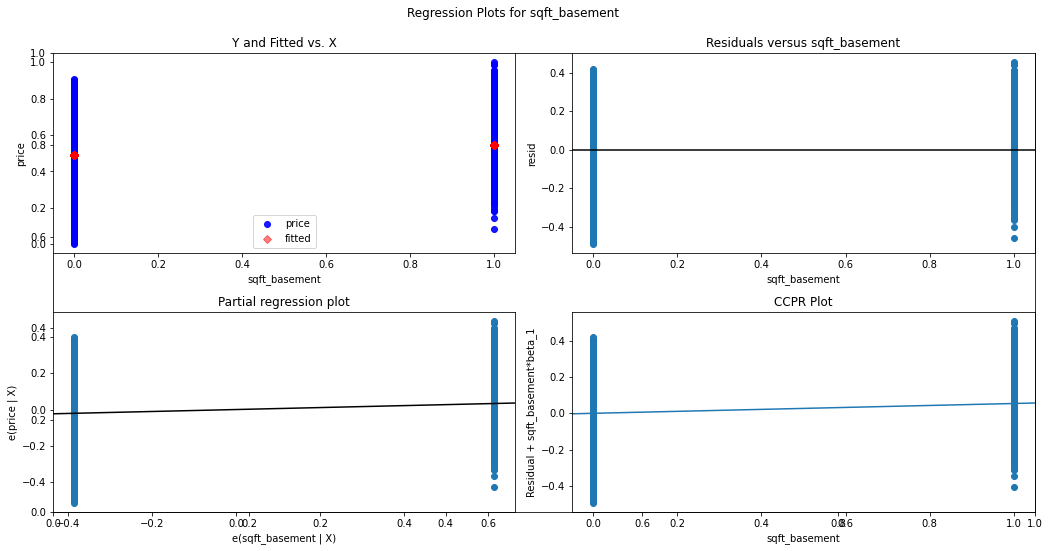

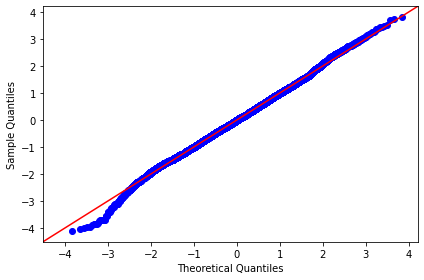

Bellevue normality tests
['Bellevue', 0.06425231878193216, 0.5043635355645001, 0.12617396407529952, 7.334977249951942e-236, 130.608993973989]


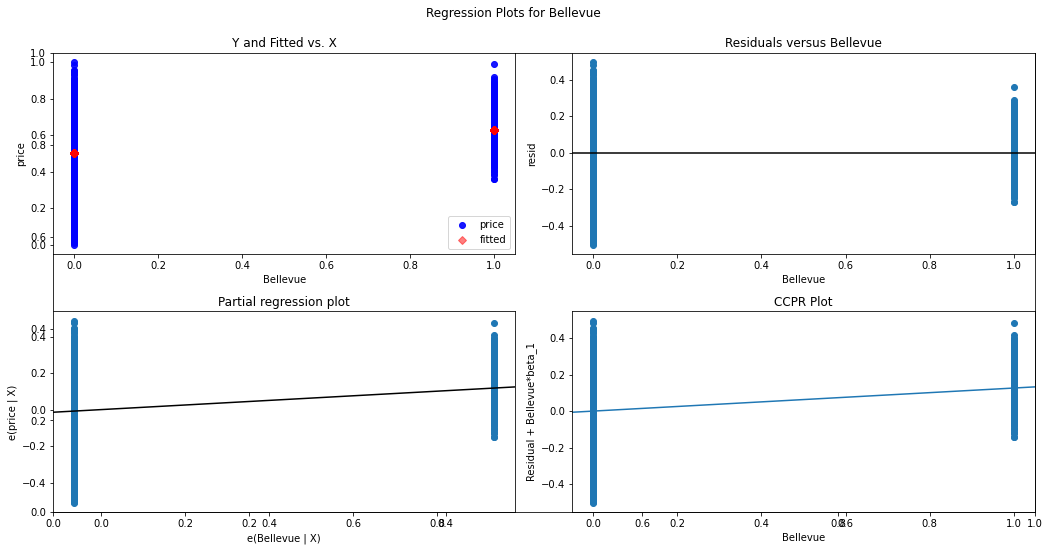

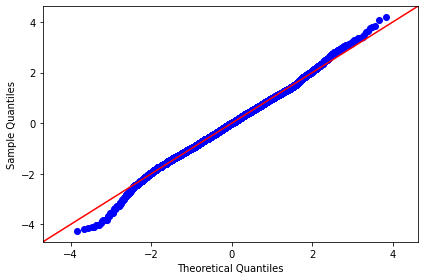

BlackDiamond normality tests
['BlackDiamond', 0.0006324310602424665, 0.5126999436784381, -0.04496080635271178, 0.0013709183133004284, 89.61653286974776]


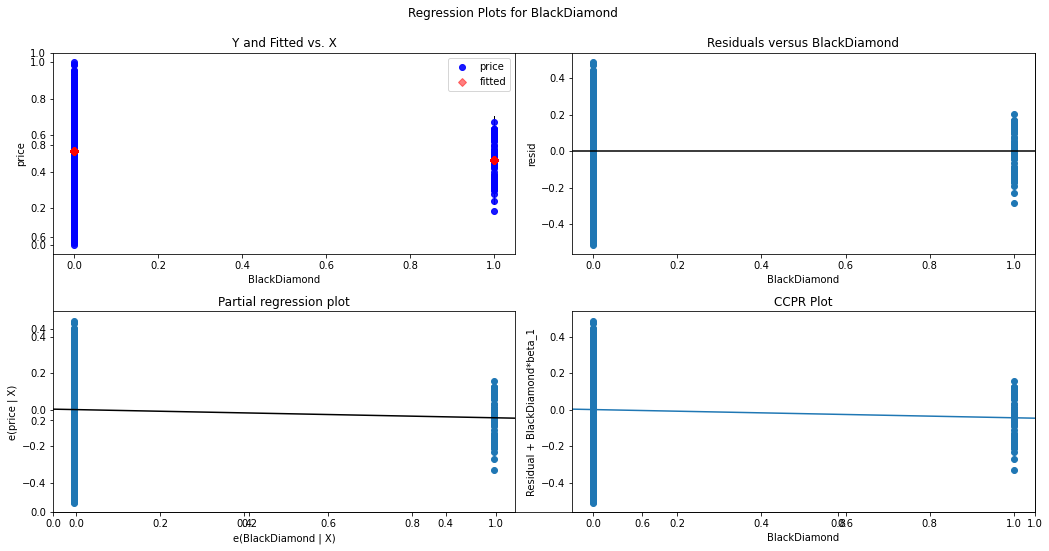

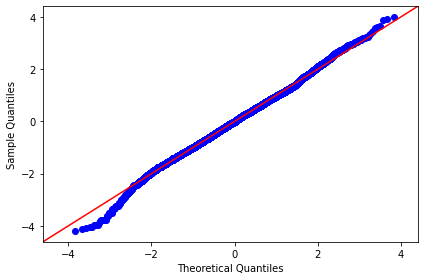

Bothell normality tests
['Bothell', 0.00013487219785901505, 0.5123513103332793, 0.014764532287301652, 0.13943347537057538, 90.06569151359021]


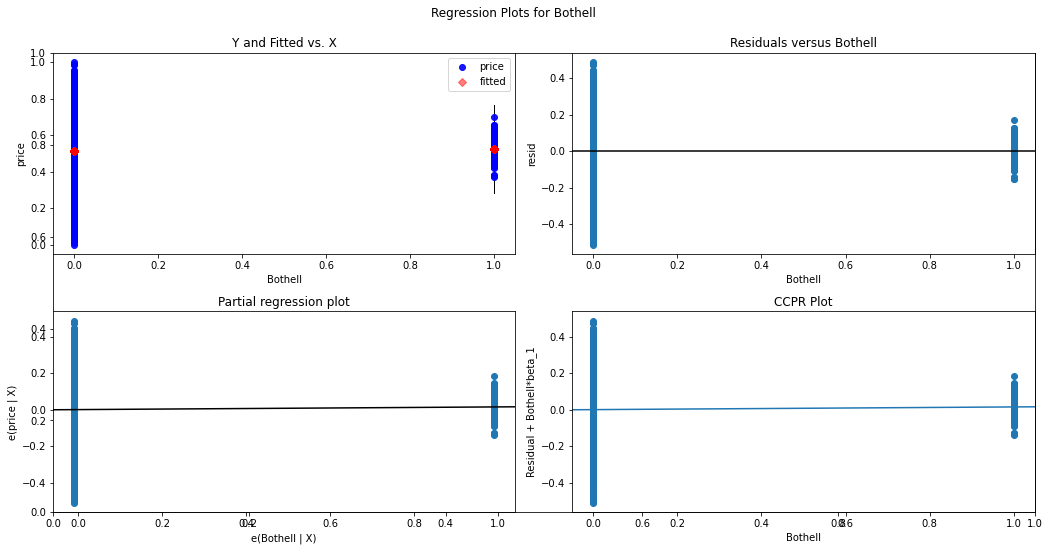

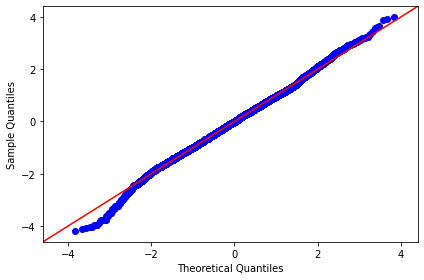

Carnation normality tests
['Carnation', 0.0005214071033342593, 0.5127055271817559, -0.03615929590248425, 0.0036592609291452548, 86.9555206714626]


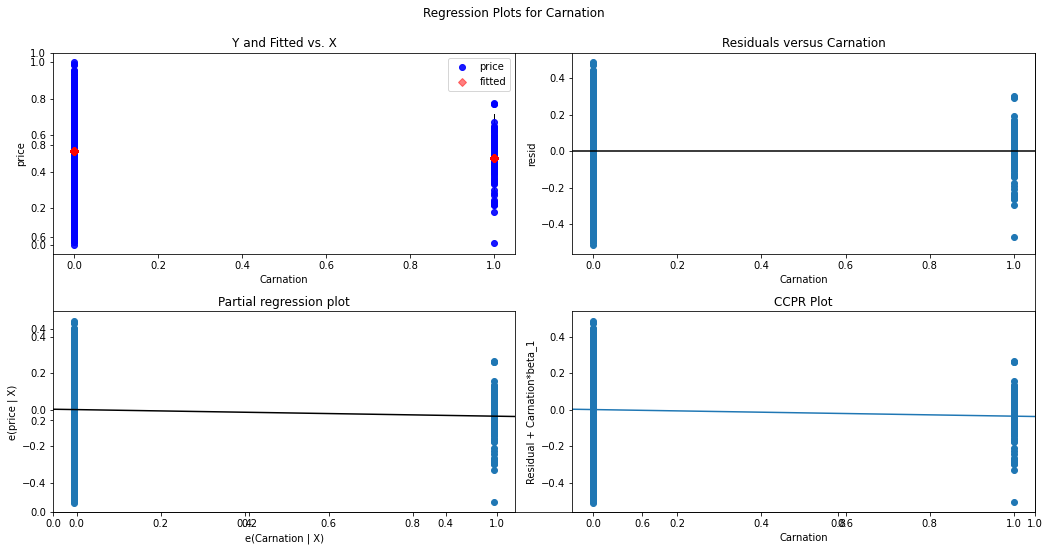

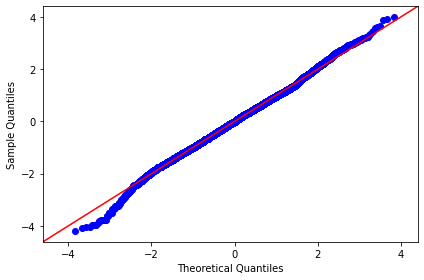

Duvall normality tests
['Duvall', 0.00017373983280033478, 0.5126409661196838, -0.017215529658921265, 0.09346256183122452, 89.80405119688118]


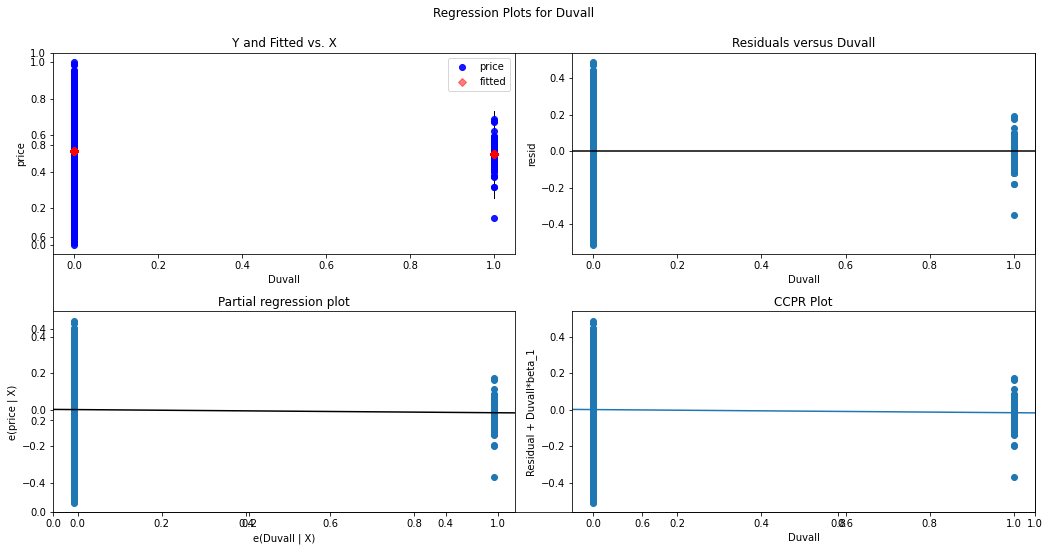

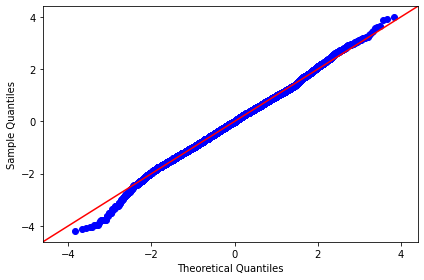

Enumclaw normality tests
['Enumclaw', 0.008590579227950923, 0.5136518513045096, -0.11144448044175062, 3.0766647872788945e-32, 106.46526788055608]


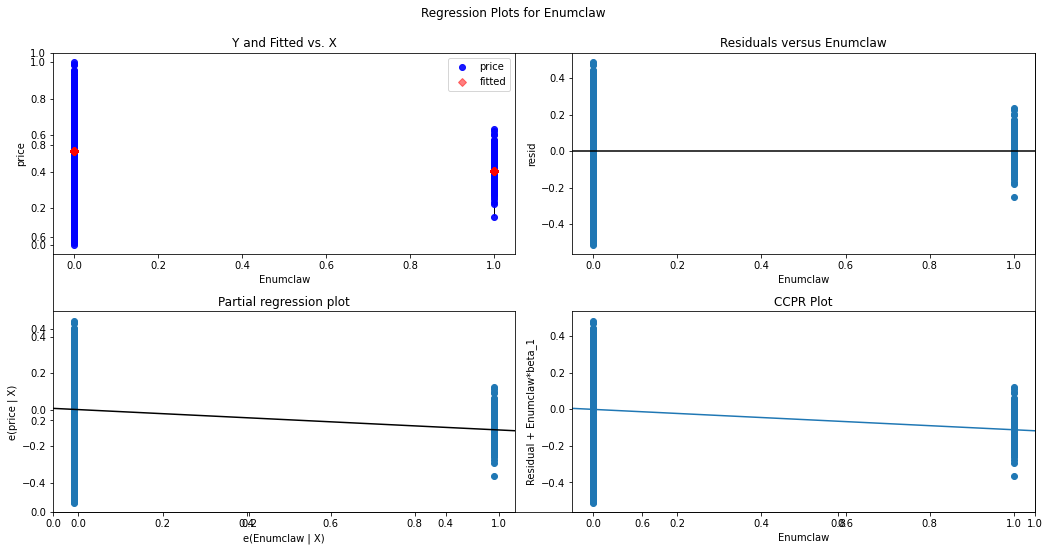

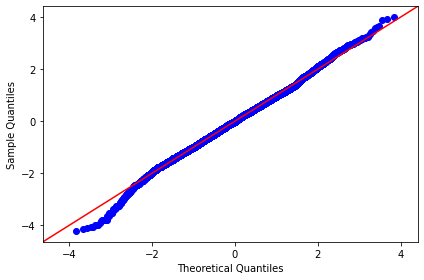

FallCity normality tests
['FallCity', 0.0001304061389665323, 0.5124060447489713, 0.02356080313749683, 0.14616066129254116, 89.21033814493069]


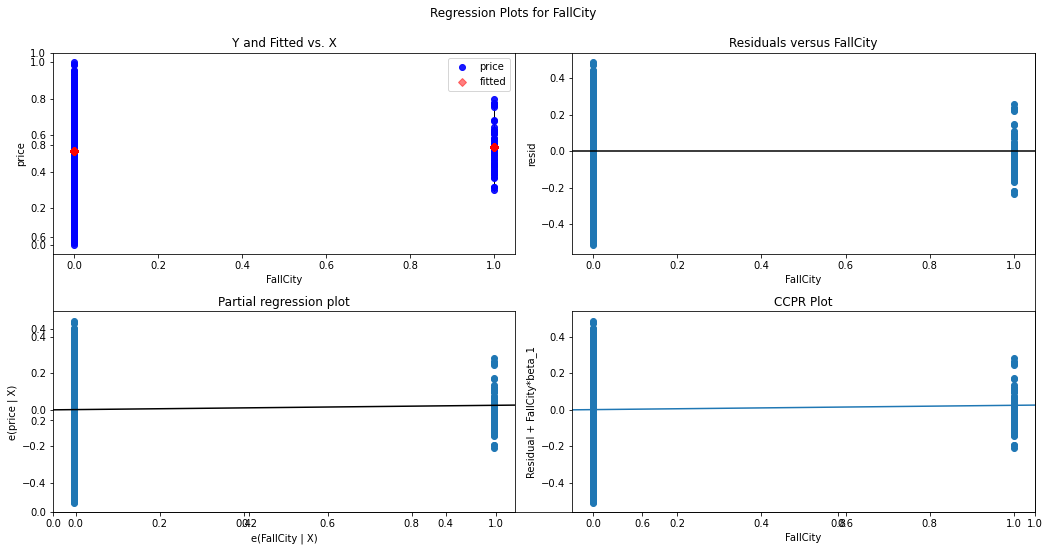

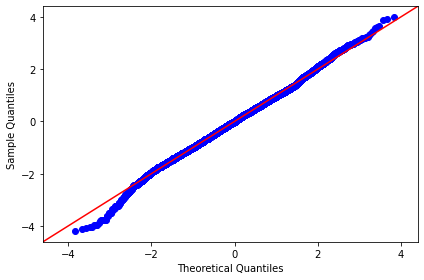

FederalWay normality tests
['FederalWay', 0.03967509513187928, 0.5172376247964425, -0.129476943888901, 1.3723048018448507e-144, 169.36633202629105]


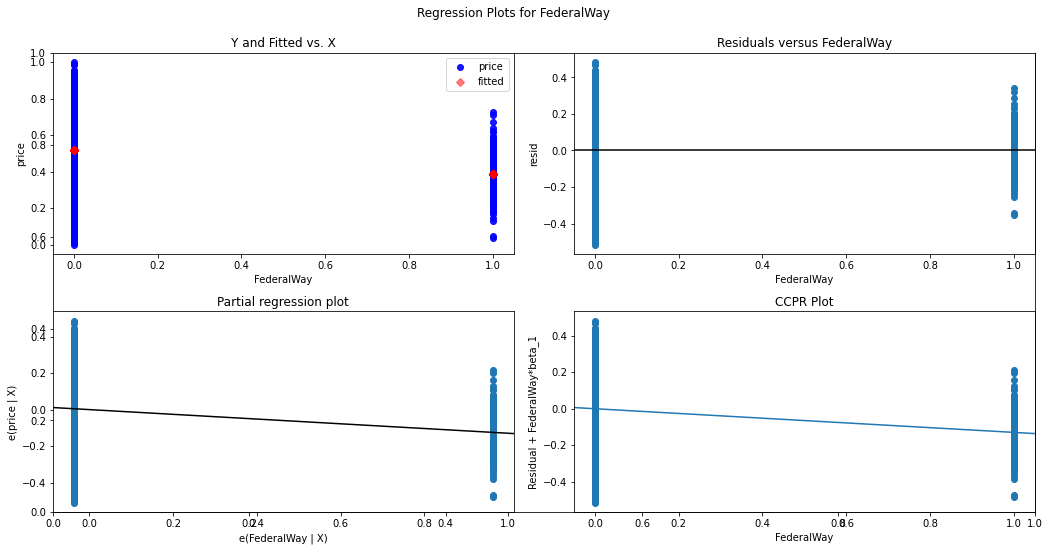

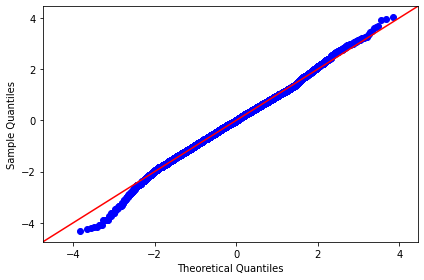

Issaquah normality tests
['Issaquah', 0.006504185840788157, 0.5106414611617541, 0.05440393010438212, 8.711553135501804e-25, 105.15836524124174]


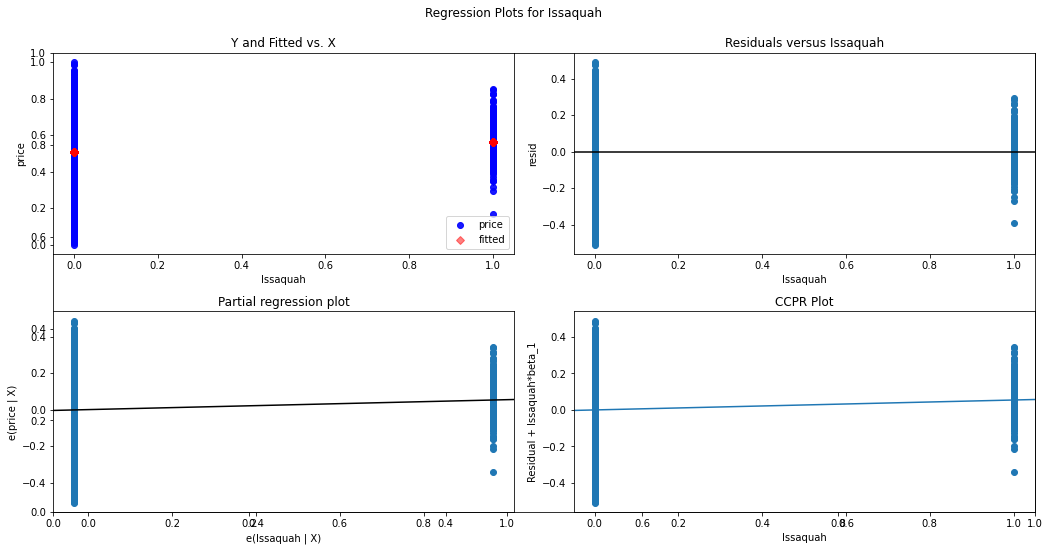

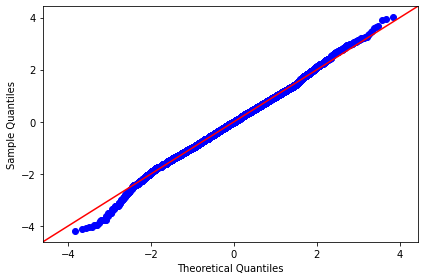

Kenmore normality tests
['Kenmore', 2.9964352256106608e-05, 0.5125654361156087, -0.005926013374222851, 0.4860605928979186, 89.68210507646508]


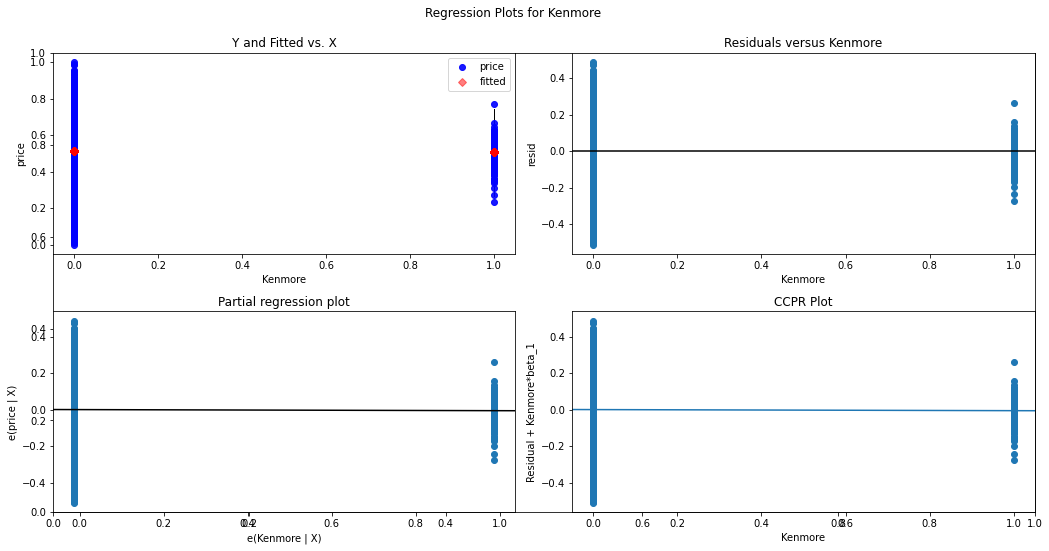

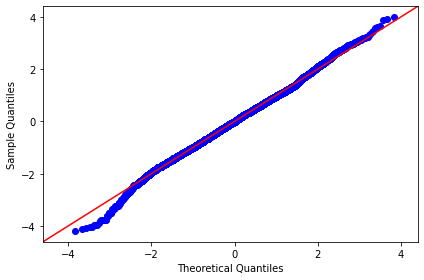

Kent normality tests
['Kent', 0.05177053278309818, 0.5192324226601193, -0.12135227874457383, 3.2203892332159032e-189, 201.92095743187727]


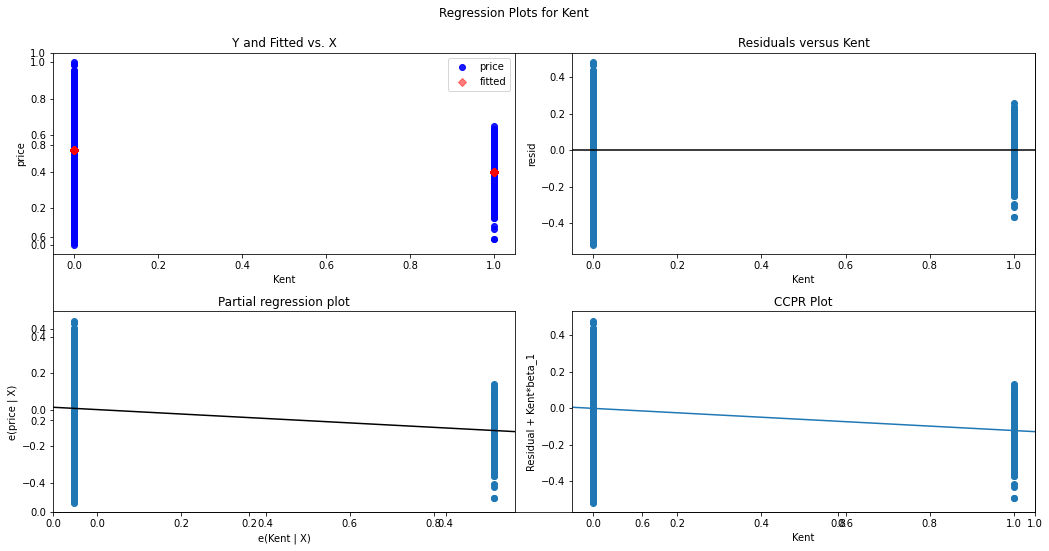

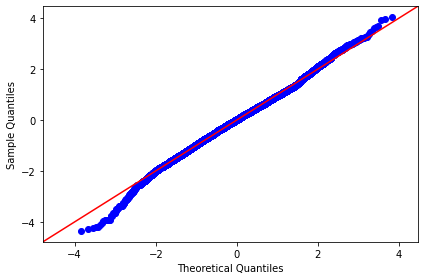

Kirkland normality tests
['Kirkland', 0.008895753895223346, 0.5100287266738481, 0.05643910669056258, 2.5003267611365827e-33, 90.50129007115363]


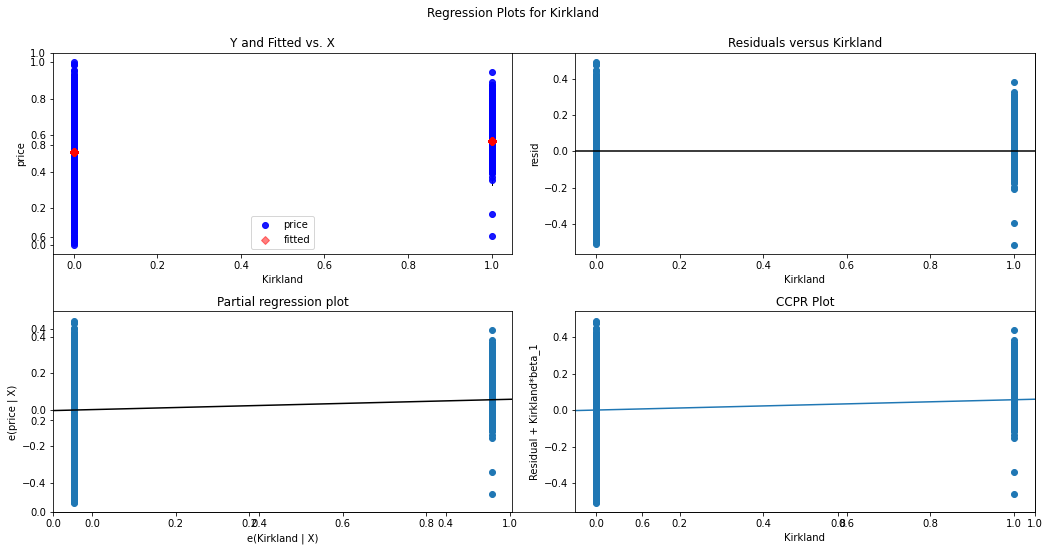

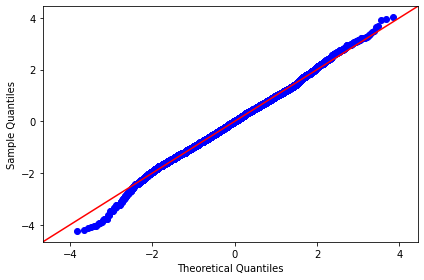

MapleValley normality tests
['MapleValley', 0.007862853691493754, 0.5142824908552245, -0.06724063740287106, 1.2225985474515866e-29, 108.03054279862644]


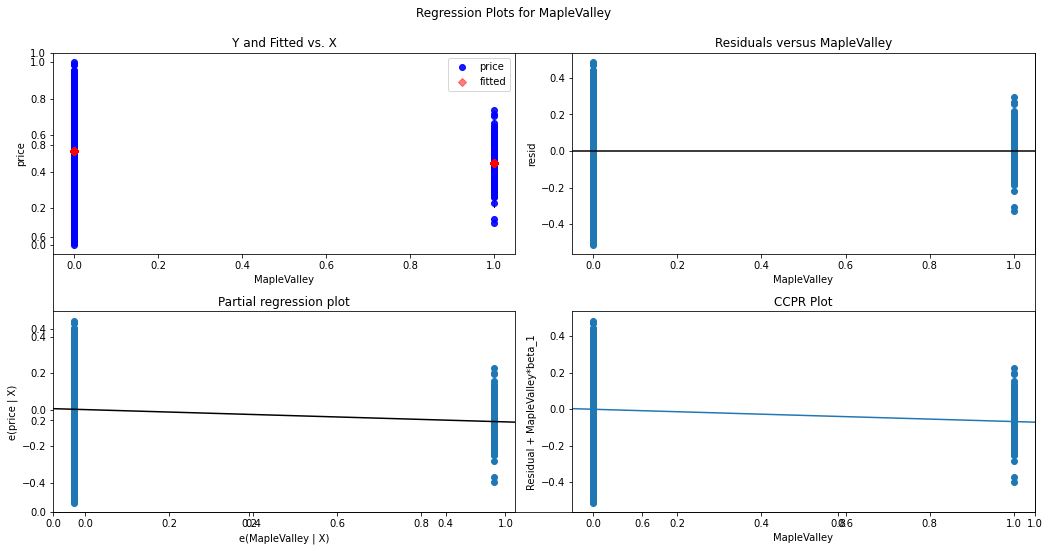

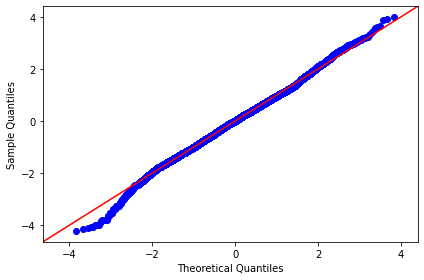

Medina normality tests
['Medina', 0.014480338820035965, 0.5117573849280512, 0.2962165059615164, 2.648118148998233e-53, 80.42975714743332]


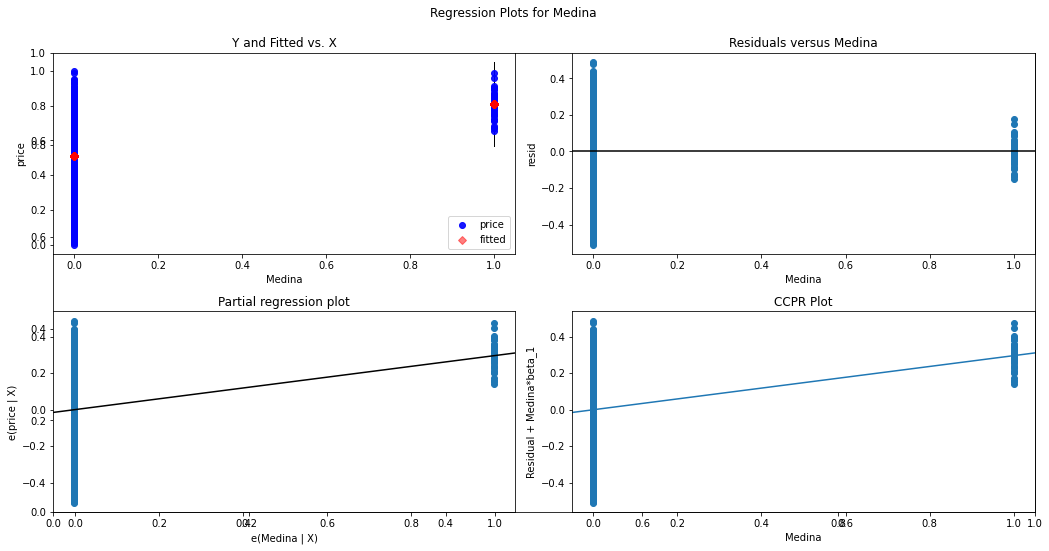

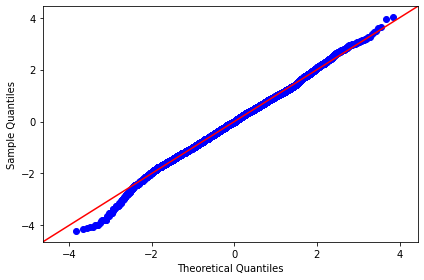

MercerIsland normality tests
['MercerIsland', 0.030234185287412063, 0.5100657447311258, 0.18868492724933594, 3.9609864135356177e-110, 115.75265452236954]


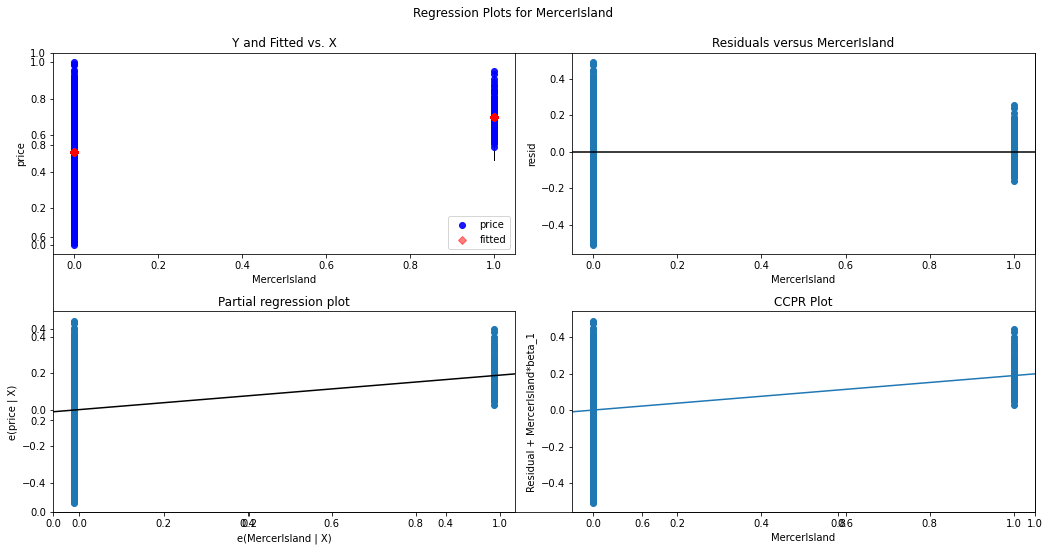

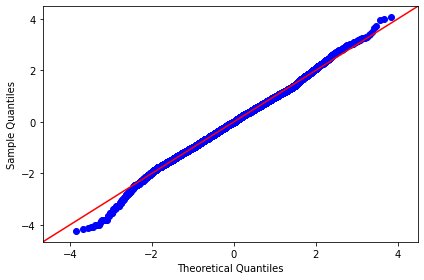

NorthBend normality tests
['NorthBend', 0.0006779825913955095, 0.5128107349641132, -0.03177681064390971, 0.0009196959381315105, 91.49234603571729]


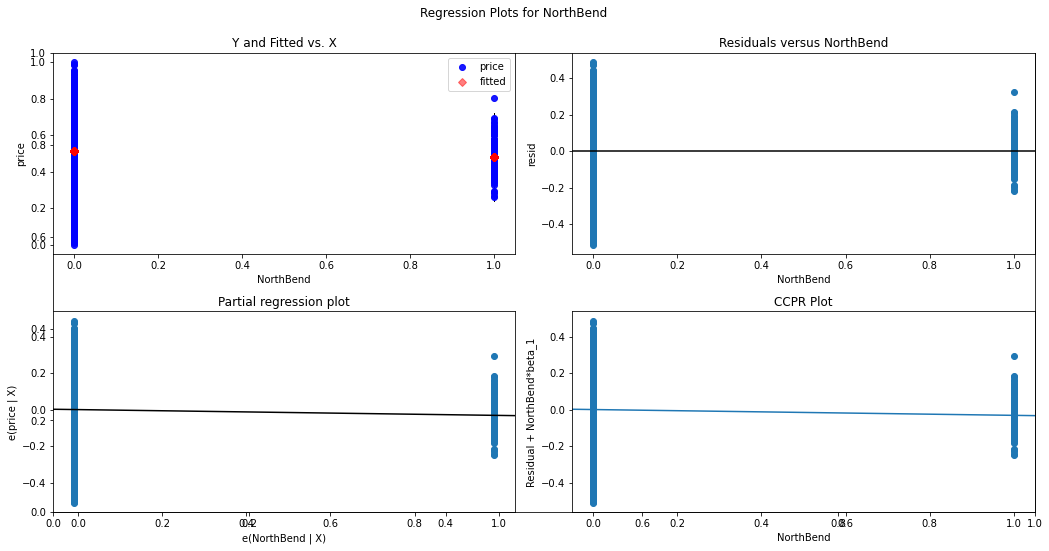

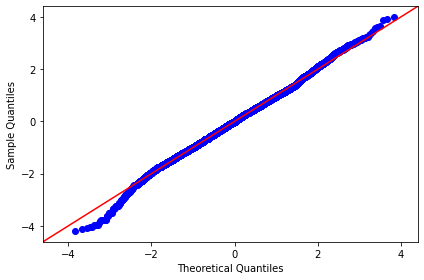

Redmond normality tests
['Redmond', 0.016734373366092847, 0.5090501526900426, 0.0760860567831185, 2.1868589473732997e-61, 138.09190736665903]


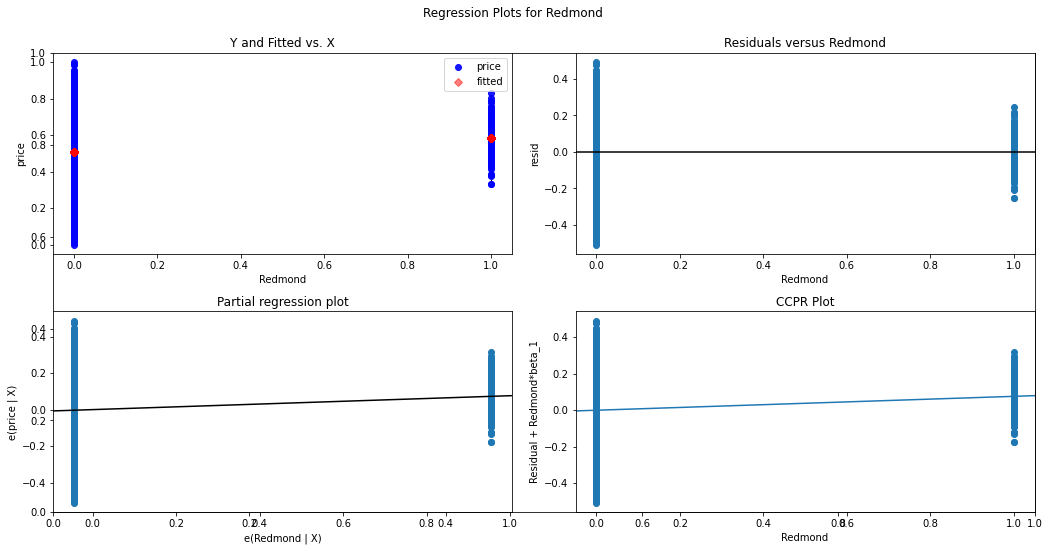

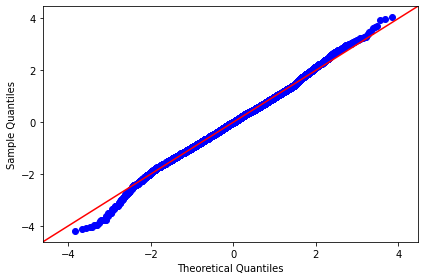

Renton normality tests
['Renton', 0.01506059909659696, 0.5167743408381801, -0.05675057864430817, 2.2050060431445787e-55, 120.50210078237944]


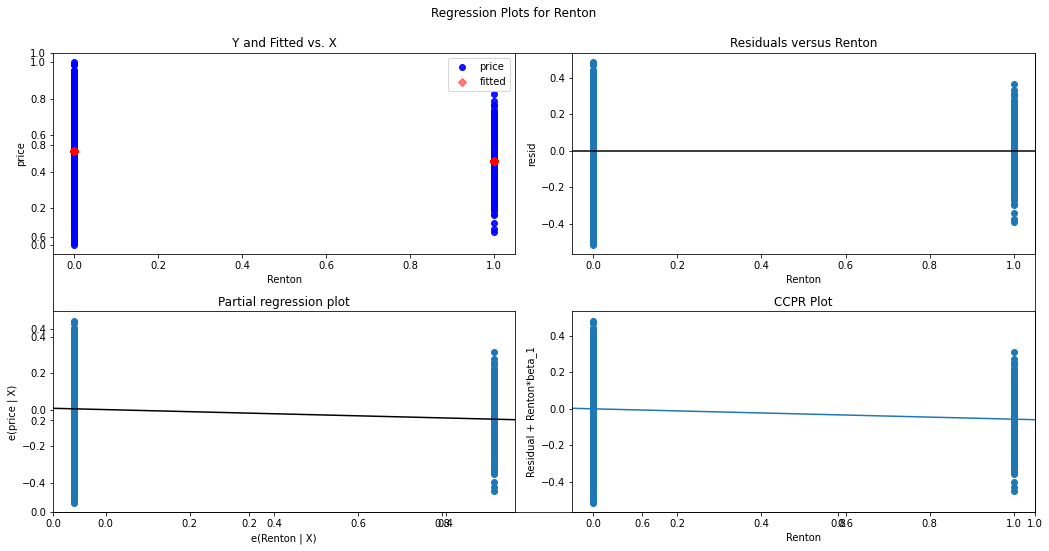

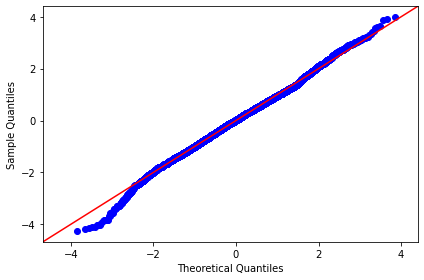

Sammamish normality tests
['Sammamish', 0.023555185455421457, 0.5088013446710864, 0.09904591747970848, 6.13144815789857e-86, 150.26446664595986]


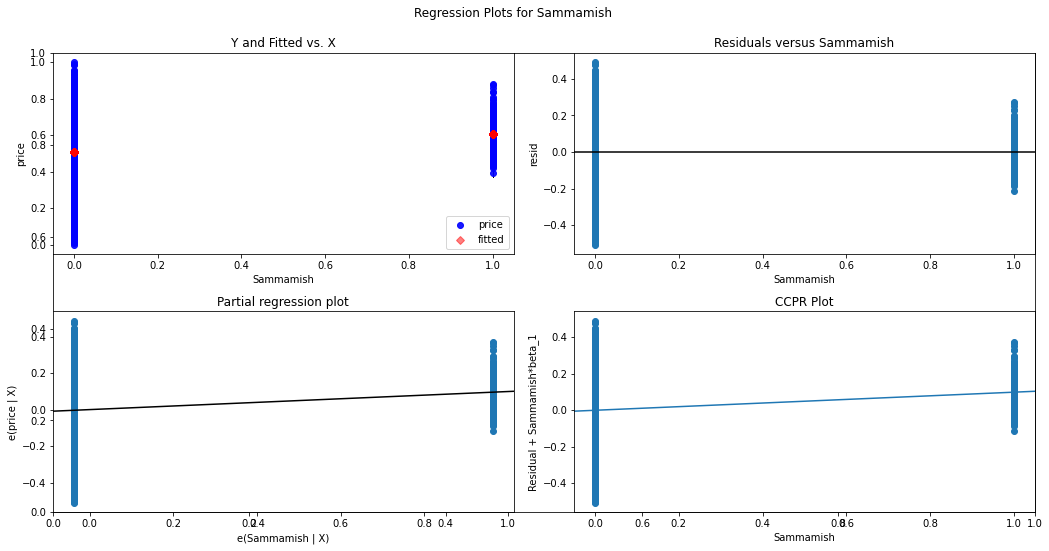

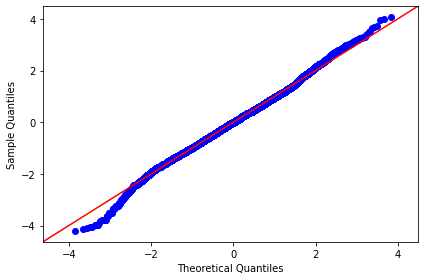

Seattle normality tests
['Seattle', 0.00018239658290764016, 0.5110995420228303, 0.0033491715927105366, 0.08567013682907465, 92.66177588179781]


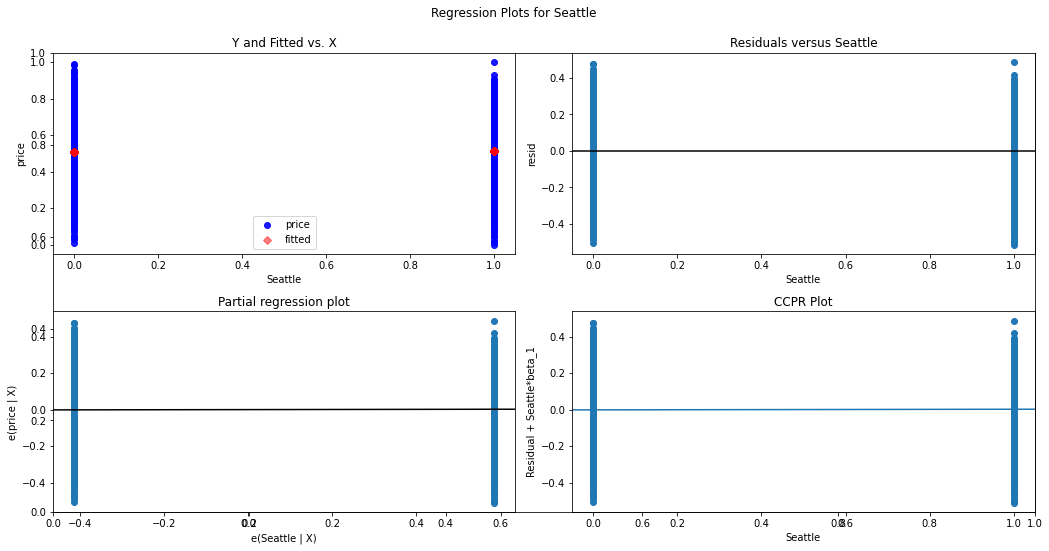

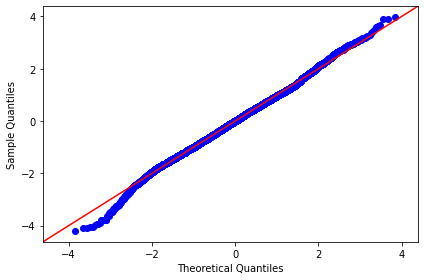

Snoqualmie normality tests
['Snoqualmie', 0.000364434007252723, 0.5122071655092082, 0.01958804268687207, 0.015119085830141002, 90.78161121624645]


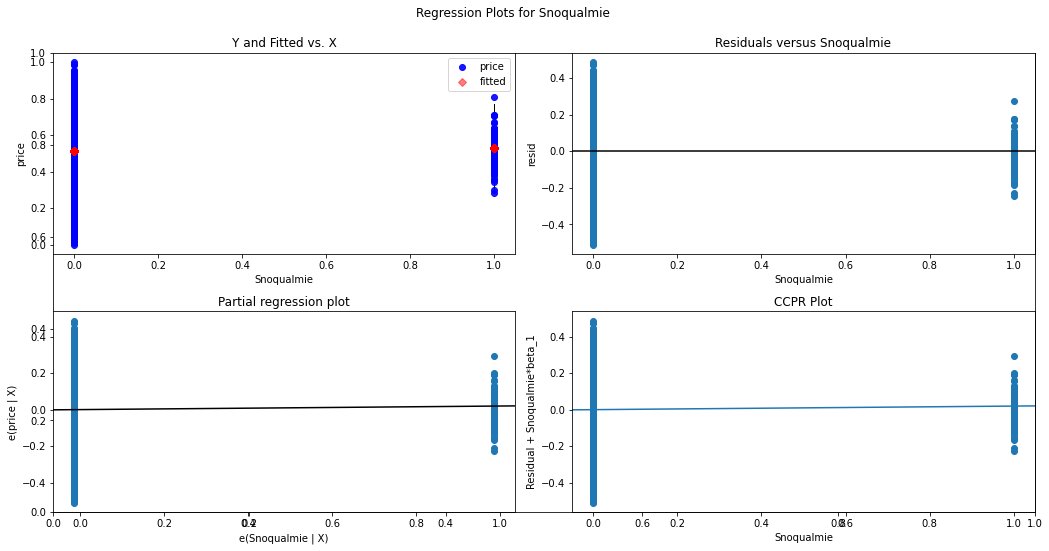

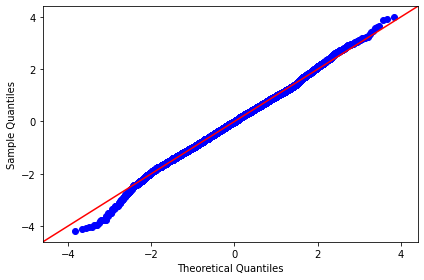

Vashon normality tests
['Vashon', 1.2478606568500084e-05, 0.512522117698764, -0.005652123326357471, 0.6530522953283264, 89.69765807123646]


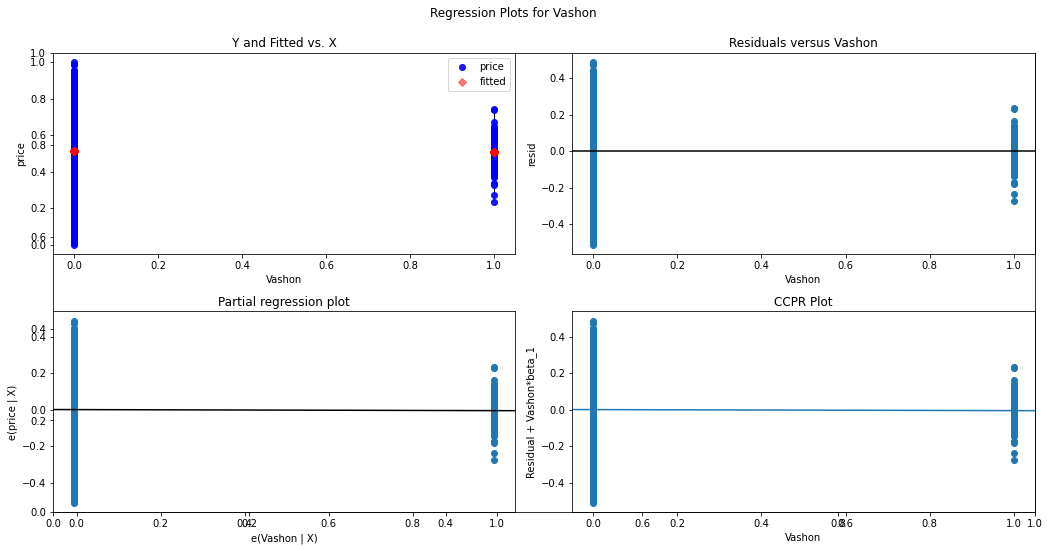

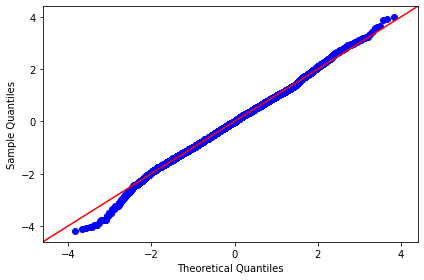

Woodinville normality tests
['Woodinville', 0.004474557222854947, 0.5112584268769227, 0.05551472098757169, 1.5707150990568157e-17, 98.8338320597847]


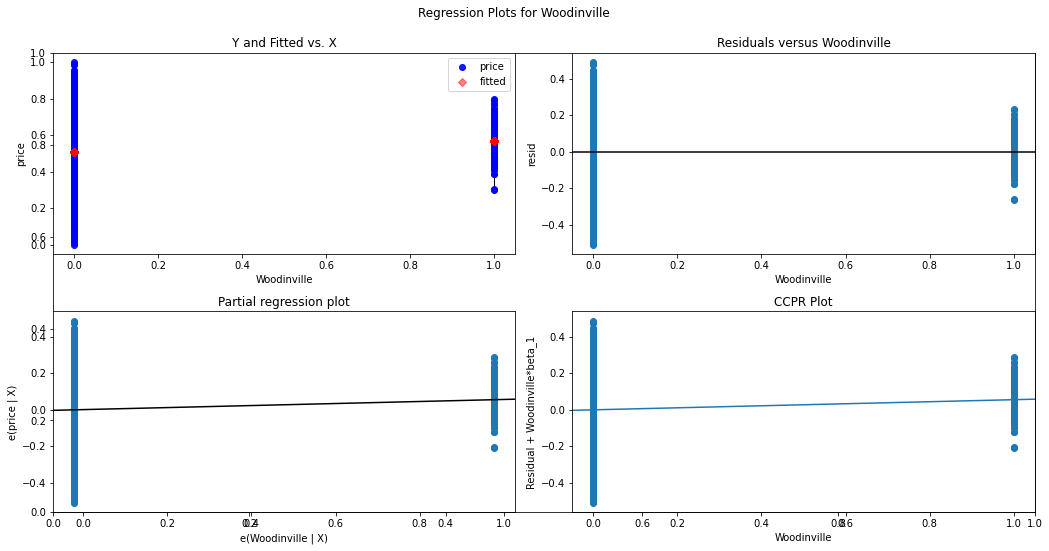

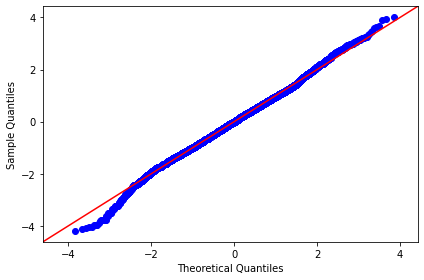

price
0     0.517185
1     0.587565
2     0.477712
3     0.377992
4     0.619291
...        ...
16191 0.805201
16192 0.512014
16193 0.477680
16194 0.989427
16195 0.513085

[16196 rows x 1 columns]

In [666]:
linearity_test(amb_cont_preprocessed)

# Polynomial

In [87]:
no_zip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21595 entries, 0 to 21594
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21595 non-null  int64  
 1   price            21595 non-null  float64
 2   bedrooms         21595 non-null  int64  
 3   bathrooms        21595 non-null  float64
 4   sqft_living      21595 non-null  int64  
 5   sqft_lot         21595 non-null  int64  
 6   floors           21595 non-null  float64
 7   waterfront       21595 non-null  float64
 8   view             21595 non-null  float64
 9   condition        21595 non-null  int64  
 10  grade            21595 non-null  int64  
 11  sqft_above       21595 non-null  int64  
 12  sqft_basement    21595 non-null  float64
 13  yr_built         21595 non-null  int64  
 14  yr_renovated     21595 non-null  float64
 15  lat              21595 non-null  float64
 16  long             21595 non-null  float64
 17  yr_built_bin

In [319]:
#poly_prep

def squared(df, full=False):
    
    poly_prep = df.copy()
    if full == True:
        poly_prep = poly_prep.drop(['PlaceName', 'id', 'lat', 'long'], axis=1)
    for col in poly_prep.columns:
        new_col = f'{col}_sq'
        poly_prep[new_col] = poly_prep[col]**2
    poly_prep = poly_prep.drop('price_sq', axis=1)
    if full ==True:
        col_list = list(poly_prep.columns)
        con_list = [x for x in col_list if x not in cat_list]
        new_df = deskew(poly_prep, con_list)
    new_df=poly_prep
    model = make_ols_model(new_df, cv=True)
    return model



before transform = 4.137104034078792
afer log transform = 1.5991925434413843
afer root transform = 11.343043501087159
afer boxcox transform = 1.1225468651475414
best method = boxcox, see histograms below
Train score:      0.07158412457293453
Validation score: 0.06270199448739947
Train Mean Squarred Error: 0.0053380700925464795
Test Mean Squarred Error: 0.005274635634248204
cros_val r2 = 0.05809463332855286


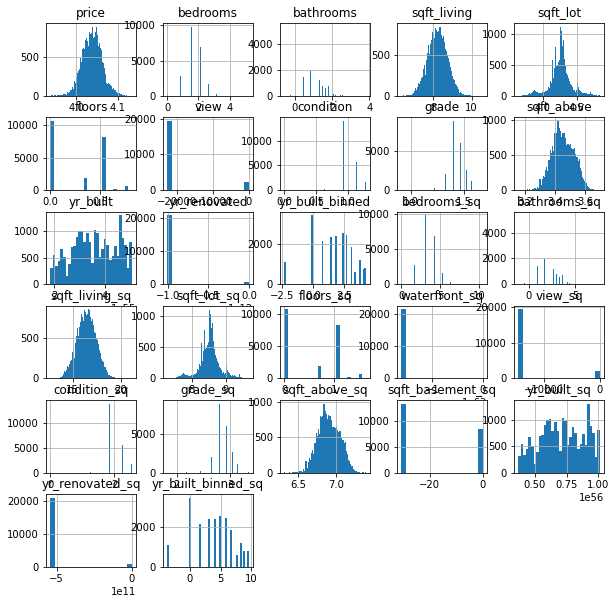

In [131]:
squared_model = squared(no_zip_df)
squared_model

In [132]:
squared_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1113.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:05:28   Log-Likelihood:                 19395.
No. Observations:               16196   AIC:                        -3.874e+04
Df Residuals:                   16169   BIC:                        -3.853e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4038      0.027     15.204      0.000       0.352       0.456
bedrooms            -1.63e+07   5.77e+06     -2.827      0.005   -2.76e+07      -5e+06
bathrooms           2.373e+05    1.6e+06      0.148      0.882    -2.9e+06    3.37e+06
sqft_living         4.082e+05   5.75e+05      0.710      0.478   -7.19e+05    1.54e+06
sqft_lot            3.523e+06    3.1e+05     11.349      0.000    2.91e+06    4.13e+06
floors             -5.729e+07    1.2e+07     -4.764      0.000   -8.09e+07   -3.37e+07
view                 162.6770    119.857      1.357      0.175     -72.257     397.611
condition           1.368e+06   1.69e+06      0.810      0.418   -1.94e+06    4.68e+06
grade              -2.404e+06   4.73e+05     -5.087      0.000   -3.33e+06   -1.48e+06
sqft_above         -1.202e+06   2.17e+05     -5.539      0.000   -1.63e+06   -7.77e+05
yr_built            2.376e+06    2.4e+05      9.884      0.000     1.9e+06    2.85e+06
yr_renovated       -5.737e+10   1.27e+10     -4.511      0.000   -8.23e+10   -3.24e+10
yr_built_binned        0.0871      0.064      1.363      0.173      -0.038       0.212
bedrooms_sq          1.63e+07   5.77e+06      2.827      0.005       5e+06    2.76e+07
bathrooms_sq       -2.373e+05    1.6e+06     -0.148      0.882   -3.37e+06     2.9e+06
sqft_living_sq     -4.082e+05   5.75e+05     -0.710      0.478   -1.54e+06    7.19e+05
sqft_lot_sq        -3.523e+06    3.1e+05    -11.349      0.000   -4.13e+06   -2.91e+06
floors_sq           5.729e+07    1.2e+07      4.764      0.000    3.37e+07    8.09e+07
waterfront_sq          0.0903      0.007     12.165      0.000       0.076       0.105
view_sq             -162.6497    119.859     -1.357      0.175    -397.587      72.287
condition_sq       -1.368e+06   1.69e+06     -0.810      0.418   -4.68e+06    1.94e+06
grade_sq            2.404e+06   4.73e+05      5.087      0.000    1.48e+06    3.33e+06
sqft_above_sq       1.202e+06   2.17e+05      5.539      0.000    7.77e+05    1.63e+06
sqft_basement_sq       0.0173      0.002      7.152      0.000       0.013       0.022
yr_built_sq        -2.376e+06    2.4e+05     -9.884      0.000   -2.85e+06    -1.9e+06
yr_renovated_sq     5.737e+10   1.27e+10      4.511      0.000    3.24e+10    8.23e+10
yr_built_binned_sq    -0.1967      0.081     -2.426      0.015      -0.356      -0.038
==============================================================================
Omnibus:                      304.423   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              370.073
Skew:                          -0.273   Prob(JB):                     4.36e-81
Kurtosis:                       3.501   Cond. No.                     8.08e+13
==============================================================================

In [ ]:
# squared no better

# Most correlated, biggest coefficient, lowest p

## Most correlated

In [173]:
def most_correlated(preprocessed):
    x_train, x_test, y_train, y_test, x, y = splitter(preprocessed)
    co_data = pd.concat([y_train, x_train], axis=1)
    corr = co_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    coo_df = corr.copy()
    for index, row in coo_df.iterrows(): 
        if row['level_0'] == row['level_1']:
            coo_df = coo_df.drop(index)
            continue
        if row['level_0'] == 'price' or row['level_1'] == 'price':
            continue
        else:
            coo_df = coo_df.drop(index)
        
    for index, row in coo_df.iterrows():         
        if row['level_0'] == 'price':
            coo_df = coo_df.drop(index)
    coo_df=coo_df.drop('level_1', axis=1)
    coo_df.rename(columns = {'level_0':'predictor'}, inplace = True)
    
    return coo_df.head(20)

In [396]:
mc = most_correlated(amb_cont_preprocessed)


In [411]:
mc


predictor        0
222             grade 0.679237
333       sqft_living 0.671890
407        sqft_above 0.572742
74          bathrooms 0.537751
37           bedrooms 0.355167
111            floors 0.329525
148              view 0.306744
518          Bellevue 0.257600
888              Kent 0.225114
481     sqft_basement 0.208604
777        FederalWay 0.202176
1036     MercerIsland 0.168754
1184        Sammamish 0.152390
444        waterfront 0.145418
1110          Redmond 0.133231
296   yr_built_binned 0.133226
1147           Renton 0.123361
370          sqft_lot 0.120604
999            Medina 0.112349
259      yr_renovated 0.103493

In [341]:
most_corr_list = mc['predictor'].tolist()[:10]
most_corr_list.append('price')
most_corr_list

['grade',
 'sqft_living',
 'sqft_above',
 'bathrooms',
 'bedrooms',
 'floors',
 'view',
 'Bellevue',
 'Kent',
 'sqft_basement',
 'price']

## biggest coefficient

In [134]:
amb_cont_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1353.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:11:00   Log-Likelihood:                 22294.
No. Observations:               16196   AIC:                        -4.451e+04
Df Residuals:                   16159   BIC:                        -4.423e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1885      0.007    -26.379      0.000      -0.202      -0.174
bedrooms           -0.0726      0.006    -11.451      0.000      -0.085      -0.060
bathrooms           0.0447      0.007      6.338      0.000       0.031       0.059
floors              0.0242      0.002     10.131      0.000       0.020       0.029
view                0.0303      0.002     16.850      0.000       0.027       0.034
condition           0.0947      0.005     17.628      0.000       0.084       0.105
grade               0.4281      0.009     48.260      0.000       0.411       0.445
yr_renovated        0.0189      0.003      6.786      0.000       0.013       0.024
yr_built_binned     0.0568      0.003     17.666      0.000       0.051       0.063
sqft_living         0.3259      0.017     19.262      0.000       0.293       0.359
sqft_lot           -0.0161      0.006     -2.821      0.005      -0.027      -0.005
sqft_above          0.0766      0.015      5.169      0.000       0.048       0.106
waterfront          0.0733      0.006     11.869      0.000       0.061       0.085
sqft_basement       0.0098      0.002      5.076      0.000       0.006       0.014
Bellevue            0.1709      0.003     55.632      0.000       0.165       0.177
BlackDiamond        0.0747      0.008      9.836      0.000       0.060       0.090
Bothell             0.1083      0.006     19.424      0.000       0.097       0.119
Carnation           0.0905      0.007     13.421      0.000       0.077       0.104
Duvall              0.0914      0.006     15.952      0.000       0.080       0.103
Enumclaw            0.0249      0.005      4.772      0.000       0.015       0.035
FallCity            0.1275      0.009     14.942      0.000       0.111       0.144
FederalWay         -0.0102      0.003     -2.972      0.003      -0.017      -0.003
Issaquah            0.1255      0.004     35.535      0.000       0.119       0.132
Kenmore             0.1011      0.005     21.205      0.000       0.092       0.110
Kent                0.0113      0.003      3.635      0.000       0.005       0.017
Kirkland            0.1488      0.003     45.826      0.000       0.142       0.155
MapleValley         0.0455      0.004     12.221      0.000       0.038       0.053
Medina              0.2642      0.010     27.020      0.000       0.245       0.283
MercerIsland        0.1879      0.005     38.033      0.000       0.178       0.198
NorthBend           0.0899      0.005     16.864      0.000       0.079       0.100
Redmond             0.1458      0.003     44.915      0.000       0.139       0.152
Renton              0.0616      0.003     21.338      0.000       0.056       0.067
Sammamish           0.1317      0.003     37.969      0.000       0.125       0.139
Seattle             0.1275      0.003     49.155      0.000

In [386]:
def make_big_coef_dic(model, df):
    coeff_list = list(model.params[1:])
    feature_list = list(df.columns)
    feature_list.remove('price')
    coeff_dict = dict(zip(feature_list, coeff_list))
    coeff_sl = sorted(coeff_dict.items(), key=lambda x:x[1], reverse=True)
    coeff_sort = dict(coeff_sl)
    print(coeff_sl[:10])
    return coeff_sort
    

In [387]:
big_coef_dic = make_big_coef_dic(amb_cont_model, amb_cont_preprocessed)

[('grade', 0.428076931303201), ('sqft_living', 0.32589913026045847), ('Medina', 0.26424233496861105), ('MercerIsland', 0.18785644236764998), ('Bellevue', 0.17092747969845795), ('Kirkland', 0.14876198107269928), ('Redmond', 0.1458098995326868), ('Sammamish', 0.13173180089646466), ('FallCity', 0.12751863059542357), ('Seattle', 0.12746120592375898)]


## lowest p

In [156]:
amb_cont_model.pvalues

const             0.000000
bedrooms          0.000000
bathrooms         0.000000
floors            0.000000
view              0.000000
condition         0.000000
grade             0.000000
yr_renovated      0.000000
yr_built_binned   0.000000
sqft_living       0.000000
sqft_lot          0.004788
sqft_above        0.000000
waterfront        0.000000
sqft_basement     0.000000
Bellevue          0.000000
BlackDiamond      0.000000
Bothell           0.000000
Carnation         0.000000
Duvall            0.000000
Enumclaw          0.000002
FallCity          0.000000
FederalWay        0.002960
Issaquah          0.000000
Kenmore           0.000000
Kent              0.000279
Kirkland          0.000000
MapleValley       0.000000
Medina            0.000000
MercerIsland      0.000000
NorthBend         0.000000
Redmond           0.000000
Renton            0.000000
Sammamish         0.000000
Seattle           0.000000
Snoqualmie        0.000000
Vashon            0.000000
Woodinville       0.000000
d

# colinearity

In [157]:
def colin_non_price(prep):
    cor_df= prep.copy()
    cor_df =cor_df.drop('price', axis=1)
    cor_df = cor_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    cor_df['pairs'] = list(zip(cor_df.level_0, cor_df.level_1))
    for index, row in cor_df.iterrows(): 
        if row['level_0'] == row['level_1']:
            cor_df = cor_df.drop(index)
    cor_df.set_index(['pairs'], inplace = True)
    return cor_df

In [158]:
colin_non_price(amb_cont_preprocessed).head(30)

level_0          level_1        0
pairs                                                                  
(sqft_above, sqft_living)          sqft_above      sqft_living 0.864335
(sqft_living, sqft_above)         sqft_living       sqft_above 0.864335
(sqft_living, bathrooms)          sqft_living        bathrooms 0.767186
(bathrooms, sqft_living)            bathrooms      sqft_living 0.767186
(grade, sqft_living)                    grade      sqft_living 0.742443
(sqft_living, grade)              sqft_living            grade 0.742443
(grade, sqft_above)                     grade       sqft_above 0.729557
(sqft_above, grade)                sqft_above            grade 0.729557
(bathrooms, sqft_above)             bathrooms       sqft_above 0.694749
(sqft_above, bathrooms)            sqft_above        bathrooms 0.694749
(grade, bathrooms)                      grade        bathrooms 0.665375
(bathrooms, grade)                  bathrooms            grade 0.665375
(bedrooms, sqft_living)              bedrooms      sqft_living 0.647333
(sqft_living, bedrooms)           sqft_living         bedrooms 0.647333
(sqft_above, floors)               sqft_above           floors 0.586259
(floors, sqft_above)                   floors       sqft_above 0.586259
(bedrooms, sqft_above)               bedrooms       sqft_above 0.548542
(sqft_above, bedrooms)             sqft_above         bedrooms 0.548542
(bedrooms, bathrooms)                bedrooms        bathrooms 0.534700
(bathrooms, bedrooms)               bathrooms         bedrooms 0.534700
(yr_built_binned, floors)     yr_built_binned           floors 0.528637
(floors, yr_built_binned)              floors  yr_built_binned 0.528637
(floors, bathrooms)                    floors        bathrooms 0.516494
(bathrooms, floors)                 bathrooms           floors 0.516494
(yr_built_binned, bathrooms)  yr_built_binned        bathrooms 0.516350
(bathrooms, yr_built_binned)        bathrooms  yr_built_binned 0.516350
(floors, grade)                        floors            grade 0.470730
(grade, floors)                         grade           floors 0.470730
(grade, yr_built_binned)                grade  yr_built_binned 0.450385
(yr_built_binned, grade)      yr_built_binned            grade 0.450385

In [176]:
colin_drop = amb_cont_preprocessed.copy()
colin_list = ['sqft_above', 'bathrooms', 'bedrooms', 'floors']
colin_drop = colin_drop.drop(colin_list, axis=1)
colin_drop

view  condition    grade          yr_renovated  \
0     -22728.028431   0.936001 1.401038 -1006207521219.515747   
1     -22728.028431   0.936001 1.401038              0.000000   
2     -22728.028431   0.936001 1.322130 -1006207521219.515747   
3     -22728.028431   1.276705 1.401038 -1006207521219.515747   
4     -22728.028431   0.936001 1.465955 -1006207521219.515747   
...             ...        ...      ...                   ...   
21590 -22728.028431   0.936001 1.465955 -1006207521219.515747   
21591 -22728.028431   0.936001 1.465955 -1006207521219.515747   
21592 -22728.028431   0.936001 1.401038 -1006207521219.515747   
21593 -22728.028431   0.936001 1.465955 -1006207521219.515747   
21594 -22728.028431   0.936001 1.401038 -1006207521219.515747   

       yr_built_binned    price  sqft_living  sqft_lot  waterfront  \
0             2.707751 4.002440     7.661369  4.211720    0.000000   
1             2.707751 4.046074     8.580641  4.257717    0.000000   
2             3.373366 3.990726     7.163960  4.314317    0.000000   
3             2.326875 4.051131     8.258827  4.188255    0.000000   
4             1.406828 4.043692     8.076612  4.277318    0.000000   
...                ...      ...          ...       ...         ...   
21590         0.000000 4.027407     7.966363  3.853999    0.000000   
21591        -2.303386 4.032475     8.453733  4.217102    0.000000   
21592         0.000000 4.032724     7.491050  3.898995    0.000000   
21593         0.000000 4.032475     8.019069  4.033991    0.000000   
21594         0.000000 4.022365     7.491050  3.841047    0.000000   

       sqft_basement  ...  Medina  MercerIsland  NorthBend  Redmond  Renton  \
0           0.000000  ...       0             0          0        0       0   
1           1.000000  ...       0             0          0        0       0   
2           0.000000  ...       0             0          0        0       0   
3           1.000000  ...       0             0          0        0       0   
4           0.000000  ...       0             0          0        0       0   
...              ...  ...     ...           ...        ...      ...     ...   
21590       0.000000  ...       0             0          0        0       0   
21591       0.000000  ...       0             0          0        0       0   
21592       0.000000  ...       0             0          0        0       0   
21593       0.000000  ...       0             0          0        0       0   
21594       0.000000  ...       0             0          0        0       0   

       Sammamish  Seattle  Snoqualmie  Vashon  Woodinville  
0              0        1           0       0            0  
1              0        1           0       0            0  
2              0        0           0       0            0  
3              0        1           0       0            0  
4              1        0           0       0            0  
...          ...      ...         ...     ...          ...  
21590          0        1           0       0            0  
21591          0        1           0       0            0  
21592          0        1           0       0            0  
21593          0        0           0       0            0  
21594          0        1           0       0            0  

[21595 rows x 33 columns]

In [170]:
colin_drop_model = make_ols_model(colin_drop, cv=True)

Train score:      0.7482353202314319
Validation score: 0.742075580999947
Train Mean Squarred Error: 0.0037226334040729447
Test Mean Squarred Error: 0.0037657651777089993
cros_val r2 = 0.7411830945215683


In [171]:
colin_drop_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1511.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:47:08   Log-Likelihood:                 22314.
No. Observations:               16196   AIC:                        -4.456e+04
Df Residuals:                   16163   BIC:                        -4.431e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0620      0.006    -10.555      0.000      -0.074      -0.051
view                0.0322      0.002     17.951      0.000       0.029       0.036
condition           0.0932      0.005     17.396      0.000       0.083       0.104
grade               0.3580      0.007     54.841      0.000       0.345       0.371
yr_renovated        0.0214      0.003      7.738      0.000       0.016       0.027
yr_built_binned     0.0434      0.003     14.584      0.000       0.038       0.049
sqft_living         0.4123      0.007     57.936      0.000       0.398       0.426
sqft_lot           -0.0544      0.005    -10.534      0.000      -0.065      -0.044
waterfront          0.0835      0.006     13.784      0.000       0.072       0.095
sqft_basement      -0.0046      0.001     -4.061      0.000      -0.007      -0.002
Bellevue            0.1652      0.003     54.086      0.000       0.159       0.171
BlackDiamond        0.0849      0.007     11.600      0.000       0.071       0.099
Bothell             0.1081      0.006     19.215      0.000       0.097       0.119
Carnation           0.1015      0.007     14.803      0.000       0.088       0.115
Duvall              0.0908      0.006     16.014      0.000       0.080       0.102
Enumclaw            0.0248      0.005      4.678      0.000       0.014       0.035
FallCity            0.1341      0.009     15.469      0.000       0.117       0.151
FederalWay         -0.0127      0.003     -3.710      0.000      -0.019      -0.006
Issaquah            0.1239      0.004     34.803      0.000       0.117       0.131
Kenmore             0.0984      0.005     20.680      0.000       0.089       0.108
Kent                0.0111      0.003      3.606      0.000       0.005       0.017
Kirkland            0.1472      0.003     45.040      0.000       0.141       0.154
MapleValley         0.0490      0.004     13.094      0.000       0.042       0.056
Medina              0.2565      0.010     26.262      0.000       0.237       0.276
MercerIsland        0.1822      0.005     37.342      0.000       0.173       0.192
NorthBend           0.0943      0.005     17.319      0.000       0.084       0.105
Redmond             0.1450      0.003     44.348      0.000       0.139       0.151
Renton              0.0604      0.003     20.670      0.000       0.055       0.066
Sammamish           0.1298      0.004     36.927      0.000       0.123       0.137
Seattle             0.1246      0.003     47.878      0.000       0.120       0.130
Snoqualmie          0.1076      0.005     23.010      0.000       0.098       0.117
Vashon              0.1087      0.007     16.045      0.000       0.095       0.122
Woodinville         0.1183      0.004     29.379      0.000       0.110       0.126
===========================================================

# iterate through using strength corr and pearson to get best combos

In [467]:
def iterator(df, features_list):

    regression = LinearRegression()
    crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)

    it_df = df.copy()

    y_i = it_df['price']
    X_f = pd.DataFrame()
    
    score_dic = {}
    c_i = 0
    feature_string = ''
    
    for l in features_list:
        feature_string += l
        feature_string += '~'
        extracted_col = it_df[l]
        X_f.insert(c_i, l, extracted_col)
        c_i += 1

        score = np.mean(cross_val_score(regression, X_f, y_i, scoring='r2', cv=crossvalidation))
        score_dic[feature_string] = score
        
    top_sl = sorted(score_dic.items(), key=lambda x:x[1], reverse=True)[:20]
    corr_sort = dict(top_sl)
    return corr_sort


In [403]:
#create lst of most corelated and highest coeff features to iterate through

In [472]:
def make_scores_dic(df, most_c, col_list, coe_dic):
    #make most_correlated list
    mc_l = most_c['predictor'].tolist()
    mc_list = [x for x in mc_l if x not in col_list]
    
    #make biggest coefficient list
    big_coeff_l = list(coe_dic.keys())
    big_coeff_list = [x for x in big_coeff_l if x not in col_list]
    
    big_coeff_scores = iterator(df, big_coeff_list)    
    most_corr_scores = iterator(df, mc_list)
    
    return big_coeff_scores, most_corr_scores

In [473]:
def feature_counter(f_dict, count_list):
    if count_list == 'new':
        count_list={}
    
    for it in list(f_dict.keys()):
        ex = it.split('~')
        for f in ex:
            if f in count_list.keys():
                count_list[f] += 1
            else:
                count_list[f] = 1
    return count_list

In [474]:
# takes dataframe, dropped colin list, dataframe of most corelated and dict of largest coefficients
# starts with most correlated list, working from most cor on its own, works out 
# r2 value of model. Adds next most corelated until all on list are included and calcs scores for each
# sorts and stores as a dictionary
# does the same for highest coefficients
# we got through each dictionary, break up the keys into individual feature parts and
# count the total of each across both dicts. The 10 most common are made into a list
# to be used as the final features

def make_corr_coef_features_list(df, most_c, col_list, coe_dic):
    
    big_coeff_scores, most_corr_scores = make_scores_dic(df, most_c, col_list, coe_dic)

    most_corr_count = feature_counter(most_corr_scores, 'new')
    full_count = feature_counter(big_coeff_scores, most_corr_count)
    
    
    top_c = sorted(full_count.items(), key=lambda x:x[1], reverse=True)[:20]
    top_comb = dict(top_c)
    final_full_list = [x for x in top_comb.keys() if top_comb[x]]
    return final_full_list


In [475]:
feat_list = make_corr_coef_features_list(colin_drop, mc, colin_list, big_coef_dic)
feat_list

['grade',
 '',
 'sqft_living',
 'Bellevue',
 'MercerIsland',
 'Sammamish',
 'Redmond',
 'Medina',
 'view',
 'Kirkland',
 'FallCity',
 'Seattle',
 'Issaquah',
 'Woodinville',
 'Bothell',
 'Snoqualmie',
 'waterfront',
 'Vashon',
 'Kenmore',
 'Kent']

# test final

In [441]:
feat_list.pop(1)
feat_list


['grade',
 'sqft_living',
 'Bellevue',
 'MercerIsland',
 'Sammamish',
 'Redmond',
 'Medina',
 'view',
 'Kirkland',
 'FallCity',
 'Seattle',
 'Issaquah',
 'Woodinville',
 'Bothell',
 'Snoqualmie',
 'waterfront',
 'Vashon',
 'Kenmore',
 'Kent']

In [442]:
feat_list.append('price')
final_df = amb_cont_preprocessed[feat_list]
final_df

grade  sqft_living  Bellevue  MercerIsland  Sammamish  Redmond  \
0     1.401038     7.661369         0             0          0        0   
1     1.401038     8.580641         0             0          0        0   
2     1.322130     7.163960         0             0          0        0   
3     1.401038     8.258827         0             0          0        0   
4     1.465955     8.076612         0             0          1        0   
...        ...          ...       ...           ...        ...      ...   
21590 1.465955     7.966363         0             0          0        0   
21591 1.465955     8.453733         0             0          0        0   
21592 1.401038     7.491050         0             0          0        0   
21593 1.465955     8.019069         0             0          0        0   
21594 1.401038     7.491050         0             0          0        0   

       Medina          view  Kirkland  FallCity  Seattle  Issaquah  \
0           0 -22728.028431         0         0        1         0   
1           0 -22728.028431         0         0        1         0   
2           0 -22728.028431         0         0        0         0   
3           0 -22728.028431         0         0        1         0   
4           0 -22728.028431         0         0        0         0   
...       ...           ...       ...       ...      ...       ...   
21590       0 -22728.028431         0         0        1         0   
21591       0 -22728.028431         0         0        1         0   
21592       0 -22728.028431         0         0        1         0   
21593       0 -22728.028431         0         0        0         1   
21594       0 -22728.028431         0         0        1         0   

       Woodinville  Bothell  Snoqualmie  waterfront  Vashon  Kenmore  Kent  \
0                0        0           0    0.000000       0        0     0   
1                0        0           0    0.000000       0        0     0   
2                0        0           0    0.000000       0        1     0   
3                0        0           0    0.000000       0        0     0   
4                0        0           0    0.000000       0        0     0   
...            ...      ...         ...         ...     ...      ...   ...   
21590            0        0           0    0.000000       0        0     0   
21591            0        0           0    0.000000       0        0     0   
21592            0        0           0    0.000000       0        0     0   
21593            0        0           0    0.000000       0        0     0   
21594            0        0           0    0.000000       0        0     0   

         price  
0     4.002440  
1     4.046074  
2     3.990726  
3     4.051131  
4     4.043692  
...        ...  
21590 4.027407  
21591 4.032475  
21592 4.032724  
21593 4.032475  
21594 4.022365  

[21595 rows x 20 columns]

In [443]:
final_model = make_ols_model(final_df, cv=True)

Train score:      0.7178224229455393
Validation score: 0.7164046980254326
Train Mean Squarred Error: 0.004217120102864646
Test Mean Squarred Error: 0.004063395015185808
cros_val r2 = 0.7163324989554718


In [240]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     2164.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:05:52   Log-Likelihood:                 20991.
No. Observations:               16196   AIC:                        -4.194e+04
Df Residuals:                   16176   BIC:                        -4.179e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0403      0.004     -9.129      0.000      -0.049      -0.032
grade            0.4206      0.009     49.317      0.000       0.404       0.437
sqft_living      0.4156      0.007     61.047      0.000       0.402       0.429
Bellevue         0.1428      0.002     60.557      0.000       0.138       0.147
MercerIsland     0.1672      0.005     34.602      0.000       0.158       0.177
Sammamish        0.0960      0.003     32.373      0.000       0.090       0.102
Redmond          0.1107      0.003     40.254      0.000       0.105       0.116
Medina           0.2360      0.011     20.610      0.000       0.214       0.258
view             0.0337      0.002     17.735      0.000       0.030       0.037
Kirkland         0.1175      0.003     43.531      0.000       0.112       0.123
FallCity         0.0915      0.009     10.527      0.000       0.075       0.109
Seattle          0.1038      0.001     74.317      0.000       0.101       0.107
Issaquah         0.0914      0.003     29.302      0.000       0.085       0.098
Woodinville      0.0830      0.004     21.961      0.000       0.076       0.090
Bothell          0.0711      0.006     12.916      0.000       0.060       0.082
waterfront       0.0893      0.007     13.157      0.000       0.076       0.103
Snoqualmie       0.0655      0.005     14.266      0.000       0.057       0.075
Vashon           0.0712      0.007      9.761      0.000       0.057       0.086
Kenmore          0.0655      0.005     14.104      0.000       0.056       0.075
Kent            -0.0260      0.002    -10.579      0.000      -0.031      -0.021
==============================================================================
Omnibus:                      942.464   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2394.672
Skew:                          -0.339   Prob(JB):                         0.00
Kurtosis:                       4.757   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## add interact effect

In [444]:
final_df_interact = final_df.copy()
final_df_interact['grade*sqft_living'] = final_df['grade'] * final_df['sqft_living']
final_df_interact


grade  sqft_living  Bellevue  MercerIsland  Sammamish  Redmond  \
0     1.401038     7.661369         0             0          0        0   
1     1.401038     8.580641         0             0          0        0   
2     1.322130     7.163960         0             0          0        0   
3     1.401038     8.258827         0             0          0        0   
4     1.465955     8.076612         0             0          1        0   
...        ...          ...       ...           ...        ...      ...   
21590 1.465955     7.966363         0             0          0        0   
21591 1.465955     8.453733         0             0          0        0   
21592 1.401038     7.491050         0             0          0        0   
21593 1.465955     8.019069         0             0          0        0   
21594 1.401038     7.491050         0             0          0        0   

       Medina          view  Kirkland  FallCity  ...  Issaquah  Woodinville  \
0           0 -22728.028431         0         0  ...         0            0   
1           0 -22728.028431         0         0  ...         0            0   
2           0 -22728.028431         0         0  ...         0            0   
3           0 -22728.028431         0         0  ...         0            0   
4           0 -22728.028431         0         0  ...         0            0   
...       ...           ...       ...       ...  ...       ...          ...   
21590       0 -22728.028431         0         0  ...         0            0   
21591       0 -22728.028431         0         0  ...         0            0   
21592       0 -22728.028431         0         0  ...         0            0   
21593       0 -22728.028431         0         0  ...         1            0   
21594       0 -22728.028431         0         0  ...         0            0   

       Bothell  Snoqualmie  waterfront  Vashon  Kenmore  Kent    price  \
0            0           0    0.000000       0        0     0 4.002440   
1            0           0    0.000000       0        0     0 4.046074   
2            0           0    0.000000       0        1     0 3.990726   
3            0           0    0.000000       0        0     0 4.051131   
4            0           0    0.000000       0        0     0 4.043692   
...        ...         ...         ...     ...      ...   ...      ...   
21590        0           0    0.000000       0        0     0 4.027407   
21591        0           0    0.000000       0        0     0 4.032475   
21592        0           0    0.000000       0        0     0 4.032724   
21593        0           0    0.000000       0        0     0 4.032475   
21594        0           0    0.000000       0        0     0 4.022365   

       grade*sqft_living  
0              10.733869  
1              12.021803  
2               9.471688  
3              11.570930  
4              11.839946  
...                  ...  
21590          11.678326  
21591          12.392789  
21592          10.495246  
21593          11.755591  
21594          10.495246  

[21595 rows x 21 columns]

In [445]:
final_interact_model = make_ols_model(final_df_interact, cv=True)


Train score:      0.7192578270066514
Validation score: 0.7179082447077222
Train Mean Squarred Error: 0.004121117175339896
Test Mean Squarred Error: 0.004263325408196634
cros_val r2 = 0.7178883670460817


In [446]:
final_interact_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     2115.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:43:23   Log-Likelihood:                 21490.
No. Observations:               16196   AIC:                        -4.294e+04
Df Residuals:                   16175   BIC:                        -4.278e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1401      0.009     15.726      0.000       0.123       0.158
grade                -0.1172      0.052     -2.271      0.023      -0.218      -0.016
sqft_living          -0.1360      0.065     -2.081      0.037      -0.264      -0.008
Bellevue              0.1365      0.002     59.811      0.000       0.132       0.141
MercerIsland          0.1571      0.005     34.200      0.000       0.148       0.166
Sammamish             0.0917      0.003     31.123      0.000       0.086       0.098
Redmond               0.1074      0.003     40.769      0.000       0.102       0.113
Medina                0.2260      0.010     23.270      0.000       0.207       0.245
view                  0.0335      0.002     17.911      0.000       0.030       0.037
Kirkland              0.1152      0.003     44.068      0.000       0.110       0.120
FallCity              0.0846      0.008     11.055      0.000       0.070       0.100
Seattle               0.1009      0.001     74.185      0.000       0.098       0.104
Issaquah              0.0886      0.003     29.626      0.000       0.083       0.094
Woodinville           0.0819      0.004     22.134      0.000       0.075       0.089
Bothell               0.0693      0.005     12.982      0.000       0.059       0.080
Snoqualmie            0.0633      0.004     14.307      0.000       0.055       0.072
waterfront            0.0863      0.006     13.421      0.000       0.074       0.099
Vashon                0.0743      0.007     10.827      0.000       0.061       0.088
Kenmore               0.0628      0.004     13.965      0.000       0.054       0.072
Kent                 -0.0236      0.002     -9.839      0.000      -0.028      -0.019
grade*sqft_living     0.9276      0.111      8.351      0.000       0.710       1.145
==============================================================================
Omnibus:                     1048.051   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2436.583
Skew:                          -0.409   Prob(JB):                         0.00
Kurtosis:                       4.715   Cond. No.                         387.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
# ignore, not worth the bad scores

# run linearity tests

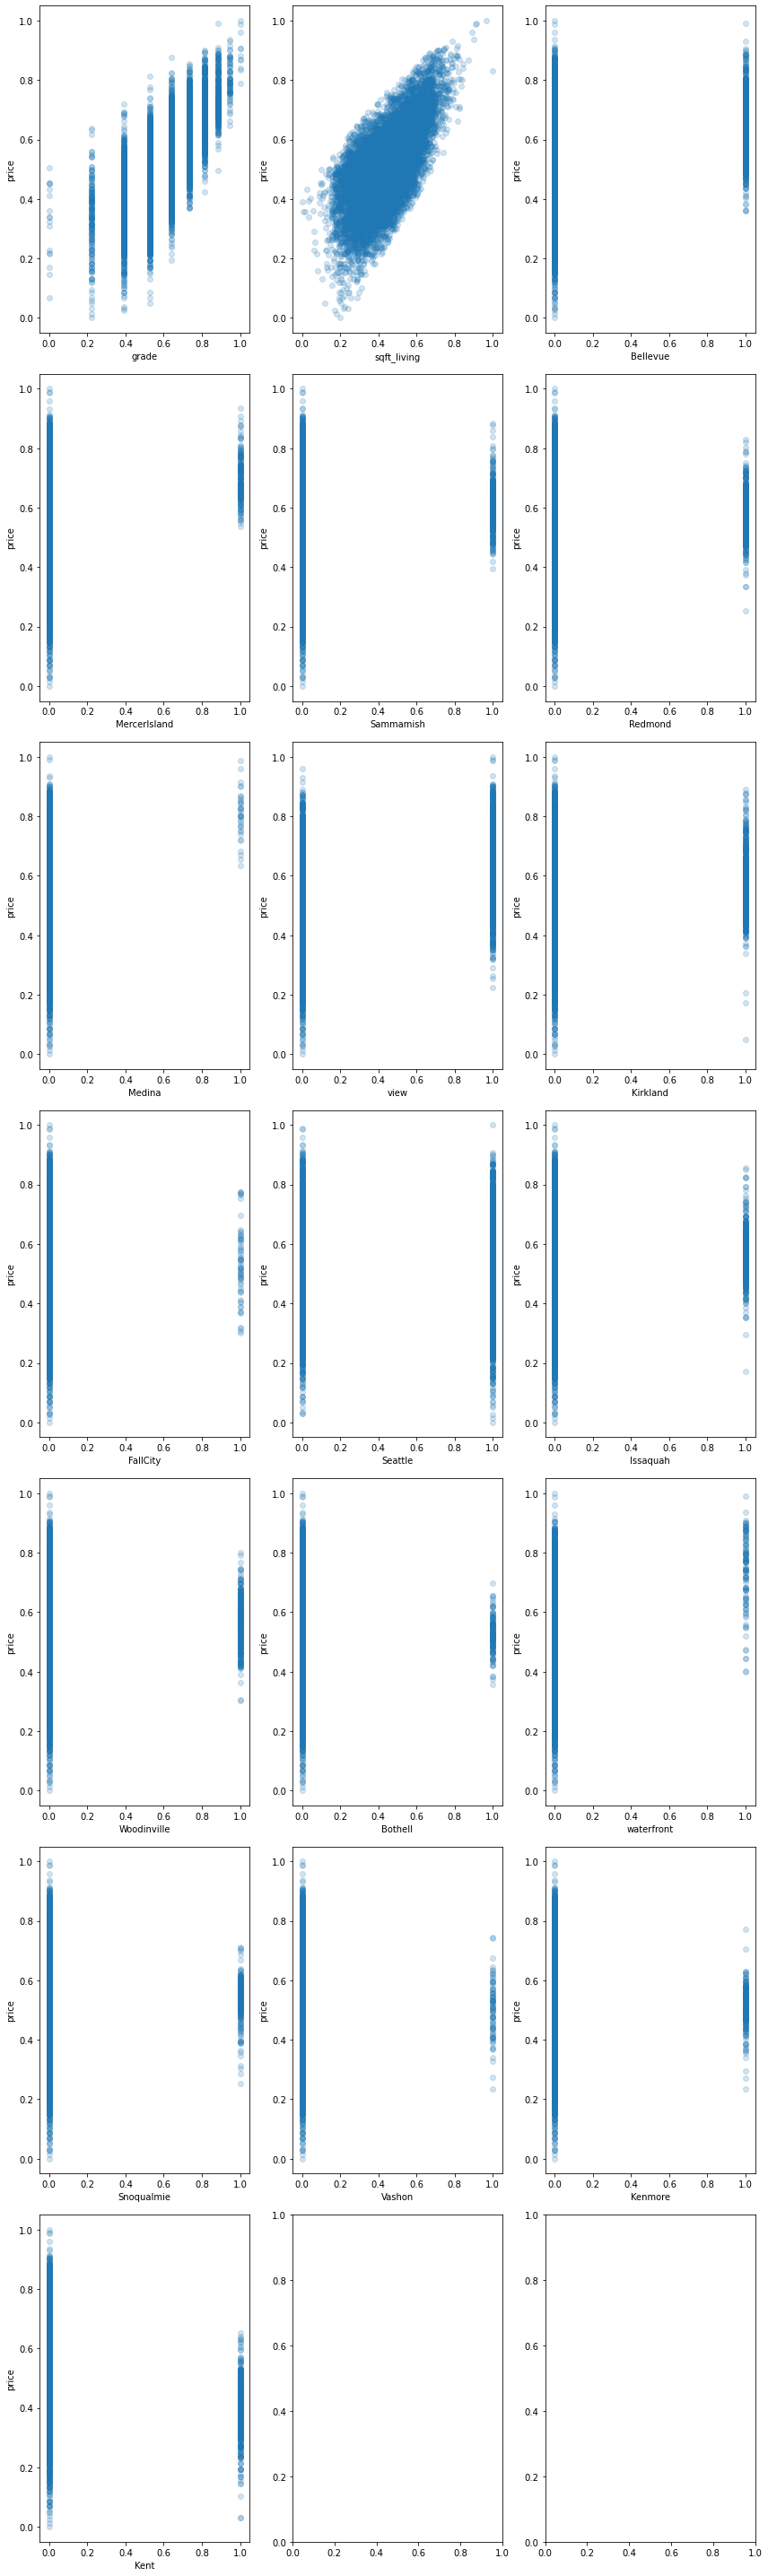

In [249]:
scatterplot(final_df)

price normality tests
['price', 1.0, -5.238864897449957e-16, 1.0000000000000007, 0.0, 1062.6853003870704]


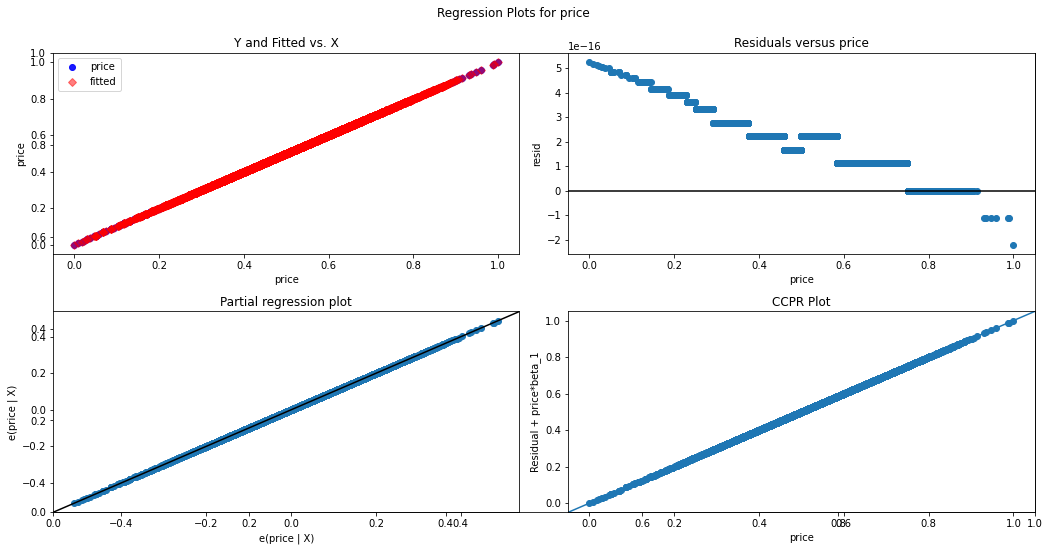

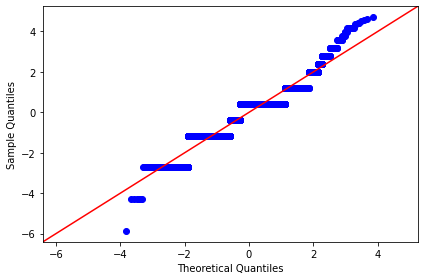

grade normality tests
['grade', 0.46036123874751644, 0.11605562216227996, 0.6703919152973007, 0.0, 54.951667861040036]


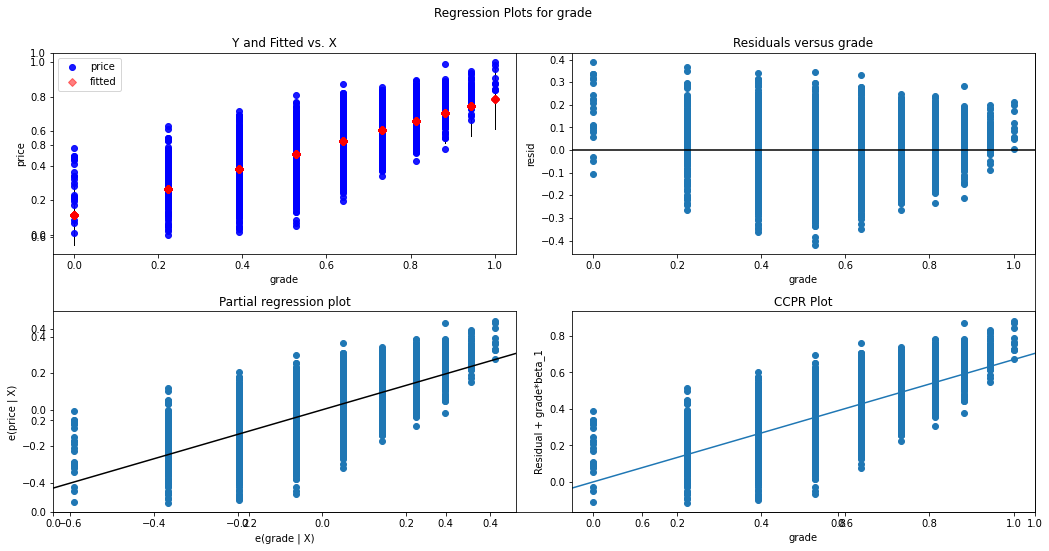

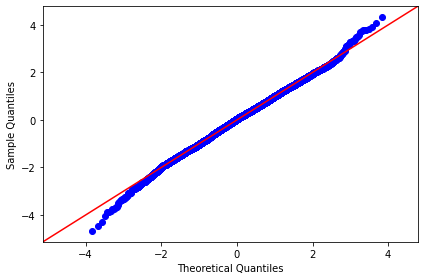

sqft_living normality tests
['sqft_living', 0.4485693840834254, 0.20243813165846475, 0.6936176836625412, 0.0, 97.00782419418636]


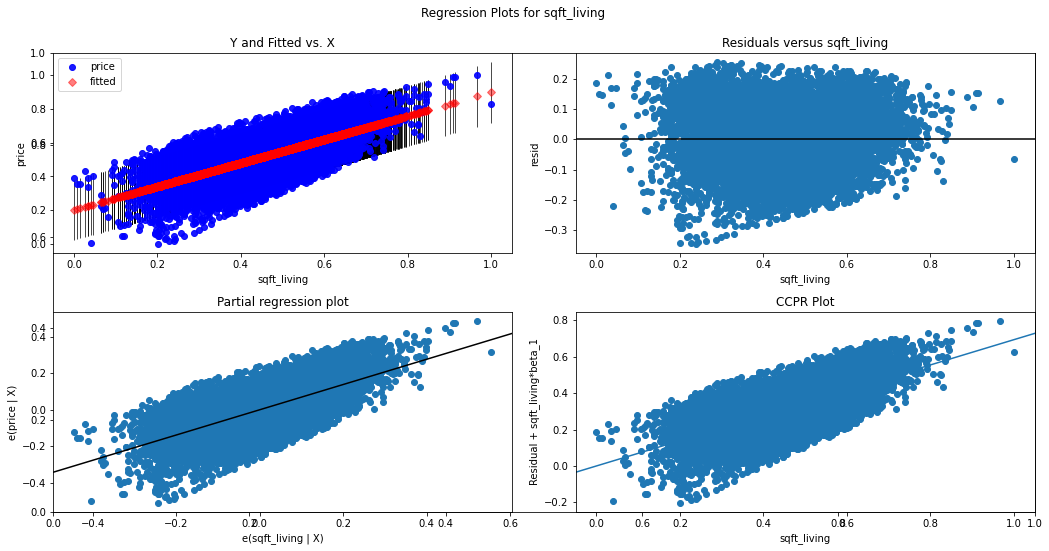

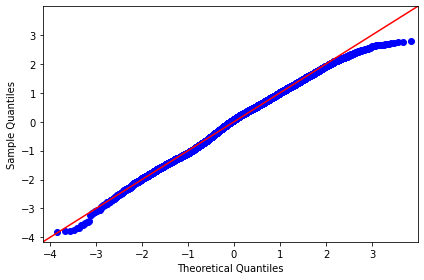

Bellevue normality tests
['Bellevue', 0.06498371732421115, 0.5031131036775596, 0.12602700398508176, 1.2981353329553307e-238, 95.44540004010419]


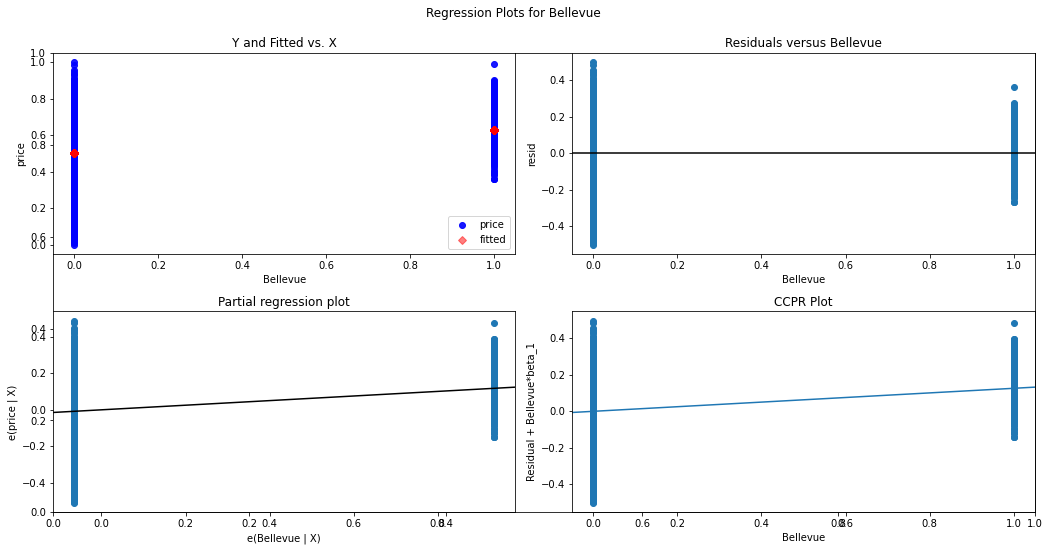

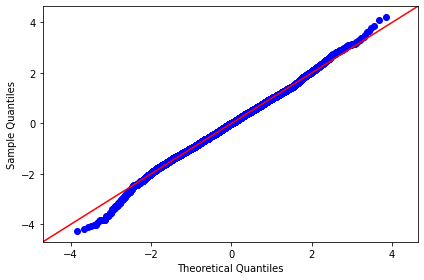

MercerIsland normality tests
['MercerIsland', 0.028695223694017002, 0.5089950644547065, 0.18539352677241713, 1.5315428323398592e-104, 90.12809009050706]


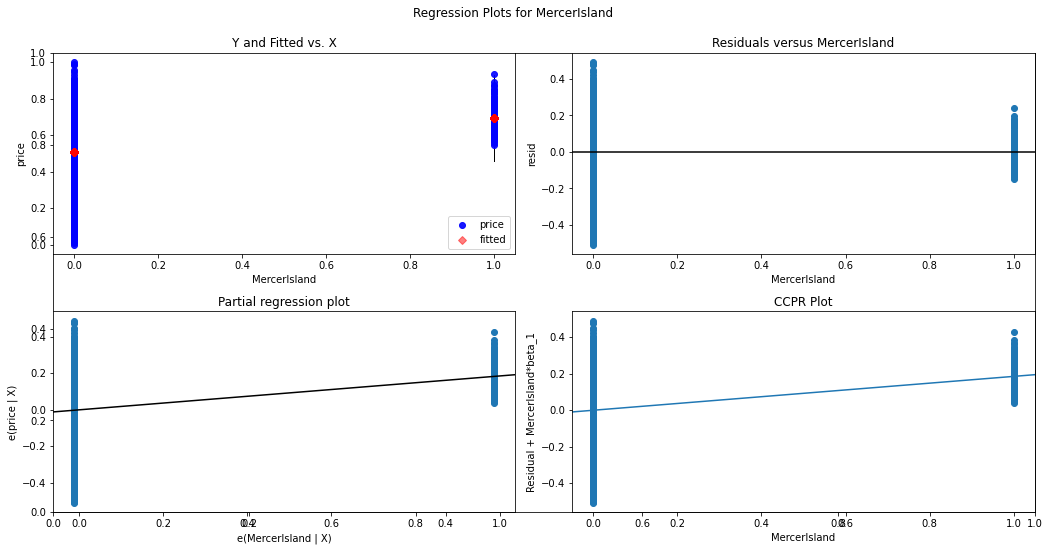

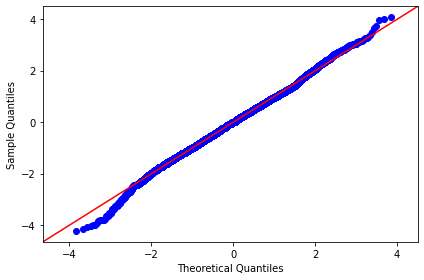

Sammamish normality tests
['Sammamish', 0.022496947810669687, 0.507798985359978, 0.09843713679826596, 4.040842609630944e-82, 110.24882470258355]


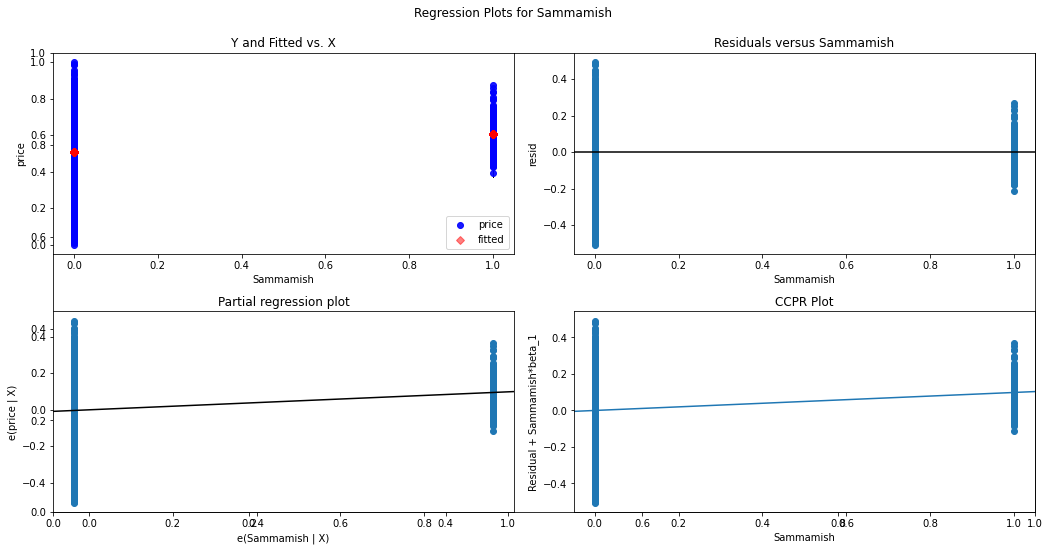

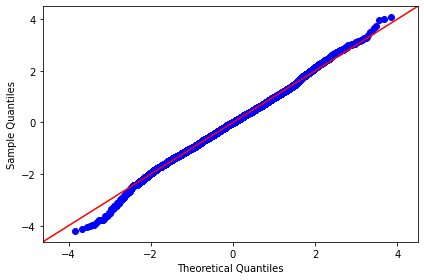

Redmond normality tests
['Redmond', 0.017886598407397925, 0.5077889406088023, 0.07878387537064929, 1.5933446446610498e-65, 102.64336509250224]


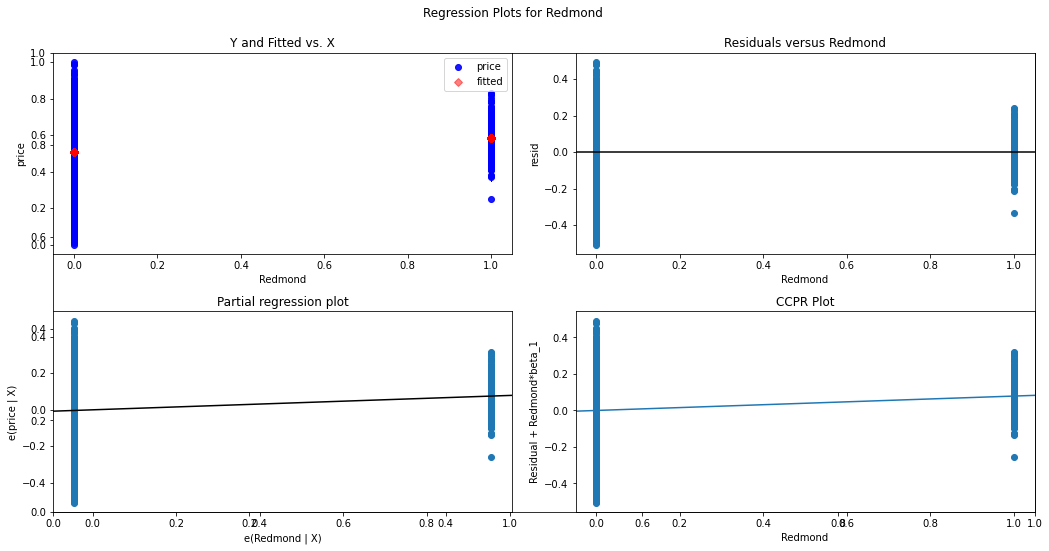

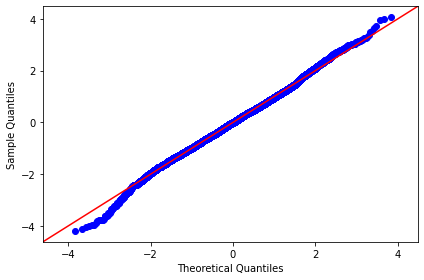

Medina normality tests
['Medina', 0.0138558143505505, 0.5106064522529352, 0.2859083580844367, 4.572149878544291e-51, 57.31979883329338]


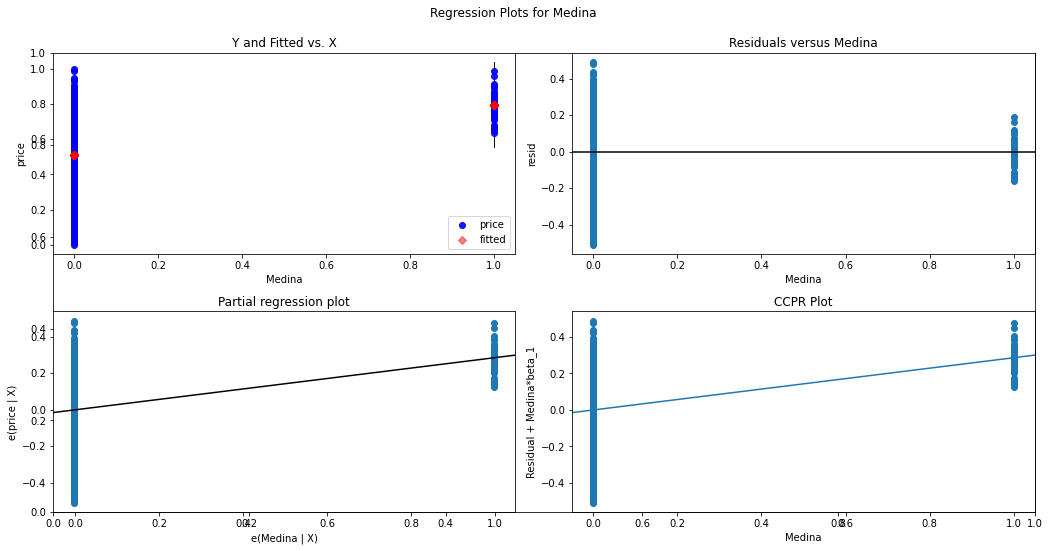

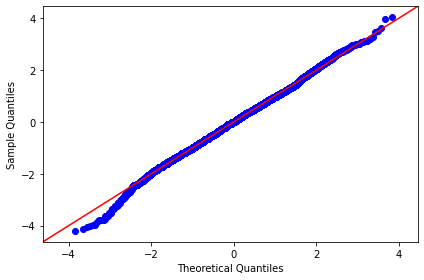

view normality tests
['view', 0.0958200753612084, 0.4989213133909391, 0.12744298885657473, 0.0, 84.10618214611037]


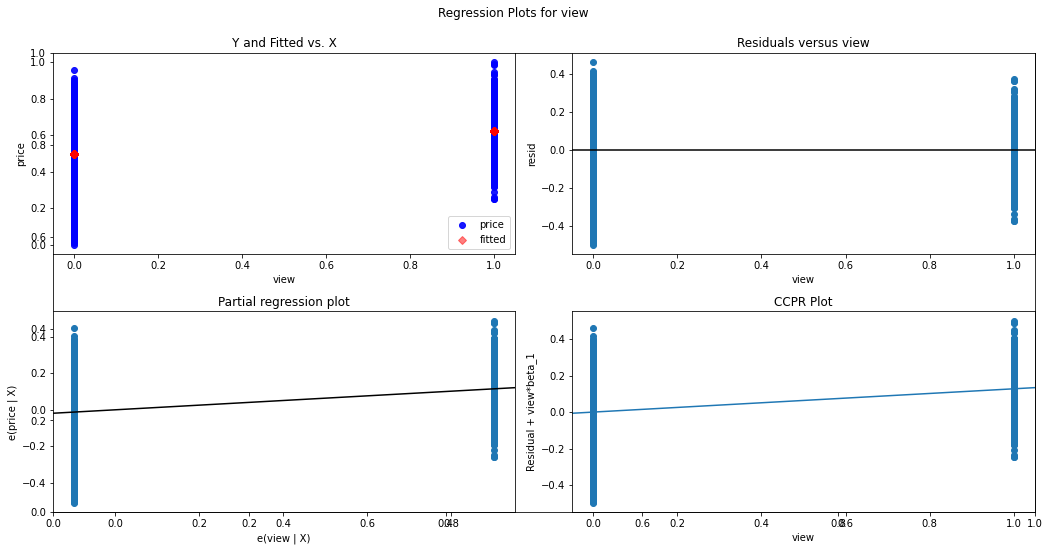

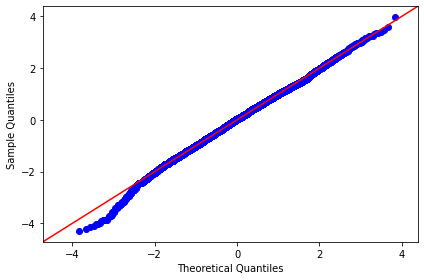

Kirkland normality tests
['Kirkland', 0.007836320062010516, 0.5090065501444786, 0.05256181177377879, 1.5207226381351175e-29, 63.79515575172649]


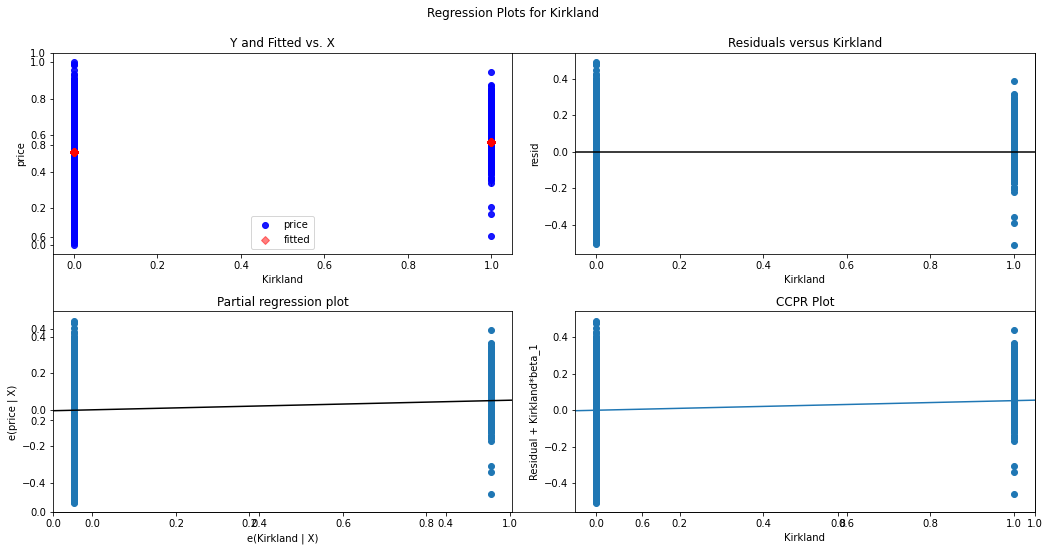

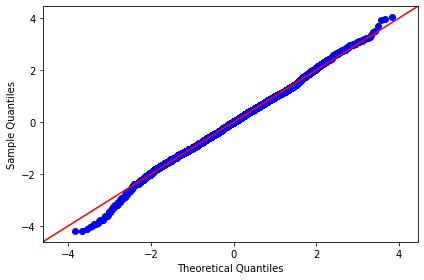

FallCity normality tests
['FallCity', 0.00020698446429023853, 0.5112249557393952, 0.029395865771552773, 0.06711730295291414, 62.916559969745215]


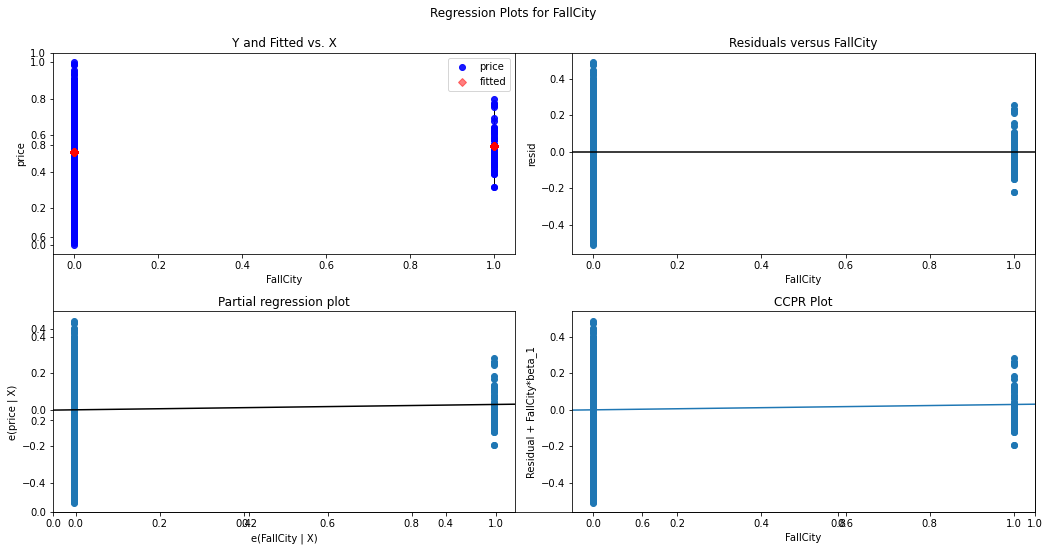

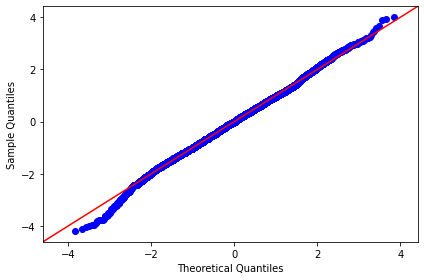

Seattle normality tests
['Seattle', 0.00022105418818507694, 0.5097968092048082, 0.003680928040452749, 0.058477859135567044, 65.47971136222847]


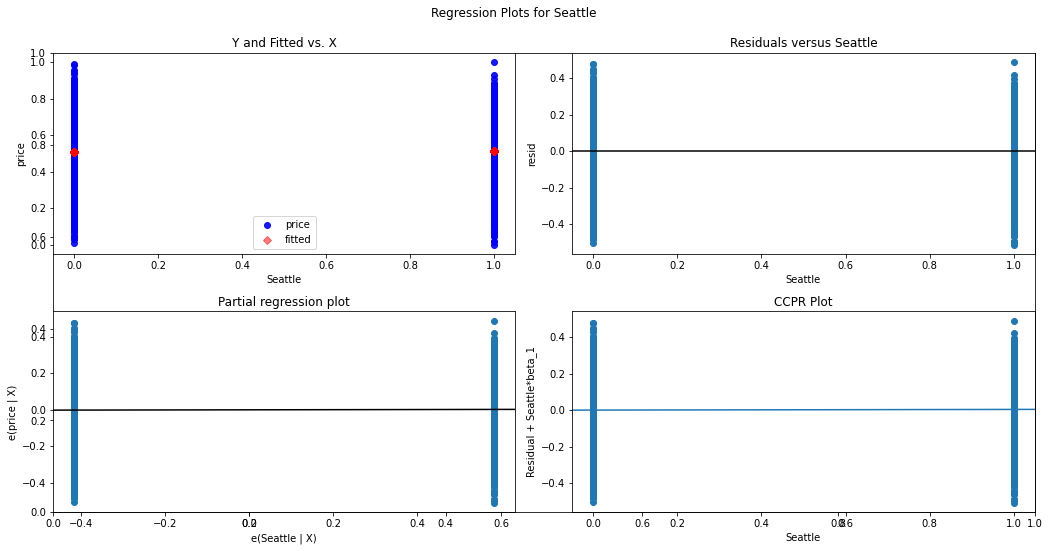

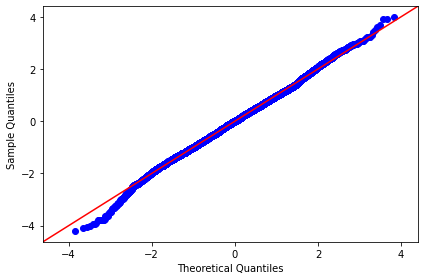

Issaquah normality tests
['Issaquah', 0.0060981783652126476, 0.5095584020144639, 0.05304337216958323, 2.458111255306886e-23, 74.97618402748434]


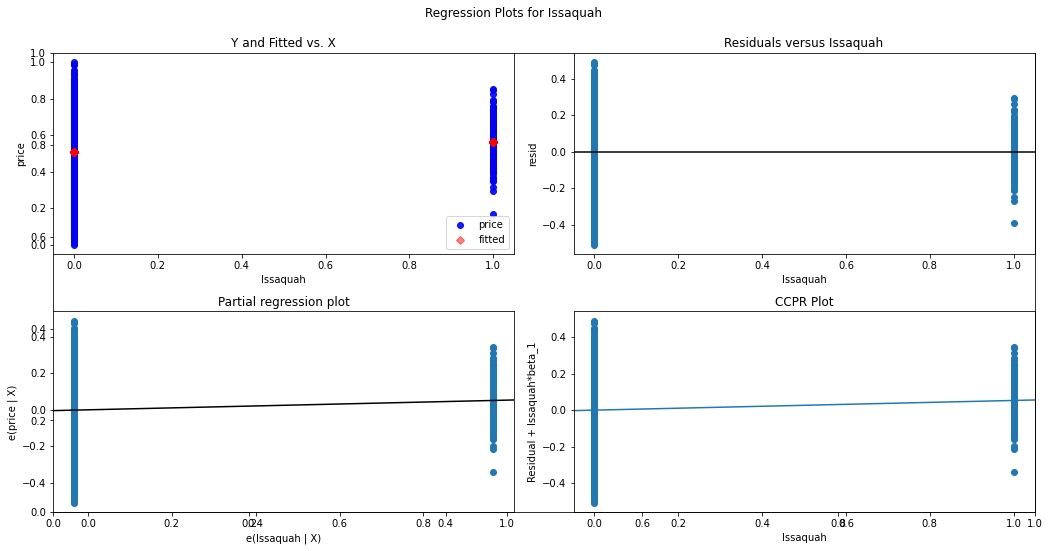

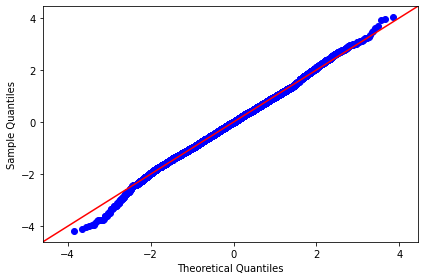

Woodinville normality tests
['Woodinville', 0.004197025978321278, 0.5101706124298737, 0.05507655265619921, 1.5481551367567305e-16, 69.55712498738377]


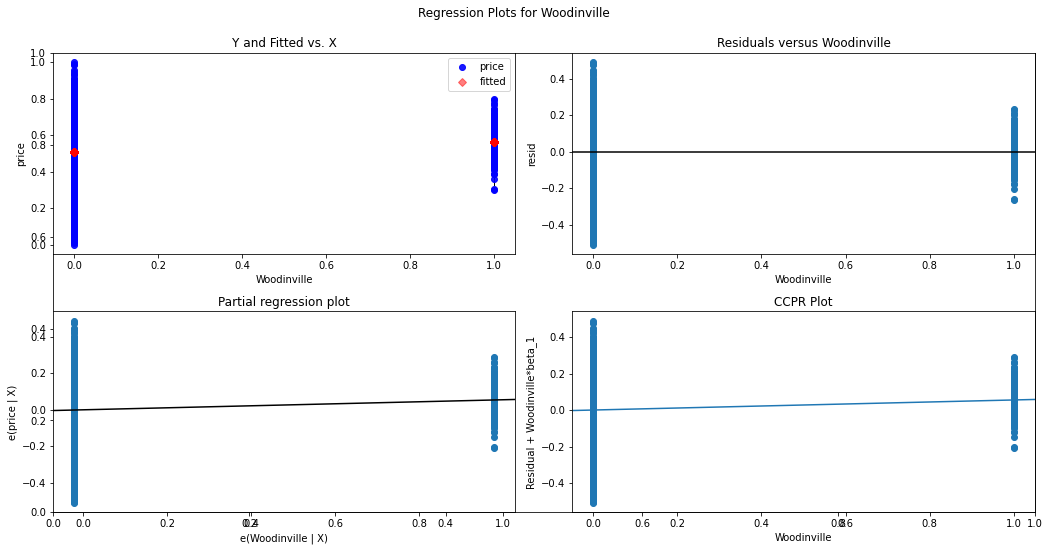

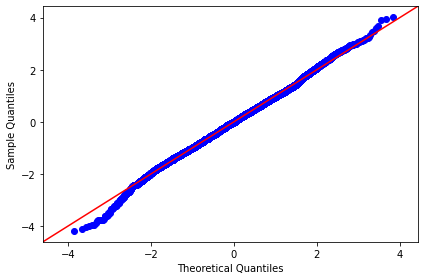

Bothell normality tests
['Bothell', 0.0001553921829846594, 0.5111831219179922, 0.01588333857464198, 0.1126576117268403, 63.544202156019416]


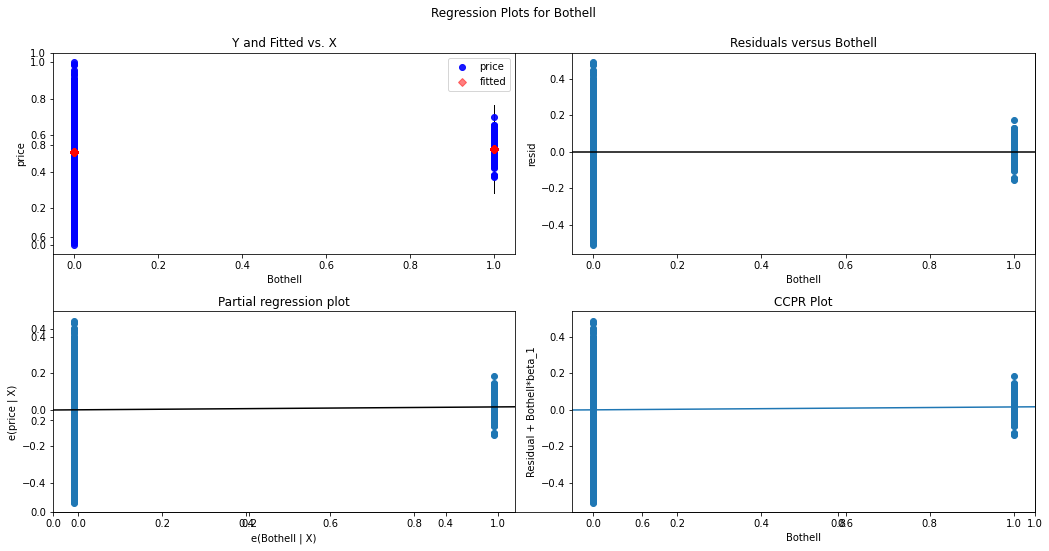

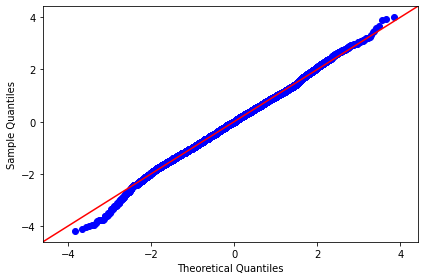

waterfront normality tests
['waterfront', 0.022257696659985227, 0.5098107267167378, 0.21973047737248141, 2.946869658392169e-81, 56.74256571535988]


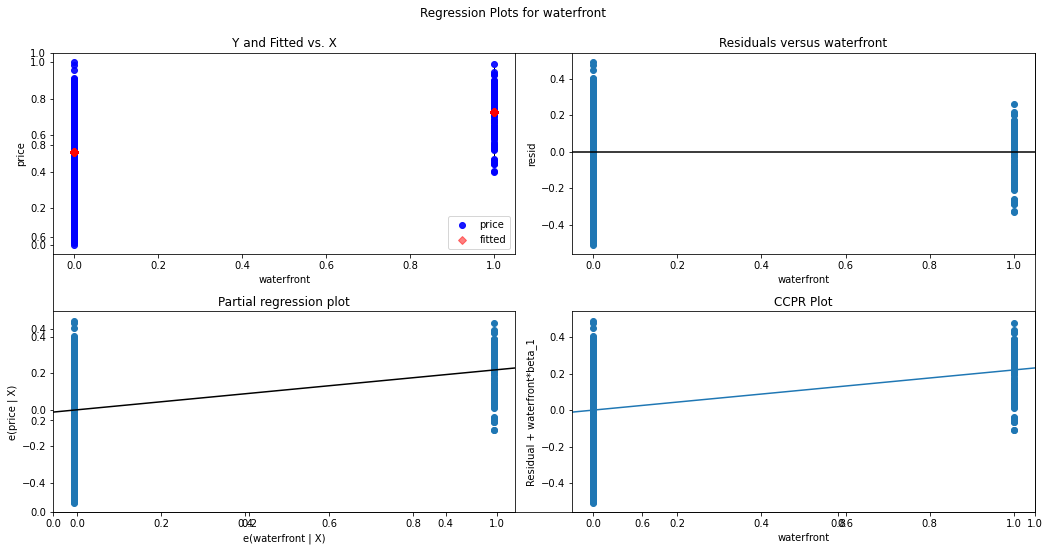

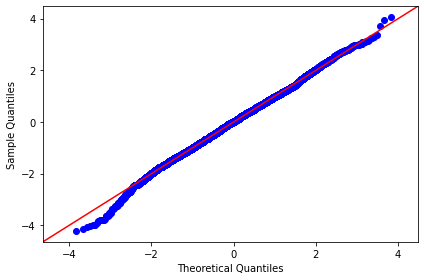

Snoqualmie normality tests
['Snoqualmie', 0.000512798454715746, 0.510990536835931, 0.022828252179470383, 0.003951145548453627, 64.40987737993213]


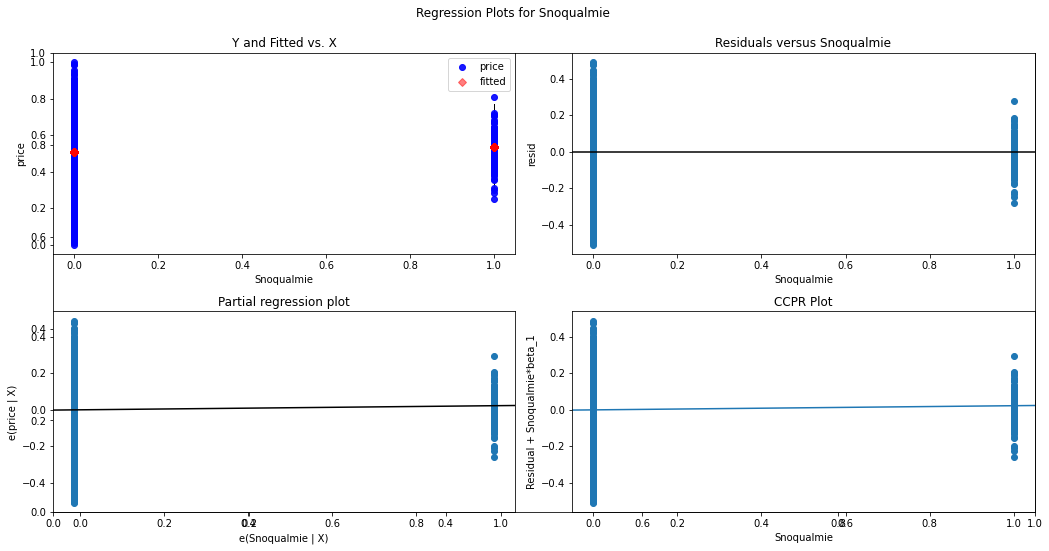

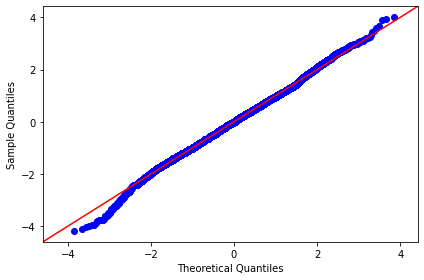

Vashon normality tests
['Vashon', 7.517519547750595e-06, 0.511354244175986, -0.004686690412859663, 0.727159865944657, 63.410714312318085]


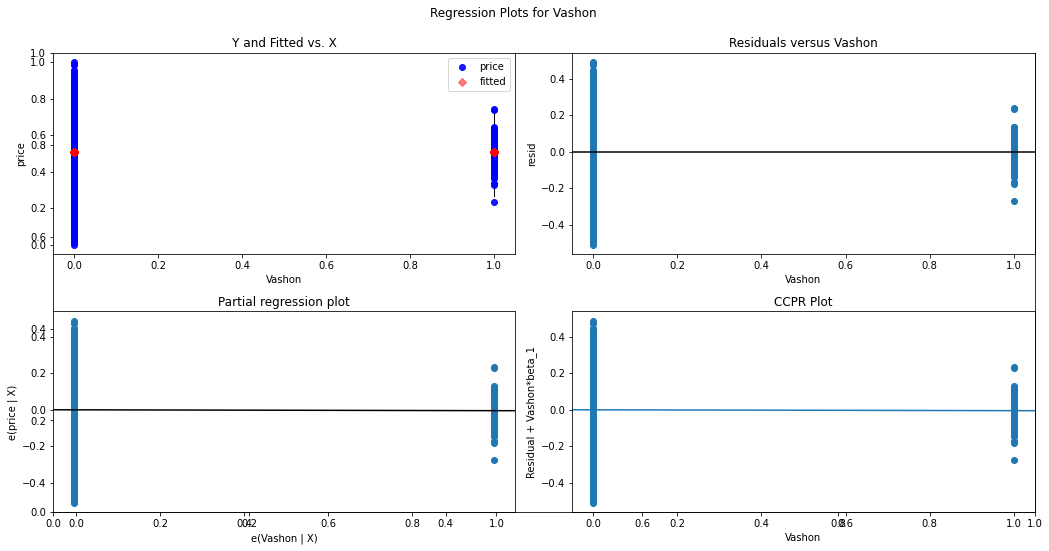

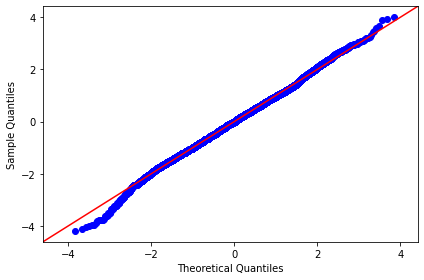

Kenmore normality tests
['Kenmore', 2.683389285995652e-06, 0.5113531969418024, -0.0017631957319038105, 0.8348736487408039, 63.42523056486061]


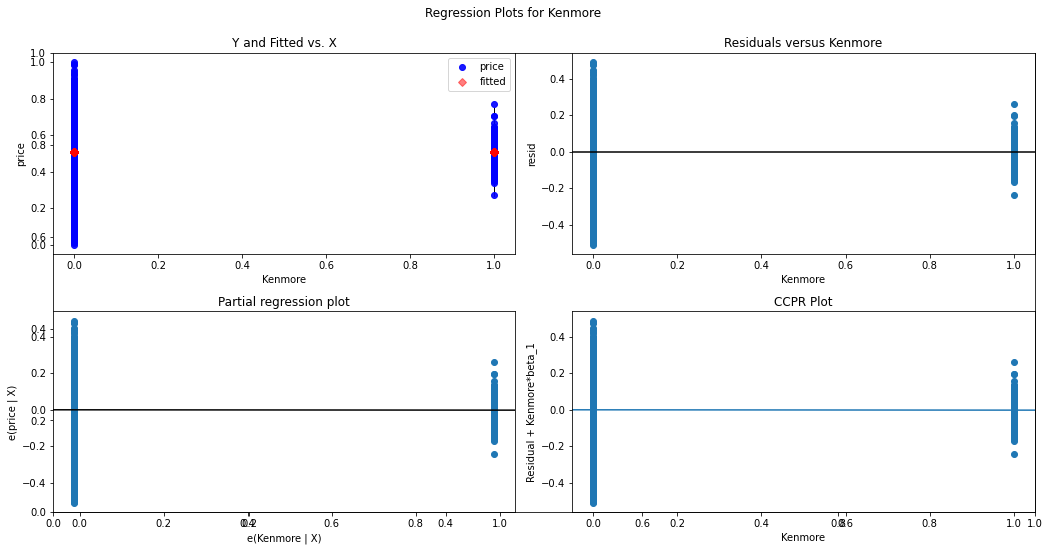

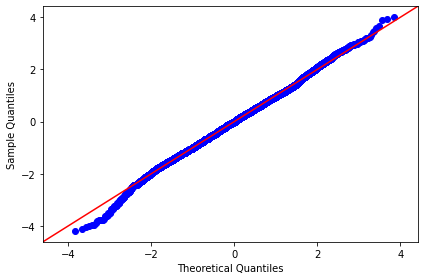

Kent normality tests
['Kent', 0.05084324734770218, 0.5180059355844818, -0.12013309928473875, 8.891097667288915e-186, 161.9432409651734]


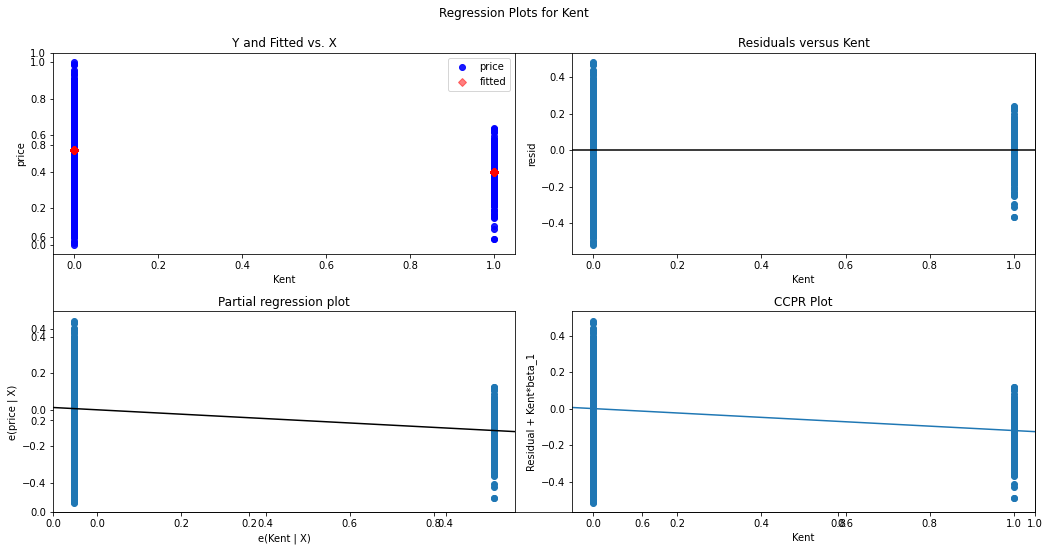

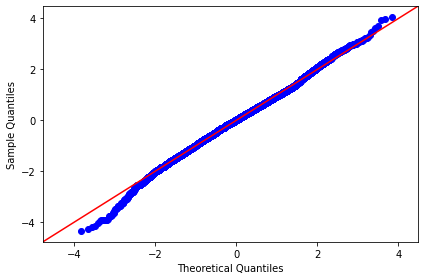

price
0     0.410812
1     0.457306
2     0.603235
3     0.795512
4     0.557010
...        ...
16191 0.326879
16192 0.544686
16193 0.643996
16194 0.484475
16195 0.673079

[16196 rows x 1 columns]

In [252]:
linearity_test(final_df)

In [255]:
orig_df = pd.concat([no_zip_df, place_df], axis=1)
orig_df = orig_df[final_full_list]
orig_df 

grade  sqft_living  Bellevue  MercerIsland  Sammamish  Redmond  Medina  \
0          7         1180         0             0          0        0       0   
1          7         2570         0             0          0        0       0   
2          6          770         0             0          0        0       0   
3          7         1960         0             0          0        0       0   
4          8         1680         0             0          1        0       0   
...      ...          ...       ...           ...        ...      ...     ...   
21590      8         1530         0             0          0        0       0   
21591      8         2310         0             0          0        0       0   
21592      7         1020         0             0          0        0       0   
21593      8         1600         0             0          0        0       0   
21594      7         1020         0             0          0        0       0   

          view  Kirkland  FallCity  Seattle  Issaquah  Woodinville  Bothell  \
0     0.000000         0         0        1         0            0        0   
1     0.000000         0         0        1         0            0        0   
2     0.000000         0         0        0         0            0        0   
3     0.000000         0         0        1         0            0        0   
4     0.000000         0         0        0         0            0        0   
...        ...       ...       ...      ...       ...          ...      ...   
21590 0.000000         0         0        1         0            0        0   
21591 0.000000         0         0        1         0            0        0   
21592 0.000000         0         0        1         0            0        0   
21593 0.000000         0         0        0         1            0        0   
21594 0.000000         0         0        1         0            0        0   

       waterfront  Snoqualmie  Vashon  Kenmore  Kent         price  
0        0.000000           0       0        0     0 221900.000000  
1        0.000000           0       0        0     0 538000.000000  
2        0.000000           0       0        1     0 180000.000000  
3        0.000000           0       0        0     0 604000.000000  
4        0.000000           0       0        0     0 510000.000000  
...           ...         ...     ...      ...   ...           ...  
21590    0.000000           0       0        0     0 360000.000000  
21591    0.000000           0       0        0     0 400000.000000  
21592    0.000000           0       0        0     0 402101.000000  
21593    0.000000           0       0        0     0 400000.000000  
21594    0.000000           0       0        0     0 325000.000000  

[21595 rows x 20 columns]

In [258]:
y_f = orig_df["price"]
x_f = orig_df.drop("price", axis=1)
x_trainf, x_testf, y_trainf, y_testf = train_test_split(x_f, y_f)

x_f_int = sm.add_constant(x_trainf)
    

predictors_intf = sm.add_constant(x_trainf)
modelf = sm.OLS(y_trainf, predictors_intf).fit()
    
predictors_testf = sm.add_constant(x_testf)
    
y_hat_trainf = modelf.predict(predictors_intf)
y_hat_testf = modelf.predict(predictors_testf)
    
regression = LinearRegression()
model_scoresf = cross_validate(
    estimator=regression,
    scoring=('r2','neg_mean_squared_error'),
    X=x_f,
    y=y_f,
    return_train_score=True,
    cv=5)
        
print("Train score:     ", model_scoresf["train_r2"].mean())
print("Validation score:", model_scoresf["test_r2"].mean())

train_msef = mean_squared_error(y_trainf, y_hat_trainf)
test_msef = mean_squared_error(y_testf, y_hat_testf)
print('Train Mean Squarred Error:', train_msef)
print('Test Mean Squarred Error:', test_msef)
    
r_sqf = np.mean(cross_val_score(regression, x_f, y_f, scoring='r2', cv=10))
print(f'cros_val r2 = {r_sqf}')
 

Train score:      0.7071203682638888
Validation score: 0.7039848037950606
Train Mean Squarred Error: 38801181154.279854
Test Mean Squarred Error: 42014434611.44896
cros_val r2 = 0.7041519004875733


In [259]:
modelf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     2044.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:55:56   Log-Likelihood:            -2.2042e+05
No. Observations:               16196   AIC:                         4.409e+05
Df Residuals:                   16176   BIC:                         4.410e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.039e+05   1.29e+04    -46.653      0.000   -6.29e+05   -5.78e+05
grade         7.903e+04   2111.348     37.429      0.000    7.49e+04    8.32e+04
sqft_living    176.9645      2.706     65.403      0.000     171.661     182.268
Bellevue      3.325e+05   7010.787     47.432      0.000    3.19e+05    3.46e+05
MercerIsland  4.816e+05   1.41e+04     34.093      0.000    4.54e+05    5.09e+05
Sammamish     1.237e+05   8901.250     13.898      0.000    1.06e+05    1.41e+05
Redmond        1.69e+05   8029.766     21.049      0.000    1.53e+05    1.85e+05
Medina        1.389e+06   3.52e+04     39.468      0.000    1.32e+06    1.46e+06
view          4.947e+04   2337.072     21.168      0.000    4.49e+04    5.41e+04
Kirkland      2.427e+05   8041.439     30.177      0.000    2.27e+05    2.58e+05
FallCity      1.555e+05   2.57e+04      6.056      0.000    1.05e+05    2.06e+05
Seattle       2.223e+05   4137.979     53.728      0.000    2.14e+05     2.3e+05
Issaquah      1.237e+05   9175.931     13.477      0.000    1.06e+05    1.42e+05
Woodinville   1.067e+05   1.11e+04      9.568      0.000    8.48e+04    1.29e+05
Bothell       8.097e+04   1.71e+04      4.735      0.000    4.75e+04    1.14e+05
waterfront    6.241e+05   2.09e+04     29.898      0.000    5.83e+05    6.65e+05
Snoqualmie     4.79e+04   1.36e+04      3.528      0.000    2.13e+04    7.45e+04
Vashon        2.858e+04   2.19e+04      1.305      0.192   -1.43e+04    7.15e+04
Kenmore       7.834e+04   1.39e+04      5.648      0.000    5.12e+04    1.06e+05
Kent         -2.451e+04   7366.039     -3.328      0.001    -3.9e+04   -1.01e+04
==============================================================================
Omnibus:                    14279.976   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1837678.321
Skew:                           3.702   Prob(JB):                         0.00
Kurtosis:                      54.656   Cond. No.                     5.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [262]:
big_list = list(modelf.params[1:])
f_list = list(orig_df.columns)
f_list.remove('price')

In [263]:
f_dict = dict(zip(f_list, big_list))
f_sl = sorted(f_dict.items(), key=lambda x:x[1], reverse=True)
f_sort = dict(f_sl)
print(f_sl)

[('Medina', 1388708.8358843229), ('waterfront', 624059.5715821616), ('MercerIsland', 481612.7741759775), ('Bellevue', 332532.4611406579), ('Kirkland', 242665.30078910835), ('Seattle', 222326.33744496317), ('Redmond', 169020.72309560134), ('FallCity', 155467.4726368231), ('Sammamish', 123705.64626150375), ('Issaquah', 123665.53037204196), ('Woodinville', 106663.8060973925), ('Bothell', 80974.92995124366), ('grade', 79025.40596224509), ('Kenmore', 78342.66706543062), ('view', 49471.88641031706), ('Snoqualmie', 47904.22086784778), ('Vashon', 28582.90433067801), ('sqft_living', 176.96453700878425), ('Kent', -24514.76060223991)]


In [264]:
print(modelf.params[0])

-603850.9308762186


In [270]:
-603850+222325+(1960*177)+(7*79025) 


518570

In [265]:
orig_df

grade  sqft_living  Bellevue  MercerIsland  Sammamish  Redmond  Medina  \
0          7         1180         0             0          0        0       0   
1          7         2570         0             0          0        0       0   
2          6          770         0             0          0        0       0   
3          7         1960         0             0          0        0       0   
4          8         1680         0             0          1        0       0   
...      ...          ...       ...           ...        ...      ...     ...   
21590      8         1530         0             0          0        0       0   
21591      8         2310         0             0          0        0       0   
21592      7         1020         0             0          0        0       0   
21593      8         1600         0             0          0        0       0   
21594      7         1020         0             0          0        0       0   

          view  Kirkland  FallCity  Seattle  Issaquah  Woodinville  Bothell  \
0     0.000000         0         0        1         0            0        0   
1     0.000000         0         0        1         0            0        0   
2     0.000000         0         0        0         0            0        0   
3     0.000000         0         0        1         0            0        0   
4     0.000000         0         0        0         0            0        0   
...        ...       ...       ...      ...       ...          ...      ...   
21590 0.000000         0         0        1         0            0        0   
21591 0.000000         0         0        1         0            0        0   
21592 0.000000         0         0        1         0            0        0   
21593 0.000000         0         0        0         1            0        0   
21594 0.000000         0         0        1         0            0        0   

       waterfront  Snoqualmie  Vashon  Kenmore  Kent         price  
0        0.000000           0       0        0     0 221900.000000  
1        0.000000           0       0        0     0 538000.000000  
2        0.000000           0       0        1     0 180000.000000  
3        0.000000           0       0        0     0 604000.000000  
4        0.000000           0       0        0     0 510000.000000  
...           ...         ...     ...      ...   ...           ...  
21590    0.000000           0       0        0     0 360000.000000  
21591    0.000000           0       0        0     0 400000.000000  
21592    0.000000           0       0        0     0 402101.000000  
21593    0.000000           0       0        0     0 400000.000000  
21594    0.000000           0       0        0     0 325000.000000  

[21595 rows x 20 columns]

# try cont zip

In [272]:
#try price per sqft of zipcode
zip_val_df = data_df.copy()

In [273]:
zip_val_df

id         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 221900.000000         3   1.000000         1180      5650   
1      6414100192 538000.000000         3   2.250000         2570      7242   
2      5631500400 180000.000000         2   1.000000          770     10000   
3      2487200875 604000.000000         4   3.000000         1960      5000   
4      1954400510 510000.000000         3   2.000000         1680      8080   
...           ...           ...       ...        ...          ...       ...   
21590   263000018 360000.000000         3   2.500000         1530      1131   
21591  6600060120 400000.000000         4   2.500000         2310      5813   
21592  1523300141 402101.000000         2   0.750000         1020      1350   
21593   291310100 400000.000000         3   2.500000         1600      2388   
21594  1523300157 325000.000000         2   0.750000         1020      1076   

        floors  waterfront     view  condition  grade  sqft_above  \
0     1.000000    0.000000 0.000000          3      7        1180   
1     2.000000    0.000000 0.000000          3      7        2170   
2     1.000000    0.000000 0.000000          3      6         770   
3     1.000000    0.000000 0.000000          5      7        1050   
4     1.000000    0.000000 0.000000          3      8        1680   
...        ...         ...      ...        ...    ...         ...   
21590 3.000000    0.000000 0.000000          3      8        1530   
21591 2.000000    0.000000 0.000000          3      8        2310   
21592 2.000000    0.000000 0.000000          3      7        1020   
21593 2.000000    0.000000 0.000000          3      8        1600   
21594 2.000000    0.000000 0.000000          3      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode       lat        long  \
0           0.000000      1955      0.000000    98178 47.511200 -122.257000   
1           1.000000      1951      1.000000    98125 47.721000 -122.319000   
2           0.000000      1933      0.000000    98028 47.737900 -122.233000   
3           1.000000      1965      0.000000    98136 47.520800 -122.393000   
4           0.000000      1987      0.000000    98074 47.616800 -122.045000   
...              ...       ...           ...      ...       ...         ...   
21590       0.000000      2009      0.000000    98103 47.699300 -122.346000   
21591       0.000000      2014      0.000000    98146 47.510700 -122.362000   
21592       0.000000      2009      0.000000    98144 47.594400 -122.299000   
21593       0.000000      2004      0.000000    98027 47.534500 -122.069000   
21594       0.000000      2008      0.000000    98144 47.594100 -122.299000   

       yr_built_binned  PlaceName  
0                    6    Seattle  
1                    6    Seattle  
2                    8    Kenmore  
3                    5    Seattle  
4                    3  Sammamish  
...                ...        ...  
21590                1    Seattle  
21591                0    Seattle  
21592                1    Seattle  
21593                1   Issaquah  
21594                1    Seattle  

[21595 rows x 20 columns]

In [275]:
zip_val_df.drop('PlaceName', axis=1, inplace=True)

In [293]:
zip_val_df

id         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 221900.000000         3   1.000000         1180      5650   
1      6414100192 538000.000000         3   2.250000         2570      7242   
2      5631500400 180000.000000         2   1.000000          770     10000   
3      2487200875 604000.000000         4   3.000000         1960      5000   
4      1954400510 510000.000000         3   2.000000         1680      8080   
...           ...           ...       ...        ...          ...       ...   
21590   263000018 360000.000000         3   2.500000         1530      1131   
21591  6600060120 400000.000000         4   2.500000         2310      5813   
21592  1523300141 402101.000000         2   0.750000         1020      1350   
21593   291310100 400000.000000         3   2.500000         1600      2388   
21594  1523300157 325000.000000         2   0.750000         1020      1076   

        floors  waterfront     view  condition  grade  sqft_above  \
0     1.000000    0.000000 0.000000          3      7        1180   
1     2.000000    0.000000 0.000000          3      7        2170   
2     1.000000    0.000000 0.000000          3      6         770   
3     1.000000    0.000000 0.000000          5      7        1050   
4     1.000000    0.000000 0.000000          3      8        1680   
...        ...         ...      ...        ...    ...         ...   
21590 3.000000    0.000000 0.000000          3      8        1530   
21591 2.000000    0.000000 0.000000          3      8        2310   
21592 2.000000    0.000000 0.000000          3      7        1020   
21593 2.000000    0.000000 0.000000          3      8        1600   
21594 2.000000    0.000000 0.000000          3      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode       lat        long  \
0           0.000000      1955      0.000000    98178 47.511200 -122.257000   
1           1.000000      1951      1.000000    98125 47.721000 -122.319000   
2           0.000000      1933      0.000000    98028 47.737900 -122.233000   
3           1.000000      1965      0.000000    98136 47.520800 -122.393000   
4           0.000000      1987      0.000000    98074 47.616800 -122.045000   
...              ...       ...           ...      ...       ...         ...   
21590       0.000000      2009      0.000000    98103 47.699300 -122.346000   
21591       0.000000      2014      0.000000    98146 47.510700 -122.362000   
21592       0.000000      2009      0.000000    98144 47.594400 -122.299000   
21593       0.000000      2004      0.000000    98027 47.534500 -122.069000   
21594       0.000000      2008      0.000000    98144 47.594100 -122.299000   

       yr_built_binned  
0                    6  
1                    6  
2                    8  
3                    5  
4                    3  
...                ...  
21590                1  
21591                0  
21592                1  
21593                1  
21594                1  

[21595 rows x 19 columns]

In [278]:
grouped = zip_val_df.groupby('zipcode').mean()
grouped

id          price  bedrooms  bathrooms  sqft_living  \
zipcode                                                                      
98001   4651273623.072022  281194.869806  3.393352   2.011773  1903.783934   
98002   4850894131.723619  234284.035176  3.326633   1.839196  1627.743719   
98003   4674181960.678572  294111.278571  3.357143   2.047321  1928.882143   
98004   4394237459.350158 1356523.990536  3.854890   2.527603  2909.022082   
98005   4961872170.541667  810289.696429  3.851190   2.424107  2656.803571   
...                   ...            ...       ...        ...          ...   
98177   3934998241.741177  676419.392157  3.396078   2.100000  2323.333333   
98178   4291467000.687023  310612.755725  3.305344   1.731870  1729.351145   
98188   4481850951.676471  289078.345588  3.433824   1.863971  1802.772059   
98198   5152291468.885715  302896.739286  3.182143   1.788393  1745.360714   
98199   3410034642.738170  792187.873817  3.211356   2.167981  2161.798107   

            sqft_lot   floors  waterfront     view  condition    grade  \
zipcode                                                                  
98001   14967.002770 1.430748    0.000000 0.094183   3.335180 7.296399   
98002    7517.633166 1.334171    0.000000 0.010050   3.743719 6.693467   
98003   10603.096429 1.310714    0.000000 0.214286   3.371429 7.542857   
98004   13104.220820 1.432177    0.003155 0.305994   3.495268 8.687697   
98005   19928.785714 1.279762    0.000000 0.095238   3.696429 8.488095   
...              ...      ...         ...      ...        ...      ...   
98177   11904.403922 1.276471    0.003922 0.811765   3.494118 7.976471   
98178    8309.122137 1.185115    0.034351 0.534351   3.320611 6.816794   
98188   10126.080882 1.227941    0.000000 0.147059   3.330882 7.036765   
98198   10525.978571 1.225000    0.032143 0.592857   3.442857 7.103571   
98199    5436.283912 1.468454    0.003155 0.552050   3.507886 8.012618   

         sqft_above  sqft_basement    yr_built  yr_renovated       lat  \
zipcode                                                                  
98001   1723.756233       0.240997 1980.867036      0.016620 47.309106   
98002   1522.537688       0.155779 1967.773869      0.030151 47.308780   
98003   1663.550000       0.350000 1976.885714      0.010714 47.315741   
98004   2419.842271       0.466877 1971.470032      0.145110 47.616183   
98005   2160.196429       0.511905 1969.744048      0.035714 47.611532   
...             ...            ...         ...           ...       ...   
98177   1836.713725       0.576471 1960.843137      0.090196 47.742381   
98178   1325.992366       0.484733 1955.232824      0.053435 47.499118   
98188   1492.154412       0.367647 1965.507353      0.029412 47.447310   
98198   1476.253571       0.350000 1966.735714      0.039286 47.390788   
98199   1591.924290       0.791798 1956.526814      0.119874 47.648098   

               long  yr_built_binned  
zipcode                               
98001   -122.270704         3.468144  
98002   -122.213357         4.824121  
98003   -122.310054         3.896429  
98004   -122.205189         4.394322  
98005   -122.167268         4.648810  
...             ...              ...  
98177   -122.369282         5.462745  
98178   -122.246969         5.996183  
98188   -122.280993         4.970588  
98198   -122.315743         4.907143  
98199   -122.398461         5.911672  

[70 rows x 18 columns]

In [281]:
grouped['zip_sqft'] = grouped['price'] / grouped['sqft_living']

In [282]:
grouped

id          price  bedrooms  bathrooms  sqft_living  \
zipcode                                                                      
98001   4651273623.072022  281194.869806  3.393352   2.011773  1903.783934   
98002   4850894131.723619  234284.035176  3.326633   1.839196  1627.743719   
98003   4674181960.678572  294111.278571  3.357143   2.047321  1928.882143   
98004   4394237459.350158 1356523.990536  3.854890   2.527603  2909.022082   
98005   4961872170.541667  810289.696429  3.851190   2.424107  2656.803571   
...                   ...            ...       ...        ...          ...   
98177   3934998241.741177  676419.392157  3.396078   2.100000  2323.333333   
98178   4291467000.687023  310612.755725  3.305344   1.731870  1729.351145   
98188   4481850951.676471  289078.345588  3.433824   1.863971  1802.772059   
98198   5152291468.885715  302896.739286  3.182143   1.788393  1745.360714   
98199   3410034642.738170  792187.873817  3.211356   2.167981  2161.798107   

            sqft_lot   floors  waterfront     view  condition    grade  \
zipcode                                                                  
98001   14967.002770 1.430748    0.000000 0.094183   3.335180 7.296399   
98002    7517.633166 1.334171    0.000000 0.010050   3.743719 6.693467   
98003   10603.096429 1.310714    0.000000 0.214286   3.371429 7.542857   
98004   13104.220820 1.432177    0.003155 0.305994   3.495268 8.687697   
98005   19928.785714 1.279762    0.000000 0.095238   3.696429 8.488095   
...              ...      ...         ...      ...        ...      ...   
98177   11904.403922 1.276471    0.003922 0.811765   3.494118 7.976471   
98178    8309.122137 1.185115    0.034351 0.534351   3.320611 6.816794   
98188   10126.080882 1.227941    0.000000 0.147059   3.330882 7.036765   
98198   10525.978571 1.225000    0.032143 0.592857   3.442857 7.103571   
98199    5436.283912 1.468454    0.003155 0.552050   3.507886 8.012618   

         sqft_above  sqft_basement    yr_built  yr_renovated       lat  \
zipcode                                                                  
98001   1723.756233       0.240997 1980.867036      0.016620 47.309106   
98002   1522.537688       0.155779 1967.773869      0.030151 47.308780   
98003   1663.550000       0.350000 1976.885714      0.010714 47.315741   
98004   2419.842271       0.466877 1971.470032      0.145110 47.616183   
98005   2160.196429       0.511905 1969.744048      0.035714 47.611532   
...             ...            ...         ...           ...       ...   
98177   1836.713725       0.576471 1960.843137      0.090196 47.742381   
98178   1325.992366       0.484733 1955.232824      0.053435 47.499118   
98188   1492.154412       0.367647 1965.507353      0.029412 47.447310   
98198   1476.253571       0.350000 1966.735714      0.039286 47.390788   
98199   1591.924290       0.791798 1956.526814      0.119874 47.648098   

               long  yr_built_binned   zip_sqft  
zipcode                                          
98001   -122.270704         3.468144 147.703143  
98002   -122.213357         4.824121 143.931770  
98003   -122.310054         3.896429 152.477579  
98004   -122.205189         4.394322 466.316154  
98005   -122.167268         4.648810 304.986678  
...             ...              ...        ...  
98177   -122.369282         5.462745 291.141776  
98178   -122.246969         5.996183 179.612311  
98188   -122.280993         4.970588 160.352133  
98198   -122.315743         4.907143 173.543919  
98199   -122.398461         5.911672 366.448593  

[70 rows x 19 columns]

In [283]:
grouped.reset_index(inplace=True)

In [287]:
grouped=grouped[['zipcode', 'zip_sqft']]
grouped

zipcode   zip_sqft
0     98001 147.703143
1     98002 143.931770
2     98003 152.477579
3     98004 466.316154
4     98005 304.986678
..      ...        ...
65    98177 291.141776
66    98178 179.612311
67    98188 160.352133
68    98198 173.543919
69    98199 366.448593

[70 rows x 2 columns]

In [290]:
zip_price ={}
for index, row in grouped.iterrows():
    zip_price[int(row['zipcode'])] = round(row['zip_sqft'],1)
zip_price

{98001: 147.7,
 98002: 143.9,
 98003: 152.5,
 98004: 466.3,
 98005: 305.0,
 98006: 297.7,
 98007: 282.9,
 98008: 302.6,
 98010: 198.2,
 98011: 217.6,
 98014: 215.1,
 98019: 195.6,
 98022: 171.3,
 98023: 144.1,
 98024: 248.0,
 98027: 245.4,
 98028: 217.9,
 98029: 268.2,
 98030: 150.9,
 98031: 155.6,
 98032: 144.6,
 98033: 337.6,
 98034: 263.7,
 98038: 170.9,
 98039: 568.6,
 98040: 384.6,
 98042: 157.2,
 98045: 212.6,
 98052: 273.0,
 98053: 258.5,
 98055: 170.5,
 98056: 208.7,
 98058: 172.5,
 98059: 205.4,
 98065: 205.4,
 98070: 258.5,
 98072: 240.4,
 98074: 259.1,
 98075: 262.1,
 98077: 239.0,
 98092: 152.5,
 98102: 418.2,
 98103: 354.3,
 98105: 401.4,
 98106: 214.8,
 98107: 366.6,
 98108: 208.7,
 98109: 428.3,
 98112: 438.7,
 98115: 337.8,
 98116: 333.8,
 98117: 340.9,
 98118: 247.5,
 98119: 423.7,
 98122: 355.5,
 98125: 269.1,
 98126: 275.2,
 98133: 239.7,
 98136: 319.5,
 98144: 311.0,
 98146: 221.7,
 98148: 176.9,
 98155: 237.2,
 98166: 224.5,
 98168: 163.6,
 98177: 291.1,
 98178: 17

In [296]:
for index, row in zip_val_df.iterrows():
    zipcode = row['zipcode']
    zip_val_df.loc[index, 'zip_sqft'] = zip_price[zipcode]

zip_val_df

id         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 221900.000000         3   1.000000         1180      5650   
1      6414100192 538000.000000         3   2.250000         2570      7242   
2      5631500400 180000.000000         2   1.000000          770     10000   
3      2487200875 604000.000000         4   3.000000         1960      5000   
4      1954400510 510000.000000         3   2.000000         1680      8080   
...           ...           ...       ...        ...          ...       ...   
21590   263000018 360000.000000         3   2.500000         1530      1131   
21591  6600060120 400000.000000         4   2.500000         2310      5813   
21592  1523300141 402101.000000         2   0.750000         1020      1350   
21593   291310100 400000.000000         3   2.500000         1600      2388   
21594  1523300157 325000.000000         2   0.750000         1020      1076   

        floors  waterfront     view  condition  grade  sqft_above  \
0     1.000000    0.000000 0.000000          3      7        1180   
1     2.000000    0.000000 0.000000          3      7        2170   
2     1.000000    0.000000 0.000000          3      6         770   
3     1.000000    0.000000 0.000000          5      7        1050   
4     1.000000    0.000000 0.000000          3      8        1680   
...        ...         ...      ...        ...    ...         ...   
21590 3.000000    0.000000 0.000000          3      8        1530   
21591 2.000000    0.000000 0.000000          3      8        2310   
21592 2.000000    0.000000 0.000000          3      7        1020   
21593 2.000000    0.000000 0.000000          3      8        1600   
21594 2.000000    0.000000 0.000000          3      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode       lat        long  \
0           0.000000      1955      0.000000    98178 47.511200 -122.257000   
1           1.000000      1951      1.000000    98125 47.721000 -122.319000   
2           0.000000      1933      0.000000    98028 47.737900 -122.233000   
3           1.000000      1965      0.000000    98136 47.520800 -122.393000   
4           0.000000      1987      0.000000    98074 47.616800 -122.045000   
...              ...       ...           ...      ...       ...         ...   
21590       0.000000      2009      0.000000    98103 47.699300 -122.346000   
21591       0.000000      2014      0.000000    98146 47.510700 -122.362000   
21592       0.000000      2009      0.000000    98144 47.594400 -122.299000   
21593       0.000000      2004      0.000000    98027 47.534500 -122.069000   
21594       0.000000      2008      0.000000    98144 47.594100 -122.299000   

       yr_built_binned   zip_sqft  
0                    6 179.600000  
1                    6 269.100000  
2                    8 217.900000  
3                    5 319.500000  
4                    3 259.100000  
...                ...        ...  
21590                1 354.300000  
21591                0 221.700000  
21592                1 311.000000  
21593                1 245.400000  
21594                1 311.000000  

[21595 rows x 20 columns]

In [299]:
cont_list_z = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'zip_sqft', 'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'yr_renovated']
cat_list_z = ['waterfront', 'sqft_basement']

before transform = 2.654193497969604
afer log transform = 0.9638044921634424
afer root transform = 7.301588549211669
afer boxcox transform = 0.6889636726325513
best method = boxcox, see histograms below


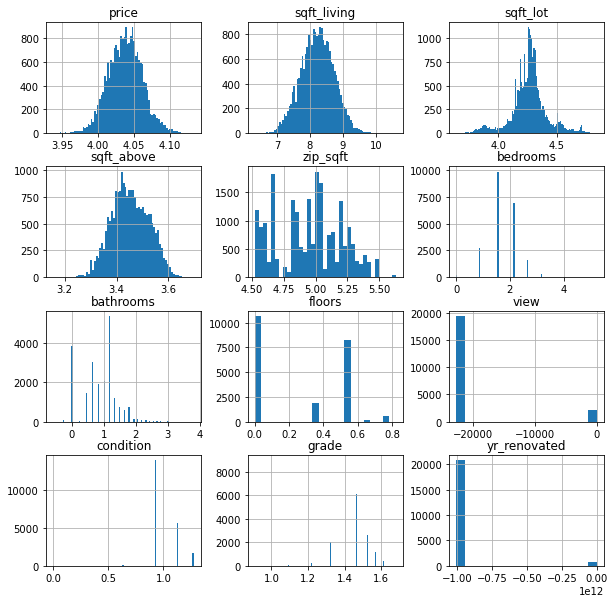

In [300]:
continuous_z = deskew(zip_val_df, cont_list_z)

In [301]:
cat_df_z= zip_val_df[cat_list_z]

In [302]:
continuous_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21595 entries, 0 to 21594
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21595 non-null  float64
 1   sqft_living   21595 non-null  float64
 2   sqft_lot      21595 non-null  float64
 3   sqft_above    21595 non-null  float64
 4   zip_sqft      21595 non-null  float64
 5   bedrooms      21595 non-null  float64
 6   bathrooms     21595 non-null  float64
 7   floors        21595 non-null  float64
 8   view          21595 non-null  float64
 9   condition     21595 non-null  float64
 10  grade         21595 non-null  float64
 11  yr_renovated  21595 non-null  float64
dtypes: float64(12)
memory usage: 2.0 MB


In [303]:
cat_df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21595 entries, 0 to 21594
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   waterfront     21595 non-null  float64
 1   sqft_basement  21595 non-null  float64
dtypes: float64(2)
memory usage: 337.5 KB


In [352]:
preprocessed_z = pd.concat([continuous_z, cat_df_z], axis=1)

In [353]:
model_z = make_ols_model(preprocessed_z, cv=True)

Train score:      0.8595019574041489
Validation score: 0.8581618734353296
Train Mean Squarred Error: 0.002079799650789684
Test Mean Squarred Error: 0.0020856468687876243
cros_val r2 = 0.8576131056497298


In [354]:
model_z.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     7672.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:00:08   Log-Likelihood:                 27028.
No. Observations:               16196   AIC:                        -5.403e+04
Df Residuals:                   16182   BIC:                        -5.392e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1087      0.005    -23.090      0.000      -0.118      -0.100
sqft_living       0.3185      0.013     25.476      0.000       0.294       0.343
sqft_lot          0.1029      0.004     27.085      0.000       0.095       0.110
sqft_above        0.0919      0.011      8.444      0.000       0.071       0.113
zip_sqft          0.3163      0.002    179.789      0.000       0.313       0.320
bedrooms         -0.0414      0.004     -9.558      0.000      -0.050      -0.033
bathrooms         0.0539      0.005     10.823      0.000       0.044       0.064
floors            0.0051      0.002      2.945      0.003       0.002       0.008
view              0.0281      0.001     21.551      0.000       0.026       0.031
condition         0.0728      0.004     19.198      0.000       0.065       0.080
grade             0.2691      0.006     41.831      0.000       0.257       0.282
yr_renovated      0.0096      0.002      4.817      0.000       0.006       0.014
waterfront        0.1014      0.004     22.681      0.000       0.093       0.110
sqft_basement     0.0005      0.001      0.366      0.714      -0.002       0.003
==============================================================================
Omnibus:                     2125.723   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9495.481
Skew:                          -0.577   Prob(JB):                         0.00
Kurtosis:                       6.569   Cond. No.                         84.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [355]:
preprocessed_z= preprocessed_z.rename(columns={'sqft_basement': 'basement'})

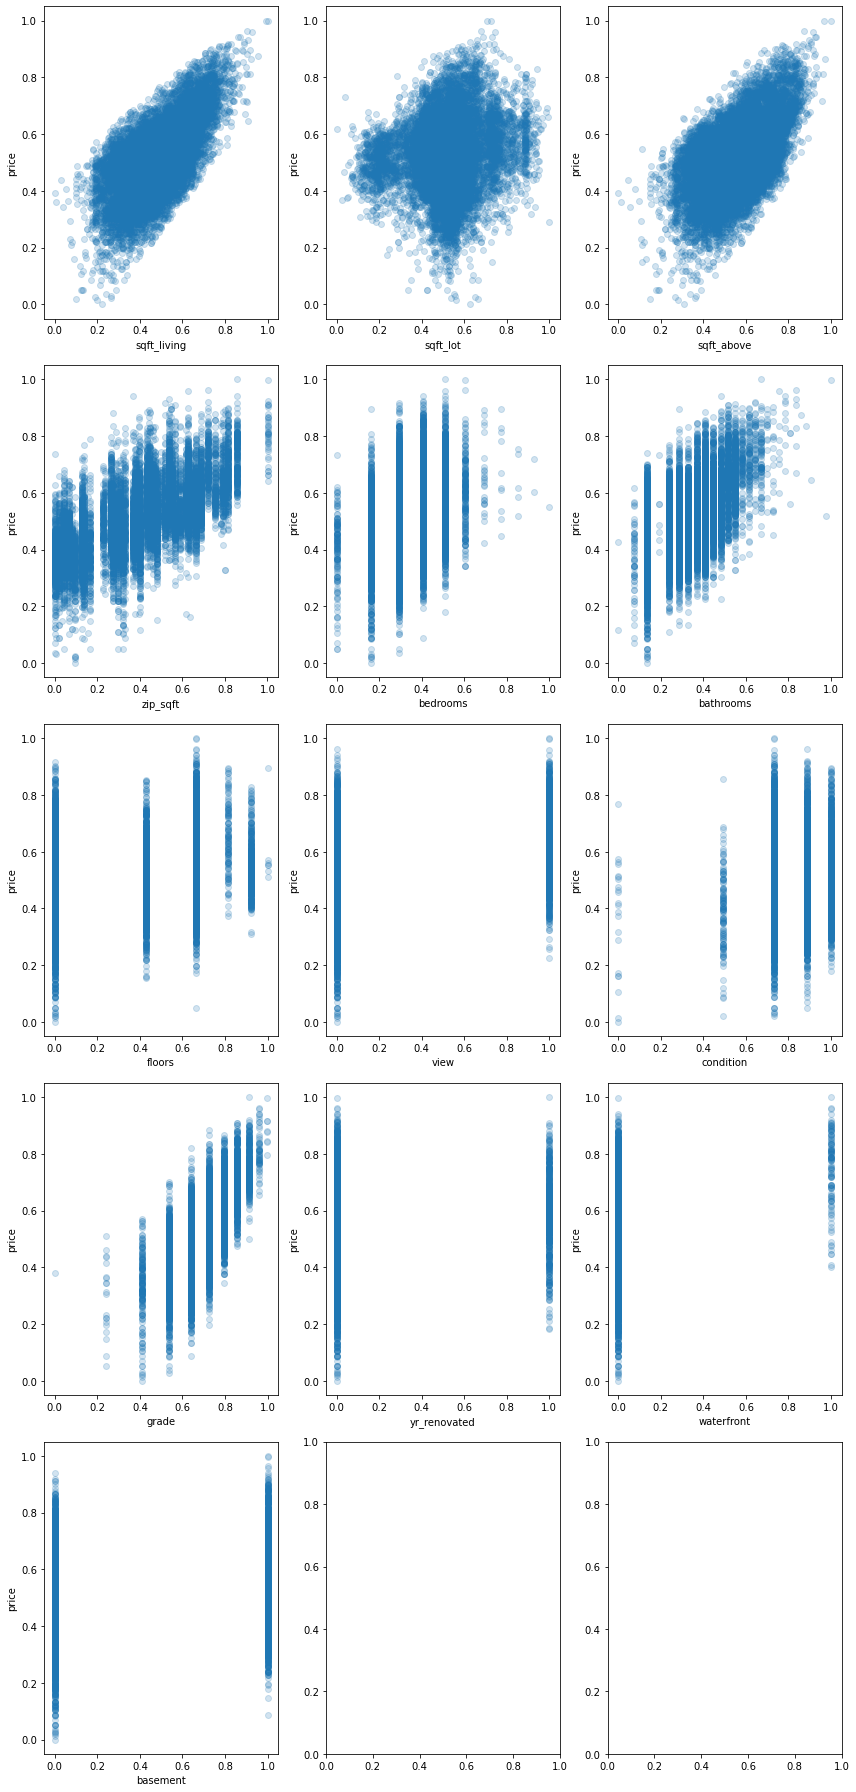

In [356]:
scatterplot(preprocessed_z)

price normality tests
['price', 1.0, 2.706168622523819e-16, 0.9999999999999999, 0.0, 2629.297369425264]


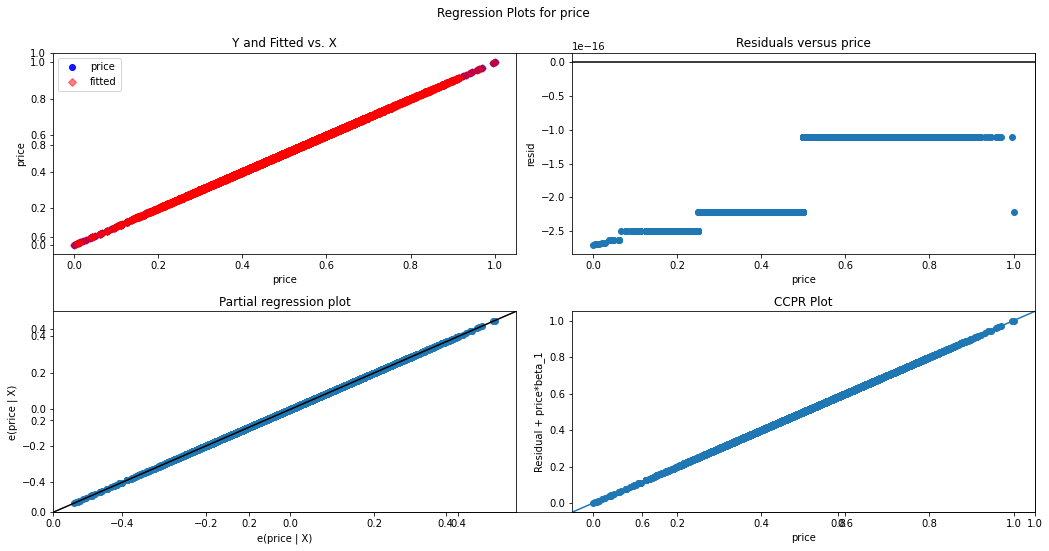

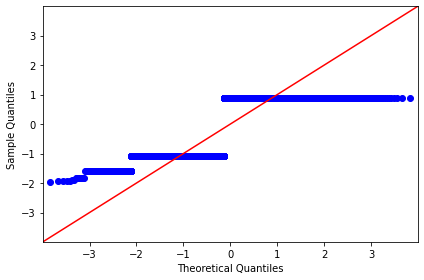

sqft_living normality tests
['sqft_living', 0.4489341030603812, 0.20874748546766614, 0.6968425595438879, 0.0, 114.01661407137934]


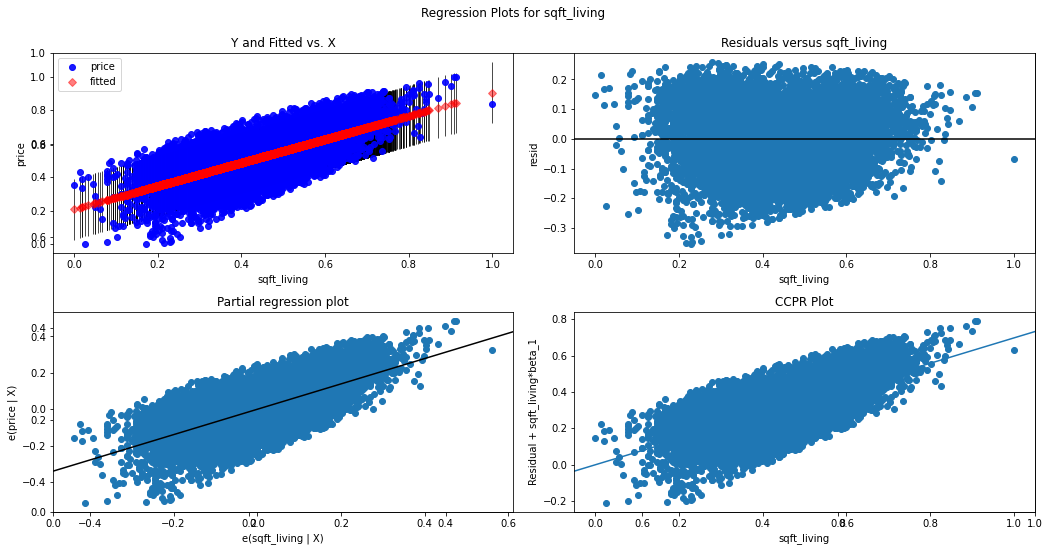

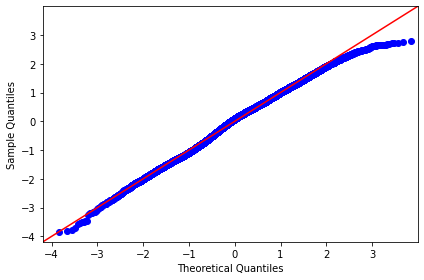

sqft_lot normality tests
['sqft_lot', 0.013338893920241679, 0.456081649066733, 0.11142236049128892, 3.244158328181916e-49, 58.007684600419424]


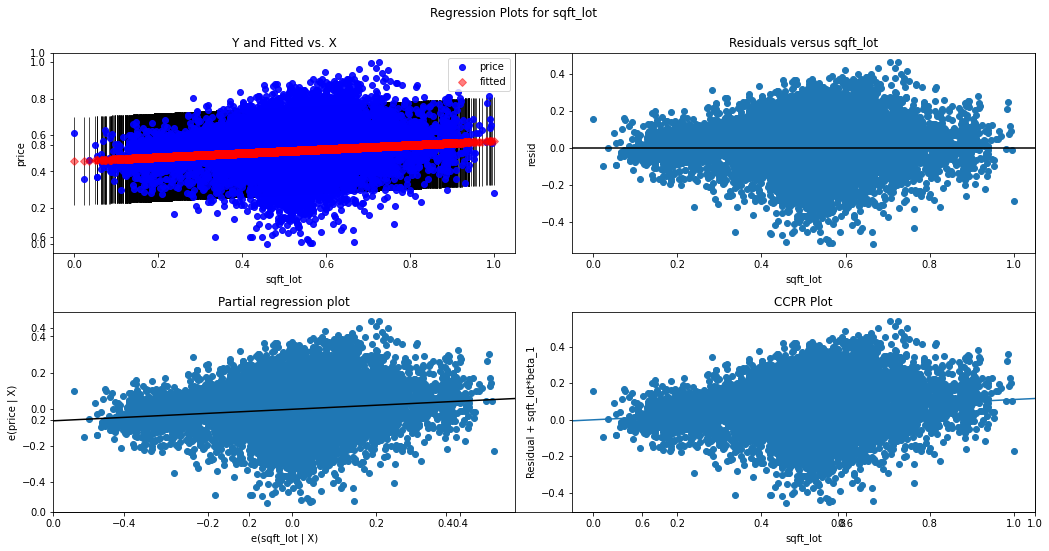

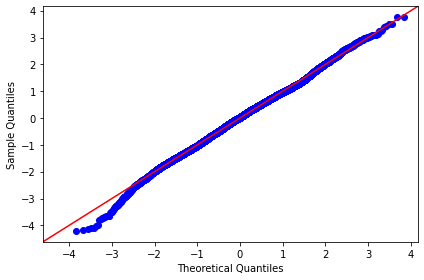

sqft_above normality tests
['sqft_above', 0.3296872092343588, 0.23118009012038807, 0.5265716255269375, 0.0, 90.48359835610044]


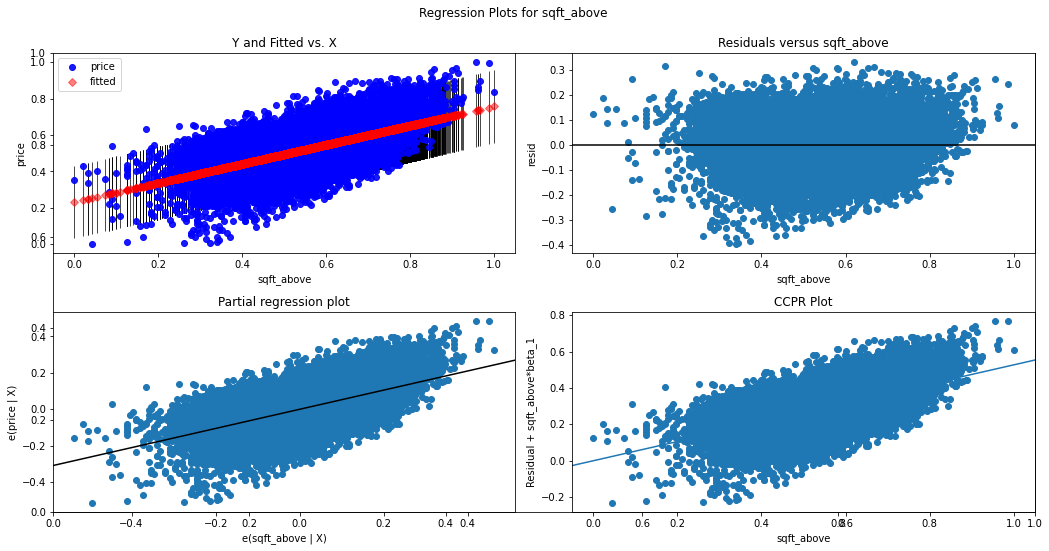

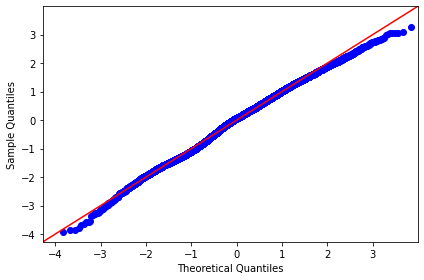

zip_sqft normality tests
['zip_sqft', 0.42149286300761524, 0.3764247582999587, 0.3519069934057054, 0.0, 531.0374451896563]


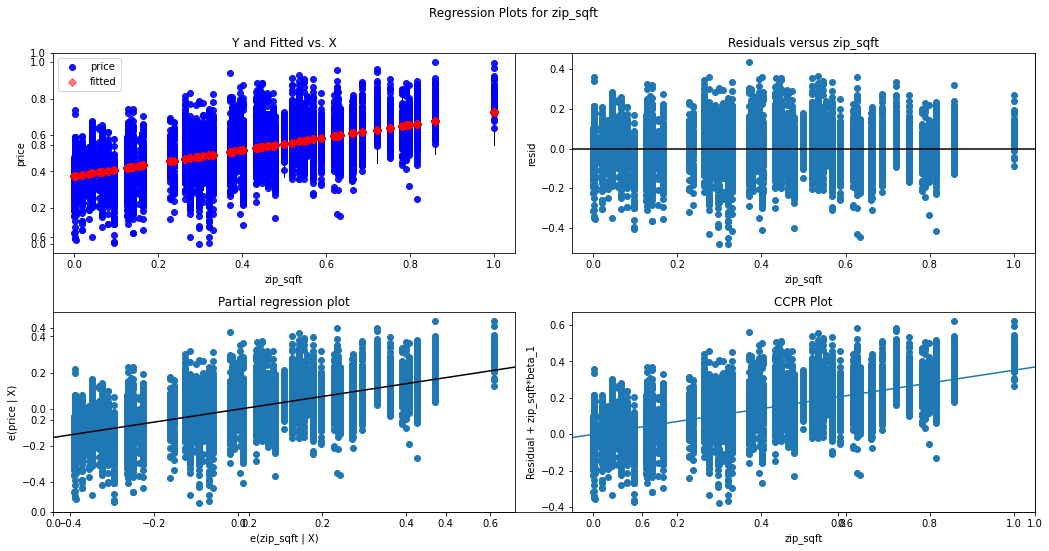

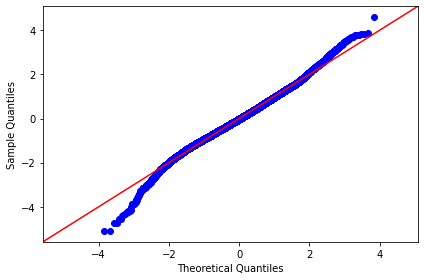

bedrooms normality tests
['bedrooms', 0.12210389103982655, 0.3765508328884445, 0.41346682934016094, 0.0, 15.120097160058506]


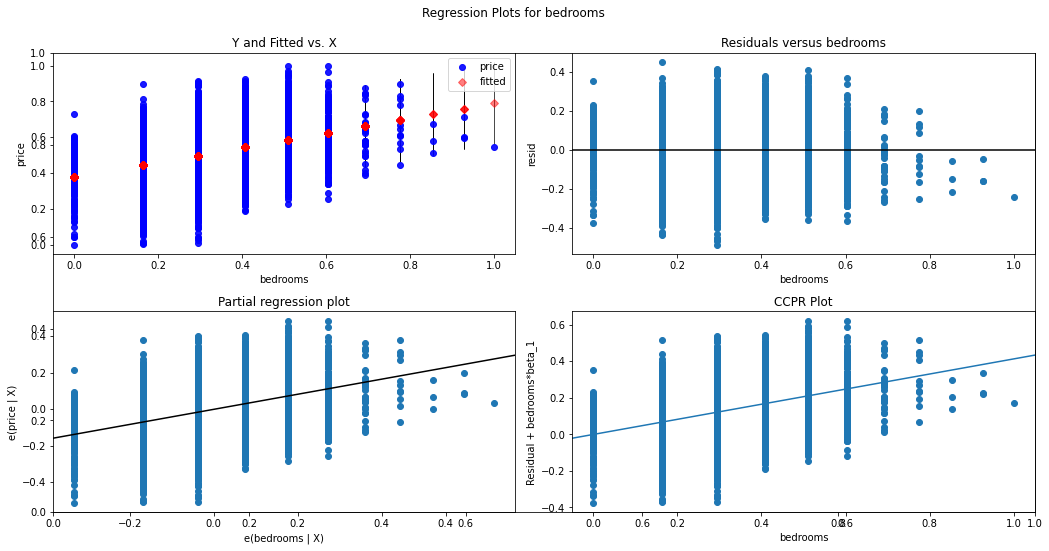

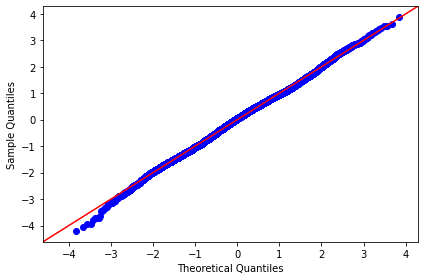

bathrooms normality tests
['bathrooms', 0.29018814528886716, 0.33762599022855366, 0.5324498717796108, 0.0, 28.07671172768472]


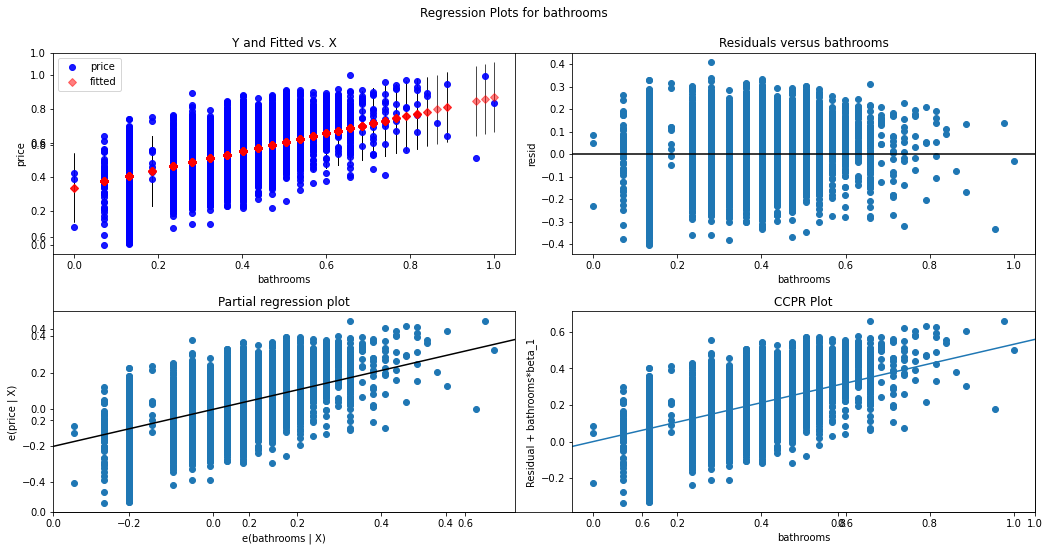

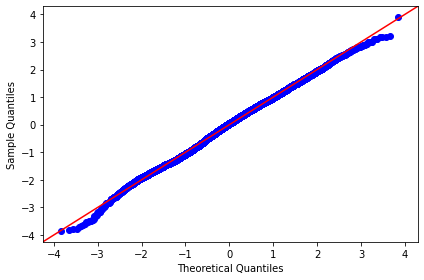

floors normality tests
['floors', 0.11219416210706012, 0.47312295352960676, 0.12590140495003388, 0.0, 30.295815475851107]


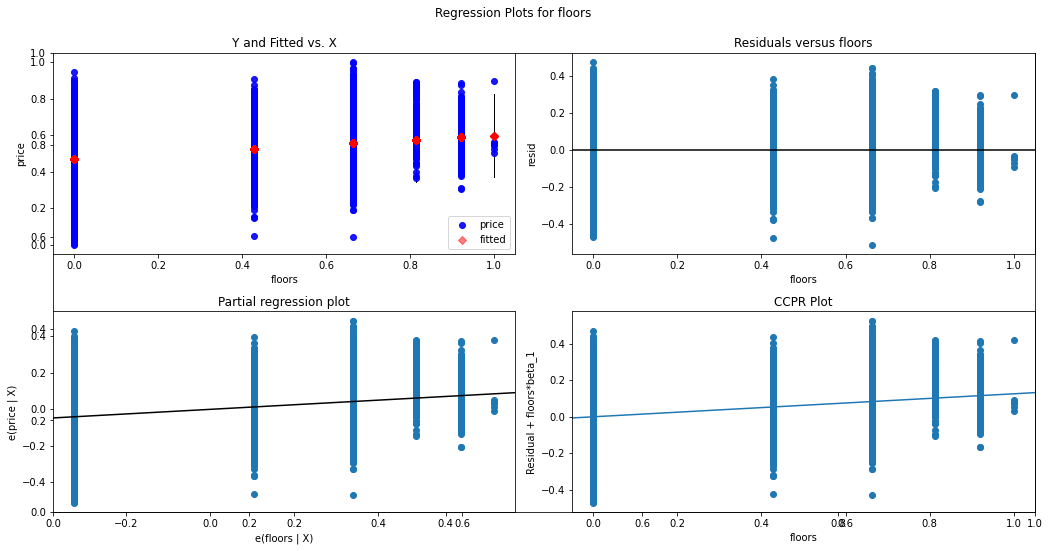

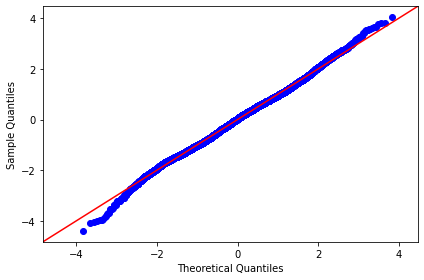

view normality tests
['view', 0.09665982540055351, 0.5011616321439776, 0.12978061799112922, 0.0, 79.26323571978108]


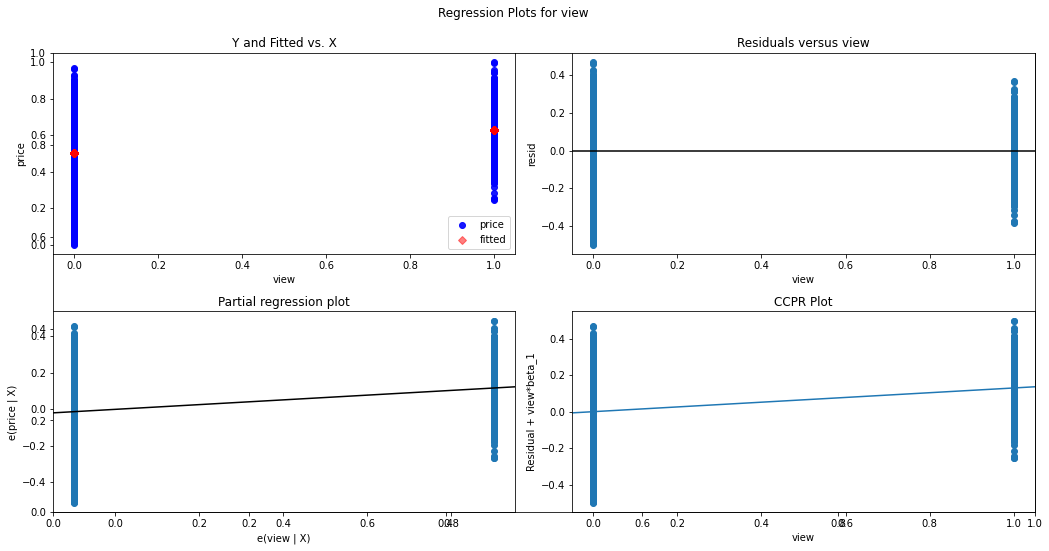

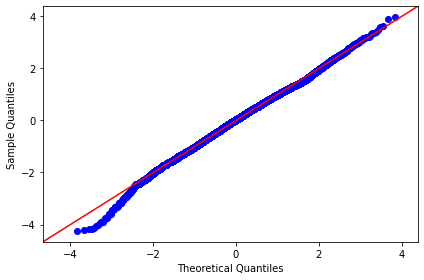

condition normality tests
['condition', 0.0012944411774307163, 0.4777182064149794, 0.04558028434437539, 4.652887012105713e-06, 49.448269373284745]


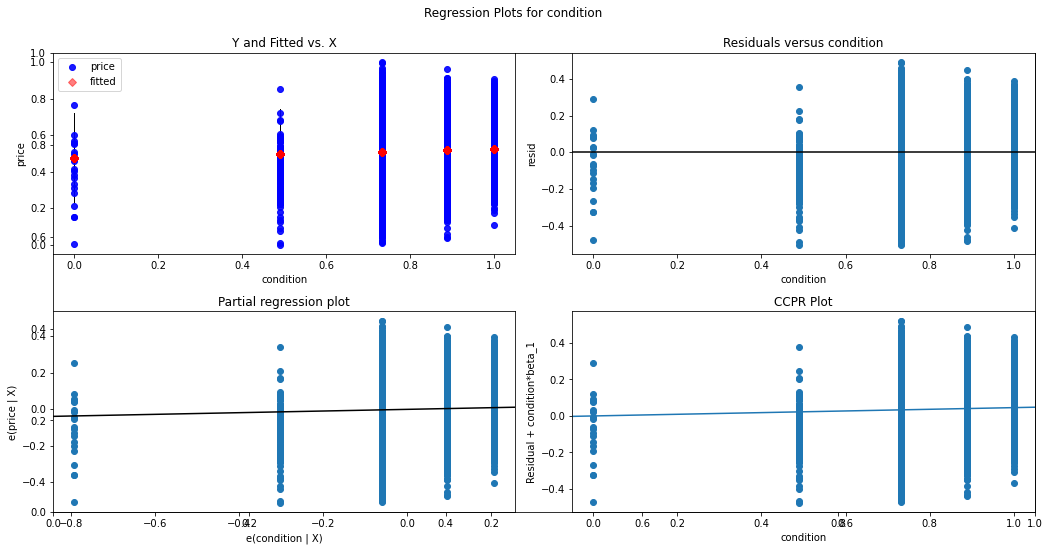

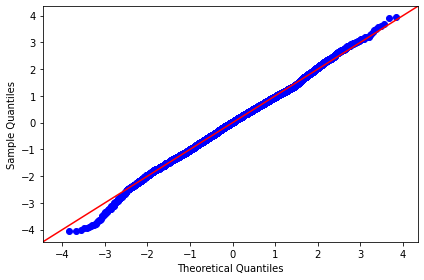

grade normality tests
['grade', 0.4645329272482428, -0.10872202173731131, 0.9038283067753082, 0.0, 58.22459651306241]


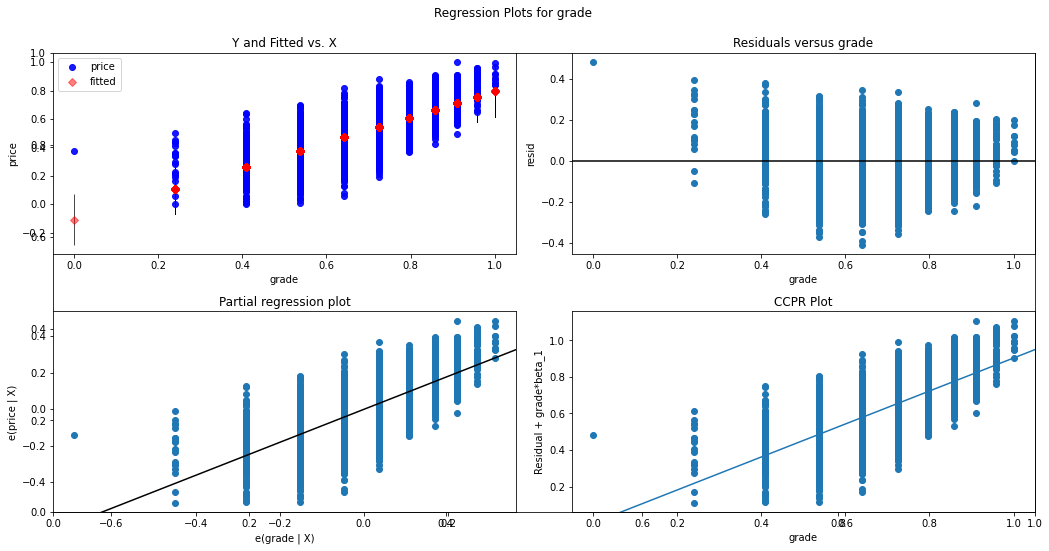

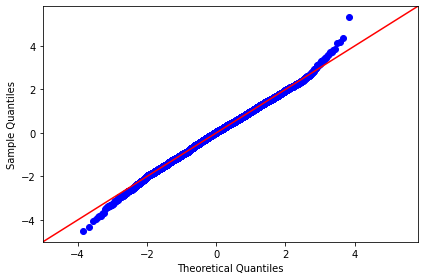

yr_renovated normality tests
['yr_renovated', 0.010656627842173805, 0.5114340843592131, 0.07011974988972279, 1.2765704176174475e-39, 58.83112815778515]


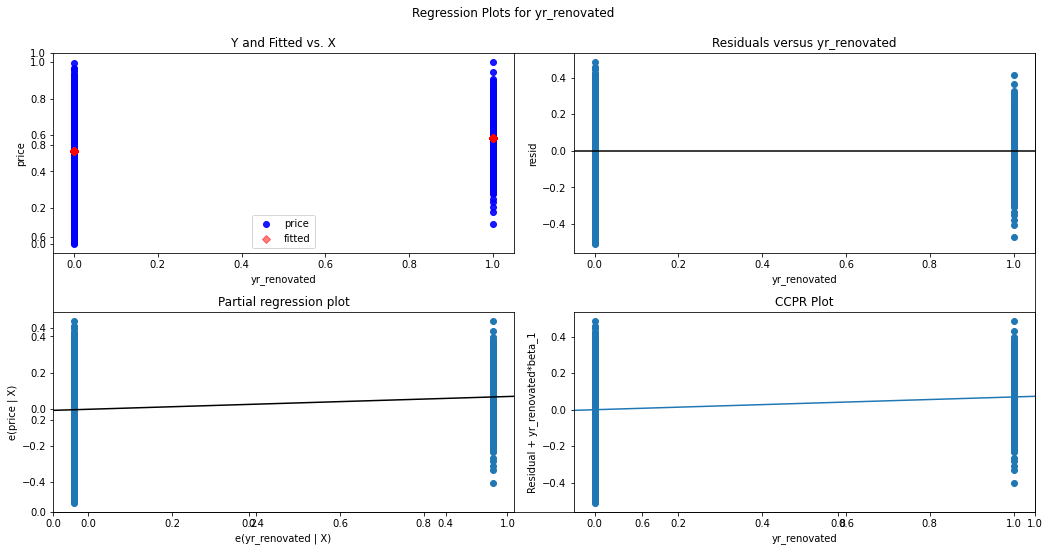

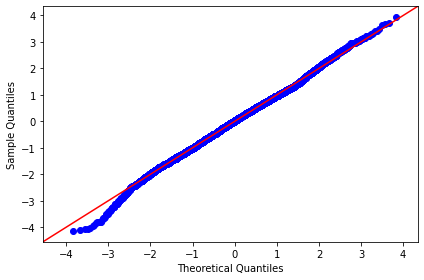

waterfront normality tests
['waterfront', 0.023982789100043922, 0.5122091921779941, 0.22579062674038958, 1.7514797075781732e-87, 47.970014730798525]


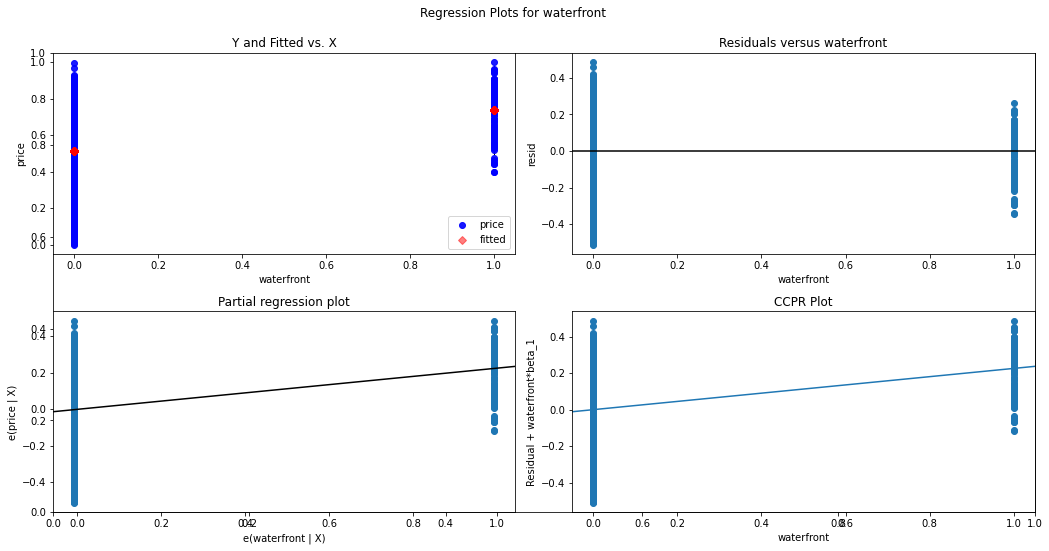

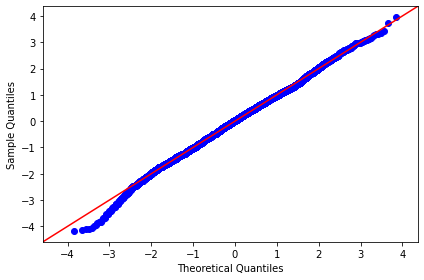

basement normality tests
['basement', 0.042712937569322706, 0.49345786727125895, 0.05259349660004031, 9.549625559390958e-156, 26.010405181327712]


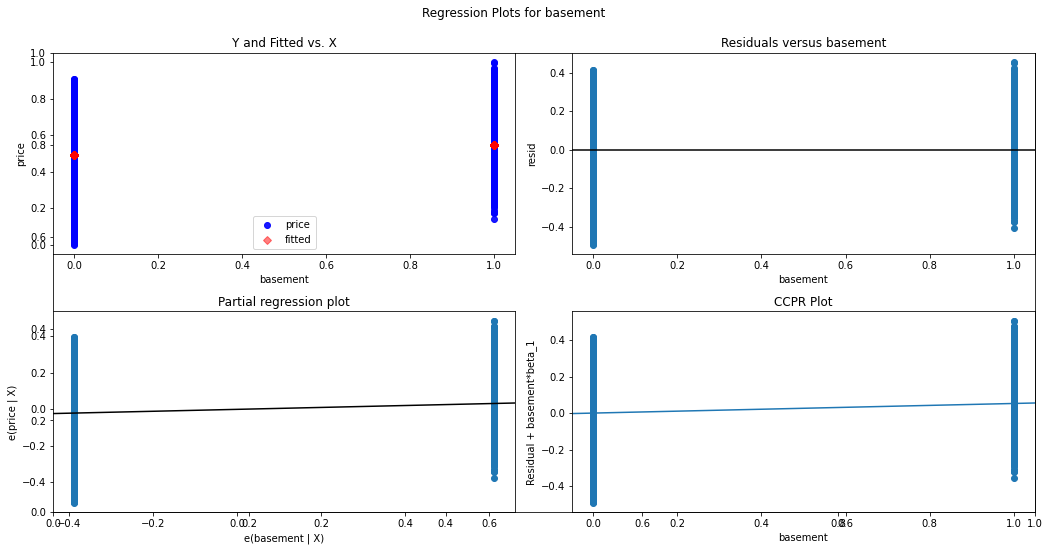

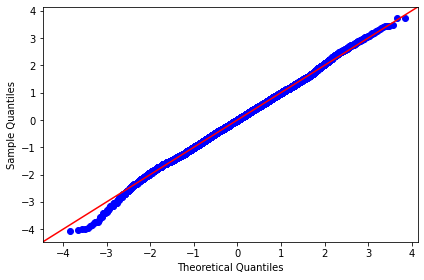

price
0     0.474850
1     0.624233
2     0.687947
3     0.507108
4     0.699675
...        ...
16191 0.570373
16192 0.729929
16193 0.485580
16194 0.597809
16195 0.326359

[16196 rows x 1 columns]

In [314]:
linearity_test(preprocessed_z)

In [328]:
preprocessed_z

price  sqft_living  sqft_lot  sqft_above  zip_sqft  bedrooms  \
0     4.002440     7.661369  4.211720    3.399927  4.704612  1.541444   
1     4.046074     8.580641  4.257717    3.503393  5.033103  1.541444   
2     3.990726     7.163960  4.314317    3.317849  4.862289  0.854859   
3     4.051131     8.258827  4.188255    3.378314  5.171029  2.137438   
4     4.043692     8.076612  4.277318    3.461765  5.002555  1.541444   
...        ...          ...       ...         ...       ...       ...   
21590 4.027407     7.966363  3.853999    3.445902  5.253653  1.541444   
21591 4.032475     8.453733  4.217102    3.513179  4.876334  2.137438   
21592 4.032724     7.491050  3.898995    3.372852  5.149426  0.854859   
21593 4.032475     8.019069  4.033991    3.453534  4.958655  1.541444   
21594 4.022365     7.491050  3.841047    3.372852  5.149426  0.854859   

       bathrooms   floors          view  condition    grade  \
0       0.000000 0.000000 -22728.028431   0.936001 1.401038   
1       1.015150 0.543566 -22728.028431   0.936001 1.401038   
2       0.000000 0.000000 -22728.028431   0.936001 1.322130   
3       1.494931 0.000000 -22728.028431   1.276705 1.401038   
4       0.839042 0.000000 -22728.028431   0.936001 1.465955   
...          ...      ...           ...        ...      ...   
21590   1.182363 0.754730 -22728.028431   0.936001 1.465955   
21591   1.182363 0.543566 -22728.028431   0.936001 1.465955   
21592  -0.266649 0.543566 -22728.028431   0.936001 1.401038   
21593   1.182363 0.543566 -22728.028431   0.936001 1.465955   
21594  -0.266649 0.543566 -22728.028431   0.936001 1.401038   

               yr_renovated  waterfront  basement  
0     -1006207521219.515747    0.000000  0.000000  
1                  0.000000    0.000000  1.000000  
2     -1006207521219.515747    0.000000  0.000000  
3     -1006207521219.515747    0.000000  1.000000  
4     -1006207521219.515747    0.000000  0.000000  
...                     ...         ...       ...  
21590 -1006207521219.515747    0.000000  0.000000  
21591 -1006207521219.515747    0.000000  0.000000  
21592 -1006207521219.515747    0.000000  0.000000  
21593 -1006207521219.515747    0.000000  0.000000  
21594 -1006207521219.515747    0.000000  0.000000  

[21595 rows x 14 columns]

In [320]:
squared_model_z = squared(preprocessed_z)
squared_model_z

Train score:      0.10335246554167217
Validation score: 0.09685067855216815
Train Mean Squarred Error: 0.0020518478584546015
Test Mean Squarred Error: 0.001986623940916426
cros_val r2 = 0.09268774526760545


In [321]:
squared_model_z.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     4142.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:28:56   Log-Likelihood:                 27138.
No. Observations:               16196   AIC:                        -5.423e+04
Df Residuals:                   16171   BIC:                        -5.403e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.841e+10   1.05e+10     -4.598      0.000    -6.9e+10   -2.78e+10
sqft_living         0.8412      0.143      5.877      0.000       0.561       1.122
sqft_lot            0.3669      0.092      3.978      0.000       0.186       0.548
sqft_above         -3.3998      0.363     -9.370      0.000      -4.111      -2.689
zip_sqft            0.7315      0.059     12.381      0.000       0.616       0.847
bedrooms           -0.0342      0.016     -2.202      0.028      -0.065      -0.004
bathrooms           0.0767      0.010      7.820      0.000       0.057       0.096
floors              0.0270      0.005      4.974      0.000       0.016       0.038
view              668.0649     99.071      6.743      0.000     473.875     862.255
condition           0.1519      0.024      6.363      0.000       0.105       0.199
grade              -0.1042      0.088     -1.185      0.236      -0.277       0.068
yr_renovated     4.841e+10   1.05e+10      4.598      0.000    2.78e+10     6.9e+10
waterfront          0.0477      0.002     20.165      0.000       0.043       0.052
basement            0.0205      0.004      5.466      0.000       0.013       0.028
sqft_living_sq     -0.6170      0.148     -4.158      0.000      -0.908      -0.326
sqft_lot_sq        -0.2756      0.091     -3.043      0.002      -0.453      -0.098
sqft_above_sq       3.5281      0.364      9.698      0.000       2.815       4.241
zip_sqft_sq        -0.4247      0.061     -7.000      0.000      -0.544      -0.306
bedrooms_sq        -0.0080      0.021     -0.375      0.708      -0.050       0.034
bathrooms_sq       -0.0380      0.016     -2.362      0.018      -0.069      -0.006
floors_sq          -0.0423      0.008     -5.404      0.000      -0.058      -0.027
view_sq           668.0257     99.069      6.743      0.000     473.839     862.213
condition_sq       -0.0456      0.015     -3.054      0.002      -0.075      -0.016
grade_sq            0.3022      0.086      3.528      0.000       0.134       0.470
yr_renovated_sq  4.841e+10   1.05e+10      4.598      0.000    2.78e+10     6.9e+10
waterfront_sq       0.0459      0.002     19.523      0.000       0.041       0.051
basement_sq        -0.0132      0.004     -3.536      0.000      -0.020      -0.006
==============================================================================
Omnibus:                     2108.805   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9014.541
Skew:                          -0.585   Prob(JB):                         0.00
Kurtosis:                       6.462   Cond. No.                     1.09e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [357]:
mc_z = most_correlated(preprocessed_z)
mc_z

predictor        0
140         grade 0.682732
14    sqft_living 0.670723
56       zip_sqft 0.652279
42     sqft_above 0.572028
84      bathrooms 0.540741
70       bedrooms 0.354304
98         floors 0.329583
112          view 0.313000
182      basement 0.211683
168    waterfront 0.155259
28       sqft_lot 0.112915
154  yr_renovated 0.105948
126     condition 0.042884

# stumble

In [388]:
big_coef_dic_z = make_big_coef_dic(model_z, preprocessed_z)

[('sqft_living', 0.3185003493082615), ('zip_sqft', 0.31634972233039993), ('grade', 0.2691102899977469), ('sqft_lot', 0.10290560025597333), ('waterfront', 0.10135712121457362), ('sqft_above', 0.09192448422710932), ('condition', 0.07281345377599417), ('bathrooms', 0.0539418564769861), ('view', 0.028086600037866453), ('yr_renovated', 0.009612878469364566)]


In [464]:
big_coef_dic_z

{'sqft_living': 0.3185003493082615,
 'zip_sqft': 0.31634972233039993,
 'grade': 0.2691102899977469,
 'sqft_lot': 0.10290560025597333,
 'waterfront': 0.10135712121457362,
 'sqft_above': 0.09192448422710932,
 'condition': 0.07281345377599417,
 'bathrooms': 0.0539418564769861,
 'view': 0.028086600037866453,
 'yr_renovated': 0.009612878469364566,
 'floors': 0.005095666649121018,
 'basement': 0.000520034224838397,
 'bedrooms': -0.04138556379017961}

In [330]:
model_z.pvalues

const          0.000000
sqft_living    0.000000
sqft_lot       0.000000
sqft_above     0.000000
zip_sqft       0.000000
bedrooms       0.000000
bathrooms      0.000000
floors         0.022428
view           0.000000
condition      0.000000
grade          0.000000
yr_renovated   0.000033
waterfront     0.000000
basement       0.216792
dtype: float64

In [479]:
# add ['floors', 'basement'] to list for dropping later

In [391]:
colin_non_price(preprocessed_z).head(30)

level_0      level_1        0
pairs                                                       
(sqft_living, sqft_above)  sqft_living   sqft_above 0.864335
(sqft_above, sqft_living)   sqft_above  sqft_living 0.864335
(sqft_living, bathrooms)   sqft_living    bathrooms 0.767186
(bathrooms, sqft_living)     bathrooms  sqft_living 0.767186
(sqft_living, grade)       sqft_living        grade 0.742443
(grade, sqft_living)             grade  sqft_living 0.742443
(grade, sqft_above)              grade   sqft_above 0.729557
(sqft_above, grade)         sqft_above        grade 0.729557
(bathrooms, sqft_above)      bathrooms   sqft_above 0.694749
(sqft_above, bathrooms)     sqft_above    bathrooms 0.694749
(bathrooms, grade)           bathrooms        grade 0.665375
(grade, bathrooms)               grade    bathrooms 0.665375
(sqft_living, bedrooms)    sqft_living     bedrooms 0.647333
(bedrooms, sqft_living)       bedrooms  sqft_living 0.647333
(bedrooms, sqft_above)        bedrooms   sqft_above 0.548542
(sqft_above, bedrooms)      sqft_above     bedrooms 0.548542
(bedrooms, bathrooms)         bedrooms    bathrooms 0.534700
(bathrooms, bedrooms)        bathrooms     bedrooms 0.534700
(bedrooms, grade)             bedrooms        grade 0.388565
(grade, bedrooms)                grade     bedrooms 0.388565
(sqft_lot, sqft_living)       sqft_lot  sqft_living 0.333779
(sqft_living, sqft_lot)    sqft_living     sqft_lot 0.333779
(sqft_lot, sqft_above)        sqft_lot   sqft_above 0.315238
(sqft_above, sqft_lot)      sqft_above     sqft_lot 0.315238
(zip_sqft, sqft_lot)          zip_sqft     sqft_lot 0.281203
(sqft_lot, zip_sqft)          sqft_lot     zip_sqft 0.281203
(view, waterfront)                view   waterfront 0.248751
(waterfront, view)          waterfront         view 0.248751
(sqft_living, view)        sqft_living         view 0.238914
(view, sqft_living)               view  sqft_living 0.238914

In [480]:
colin_listz = ['sqft_above', 'bathrooms', 'floors', 'basement']

In [392]:
# get rid of sqft_above, bathrooms -- try interaction effect w grade*sqftliving later
colin_listz = ['sqft_above', 'bathrooms', 'floors', 'basement']
preprocessed_z = preprocessed_z.drop(colin_listz, axis=1)


In [454]:
preprocessed_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21595 entries, 0 to 21594
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21595 non-null  float64
 1   sqft_living   21595 non-null  float64
 2   sqft_lot      21595 non-null  float64
 3   zip_sqft      21595 non-null  float64
 4   bedrooms      21595 non-null  float64
 5   view          21595 non-null  float64
 6   condition     21595 non-null  float64
 7   grade         21595 non-null  float64
 8   yr_renovated  21595 non-null  float64
 9   waterfront    21595 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [394]:
model_z_col = make_ols_model(preprocessed_z, cv=True)

Train score:      0.8557970551504088
Validation score: 0.854211172820434
Train Mean Squarred Error: 0.0021535351744818125
Test Mean Squarred Error: 0.002082524490170602
cros_val r2 = 0.8536431689630704


In [395]:
model_z_col.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 1.069e+04
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:22:29   Log-Likelihood:                 26746.
No. Observations:               16196   AIC:                        -5.347e+04
Df Residuals:                   16186   BIC:                        -5.339e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0249      0.004     -6.393      0.000      -0.032      -0.017
sqft_living      0.4141      0.006     71.362      0.000       0.403       0.426
sqft_lot         0.0937      0.003     28.525      0.000       0.087       0.100
zip_sqft         0.3112      0.002    178.074      0.000       0.308       0.315
bedrooms        -0.0420      0.005     -8.915      0.000      -0.051      -0.033
view             0.0245      0.001     18.598      0.000       0.022       0.027
condition        0.0591      0.004     15.462      0.000       0.052       0.067
grade            0.2399      0.005     51.181      0.000       0.231       0.249
yr_renovated     0.0101      0.002      5.005      0.000       0.006       0.014
waterfront       0.0996      0.005     22.069      0.000       0.091       0.108
==============================================================================
Omnibus:                     2041.413   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9039.768
Skew:                          -0.553   Prob(JB):                         0.00
Kurtosis:                       6.489   Cond. No.                         34.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# iteration

In [481]:
feat_list_z = make_corr_coef_features_list(preprocessed_z, mc_z, colin_listz, big_coef_dic_z)
feat_list_z

['',
 'sqft_living',
 'grade',
 'zip_sqft',
 'waterfront',
 'sqft_lot',
 'view',
 'bedrooms',
 'condition',
 'yr_renovated']

In [483]:
feat_list_z.pop(0)
feat_list_z

['sqft_living',
 'grade',
 'zip_sqft',
 'waterfront',
 'sqft_lot',
 'view',
 'bedrooms',
 'condition',
 'yr_renovated']

In [484]:
feat_list_z.append('price')
final_df_z = preprocessed_z[feat_list_z]
final_df_z

sqft_living    grade  zip_sqft  waterfront  sqft_lot          view  \
0         7.661369 1.401038  4.704612    0.000000  4.211720 -22728.028431   
1         8.580641 1.401038  5.033103    0.000000  4.257717 -22728.028431   
2         7.163960 1.322130  4.862289    0.000000  4.314317 -22728.028431   
3         8.258827 1.401038  5.171029    0.000000  4.188255 -22728.028431   
4         8.076612 1.465955  5.002555    0.000000  4.277318 -22728.028431   
...            ...      ...       ...         ...       ...           ...   
21590     7.966363 1.465955  5.253653    0.000000  3.853999 -22728.028431   
21591     8.453733 1.465955  4.876334    0.000000  4.217102 -22728.028431   
21592     7.491050 1.401038  5.149426    0.000000  3.898995 -22728.028431   
21593     8.019069 1.465955  4.958655    0.000000  4.033991 -22728.028431   
21594     7.491050 1.401038  5.149426    0.000000  3.841047 -22728.028431   

       bedrooms  condition          yr_renovated    price  
0      1.541444   0.936001 -1006207521219.515747 4.002440  
1      1.541444   0.936001              0.000000 4.046074  
2      0.854859   0.936001 -1006207521219.515747 3.990726  
3      2.137438   1.276705 -1006207521219.515747 4.051131  
4      1.541444   0.936001 -1006207521219.515747 4.043692  
...         ...        ...                   ...      ...  
21590  1.541444   0.936001 -1006207521219.515747 4.027407  
21591  2.137438   0.936001 -1006207521219.515747 4.032475  
21592  0.854859   0.936001 -1006207521219.515747 4.032724  
21593  1.541444   0.936001 -1006207521219.515747 4.032475  
21594  0.854859   0.936001 -1006207521219.515747 4.022365  

[21595 rows x 10 columns]

In [485]:
final_model_z = make_ols_model(final_df_z, cv=True)

Train score:      0.8557970453417327
Validation score: 0.8542123222587247
Train Mean Squarred Error: 0.002146996202566876
Test Mean Squarred Error: 0.002103560457441805
cros_val r2 = 0.8536429553516955


In [487]:
final_model_z.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 1.067e+04
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:14:54   Log-Likelihood:                 26770.
No. Observations:               16196   AIC:                        -5.352e+04
Df Residuals:                   16186   BIC:                        -5.344e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0282      0.004     -7.407      0.000      -0.036      -0.021
sqft_living      0.4298      0.006     71.552      0.000       0.418       0.442
grade            0.2428      0.005     52.105      0.000       0.234       0.252
zip_sqft         0.3100      0.002    176.619      0.000       0.307       0.313
waterfront       0.1041      0.005     22.026      0.000       0.095       0.113
sqft_lot         0.0899      0.003     28.164      0.000       0.084       0.096
view             0.0252      0.001     18.918      0.000       0.023       0.028
bedrooms        -0.0378      0.004     -8.717      0.000      -0.046      -0.029
condition        0.0622      0.004     16.418      0.000       0.055       0.070
yr_renovated     0.0095      0.002      4.727      0.000       0.006       0.013
==============================================================================
Omnibus:                     2026.137   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9495.290
Skew:                          -0.530   Prob(JB):                         0.00
Kurtosis:                       6.598   Cond. No.                         34.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [488]:
final_df_interact_z = final_df_z.copy()
final_df_interact_z['grade*sqft_living'] = final_df_z['grade'] * final_df_z['sqft_living']
final_df_interact_z

sqft_living    grade  zip_sqft  waterfront  sqft_lot          view  \
0         7.661369 1.401038  4.704612    0.000000  4.211720 -22728.028431   
1         8.580641 1.401038  5.033103    0.000000  4.257717 -22728.028431   
2         7.163960 1.322130  4.862289    0.000000  4.314317 -22728.028431   
3         8.258827 1.401038  5.171029    0.000000  4.188255 -22728.028431   
4         8.076612 1.465955  5.002555    0.000000  4.277318 -22728.028431   
...            ...      ...       ...         ...       ...           ...   
21590     7.966363 1.465955  5.253653    0.000000  3.853999 -22728.028431   
21591     8.453733 1.465955  4.876334    0.000000  4.217102 -22728.028431   
21592     7.491050 1.401038  5.149426    0.000000  3.898995 -22728.028431   
21593     8.019069 1.465955  4.958655    0.000000  4.033991 -22728.028431   
21594     7.491050 1.401038  5.149426    0.000000  3.841047 -22728.028431   

       bedrooms  condition          yr_renovated    price  grade*sqft_living  
0      1.541444   0.936001 -1006207521219.515747 4.002440          10.733869  
1      1.541444   0.936001              0.000000 4.046074          12.021803  
2      0.854859   0.936001 -1006207521219.515747 3.990726           9.471688  
3      2.137438   1.276705 -1006207521219.515747 4.051131          11.570930  
4      1.541444   0.936001 -1006207521219.515747 4.043692          11.839946  
...         ...        ...                   ...      ...                ...  
21590  1.541444   0.936001 -1006207521219.515747 4.027407          11.678326  
21591  2.137438   0.936001 -1006207521219.515747 4.032475          12.392789  
21592  0.854859   0.936001 -1006207521219.515747 4.032724          10.495246  
21593  1.541444   0.936001 -1006207521219.515747 4.032475          11.755591  
21594  0.854859   0.936001 -1006207521219.515747 4.022365          10.495246  

[21595 rows x 11 columns]

In [489]:
final_interact_model_z = make_ols_model(final_df_interact_z, cv=True)

Train score:      0.8567841115789141
Validation score: 0.8552714581243146
Train Mean Squarred Error: 0.002155165012196969
Test Mean Squarred Error: 0.0020196940140588607
cros_val r2 = 0.8547667331931061


In [490]:
final_interact_model_z.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     9727.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:16:46   Log-Likelihood:                 26740.
No. Observations:               16196   AIC:                        -5.346e+04
Df Residuals:                   16185   BIC:                        -5.337e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0164      0.011      1.438      0.150      -0.006       0.039
sqft_living          -0.0998      0.048     -2.090      0.037      -0.193      -0.006
grade                -0.2340      0.049     -4.752      0.000      -0.331      -0.137
zip_sqft              0.3079      0.002    175.606      0.000       0.305       0.311
waterfront            0.0973      0.005     20.564      0.000       0.088       0.107
sqft_lot              0.0840      0.003     25.555      0.000       0.078       0.090
view                  0.0236      0.001     17.895      0.000       0.021       0.026
bedrooms             -0.0358      0.005     -7.575      0.000      -0.045      -0.027
condition             0.0623      0.004     16.333      0.000       0.055       0.070
yr_renovated          0.0105      0.002      5.158      0.000       0.006       0.014
grade*sqft_living     0.9884      0.088     11.222      0.000       0.816       1.161
==============================================================================
Omnibus:                     2093.843   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8502.481
Skew:                          -0.596   Prob(JB):                         0.00
Kurtosis:                       6.343   Cond. No.                         540.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

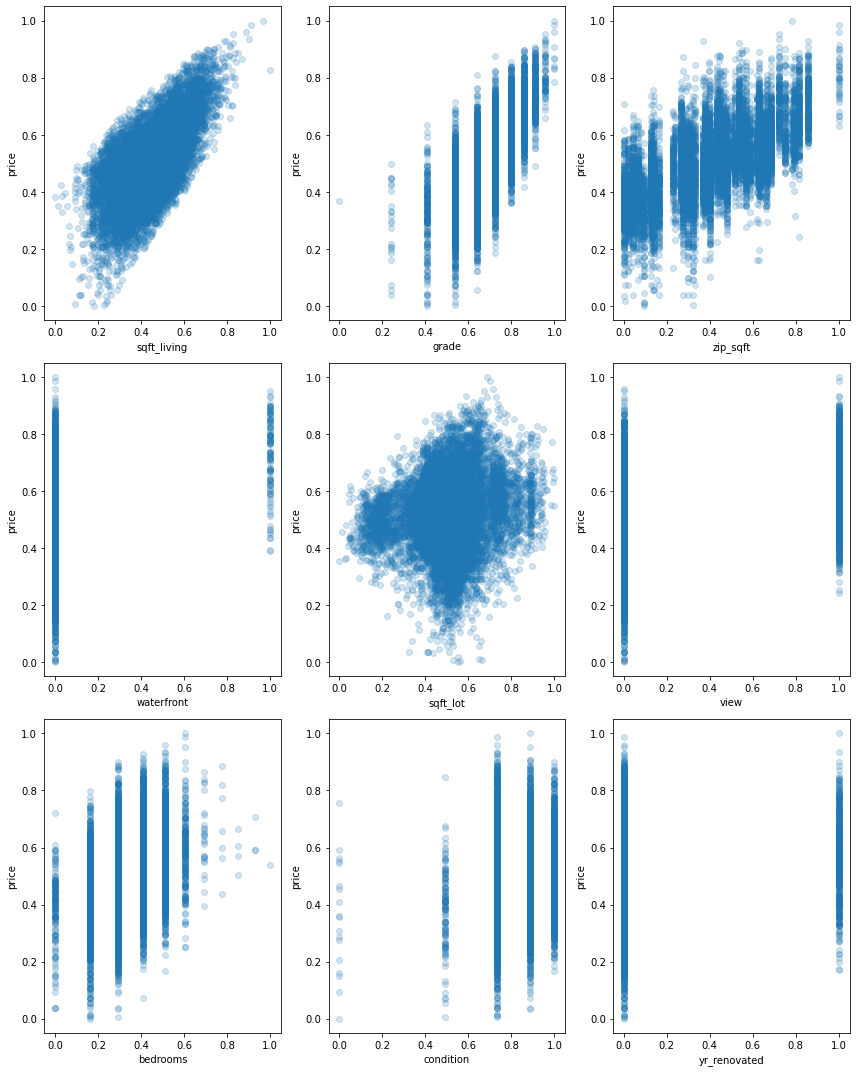

In [493]:
scatterplot(final_df_z)

In [496]:
#sqft_lot looks non-linear so drop
final_df_z.drop('sqft_lot', axis=1, inplace=True)

In [497]:
final_model_z = make_ols_model(final_df_z, cv=True)

Train score:      0.8484636739882717
Validation score: 0.8469240334510241
Train Mean Squarred Error: 0.002246149914118122
Test Mean Squarred Error: 0.0022398010147248212
cros_val r2 = 0.8462558849623877


In [498]:
final_model_z.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 1.132e+04
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:21:53   Log-Likelihood:                 26405.
No. Observations:               16196   AIC:                        -5.279e+04
Df Residuals:                   16187   BIC:                        -5.272e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0710      0.005    -15.408      0.000      -0.080      -0.062
sqft_living      0.4624      0.006     80.536      0.000       0.451       0.474
grade            0.3004      0.006     47.947      0.000       0.288       0.313
zip_sqft         0.2946      0.002    174.780      0.000       0.291       0.298
waterfront       0.1075      0.005     22.690      0.000       0.098       0.117
view             0.0252      0.001     18.787      0.000       0.023       0.028
bedrooms        -0.0420      0.004     -9.410      0.000      -0.051      -0.033
condition        0.0754      0.004     19.532      0.000       0.068       0.083
yr_renovated     0.0112      0.002      5.272      0.000       0.007       0.015
==============================================================================
Omnibus:                     1459.064   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6709.810
Skew:                          -0.333   Prob(JB):                         0.00
Kurtosis:                       6.082   Cond. No.                         37.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

price normality tests
['price', 1.0, 2.654126918244515e-16, 0.9999999999999997, 0.0, 1653.6717488209197]


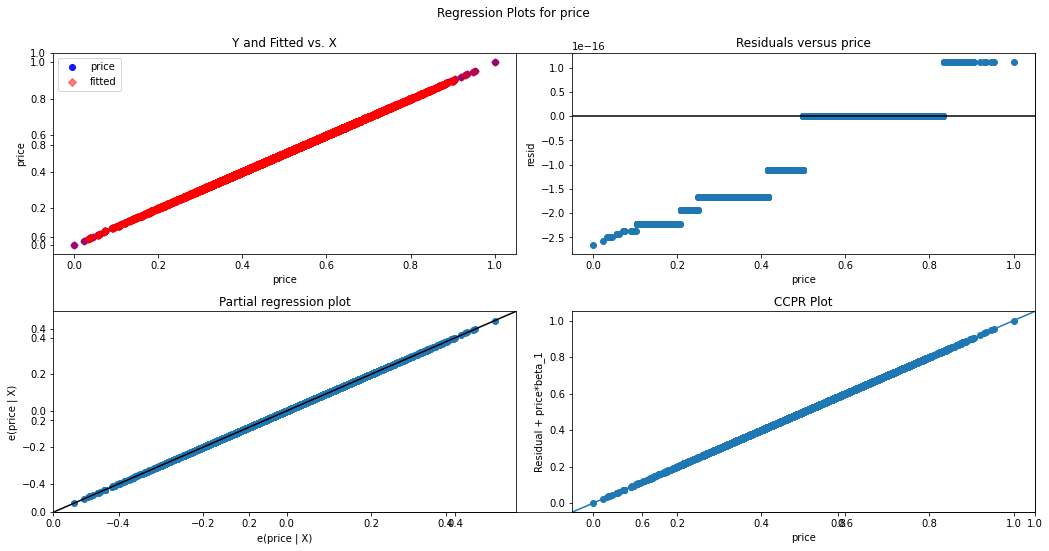

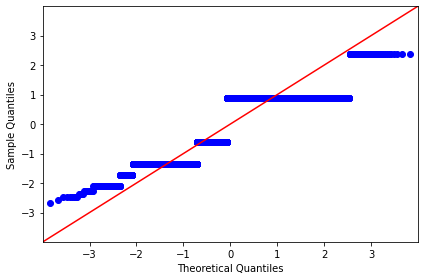

sqft_living normality tests
['sqft_living', 0.44557935015134176, 0.19913900372443227, 0.6699164858021873, 0.0, 121.58222971439528]


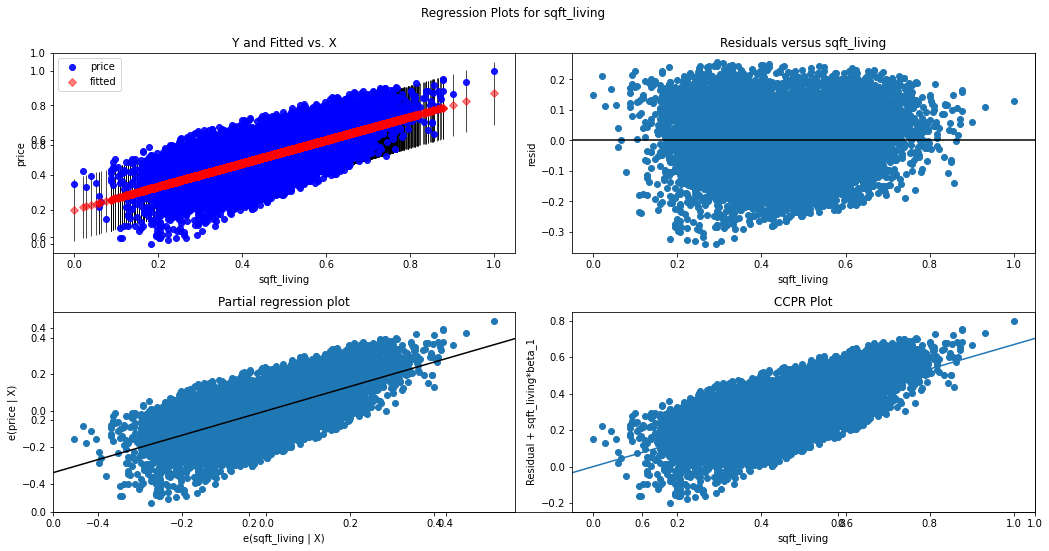

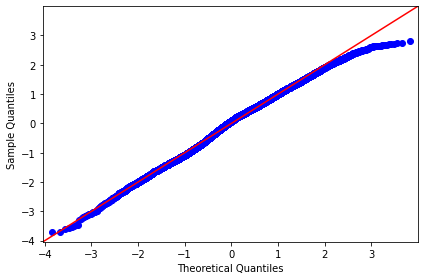

grade normality tests
['grade', 0.46372620645002016, -0.10864215862714224, 0.8914538344116919, 0.0, 64.02870939966719]


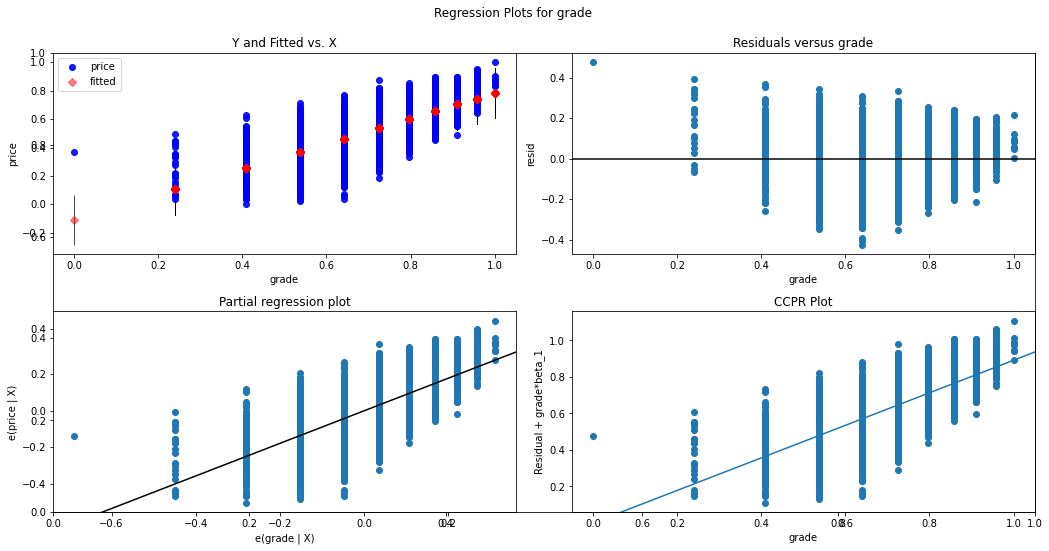

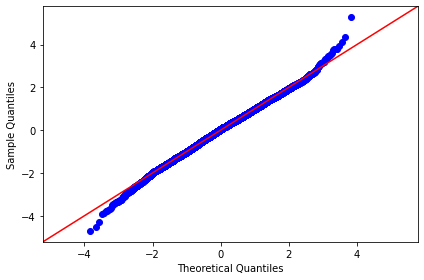

zip_sqft normality tests
['zip_sqft', 0.4188733486029902, 0.3701442618223667, 0.34899972534170876, 0.0, 564.7293877617043]


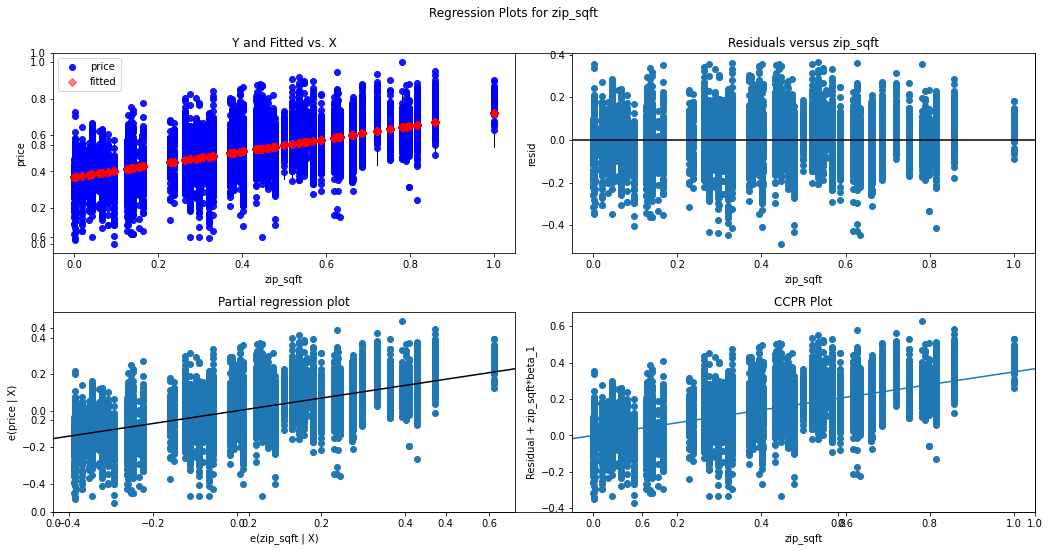

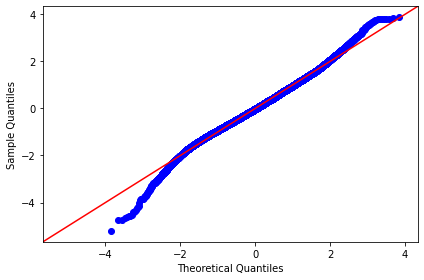

waterfront normality tests
['waterfront', 0.02254689142332611, 0.5041166715463287, 0.2270241840506253, 2.6688280956634584e-82, 44.62315600436819]


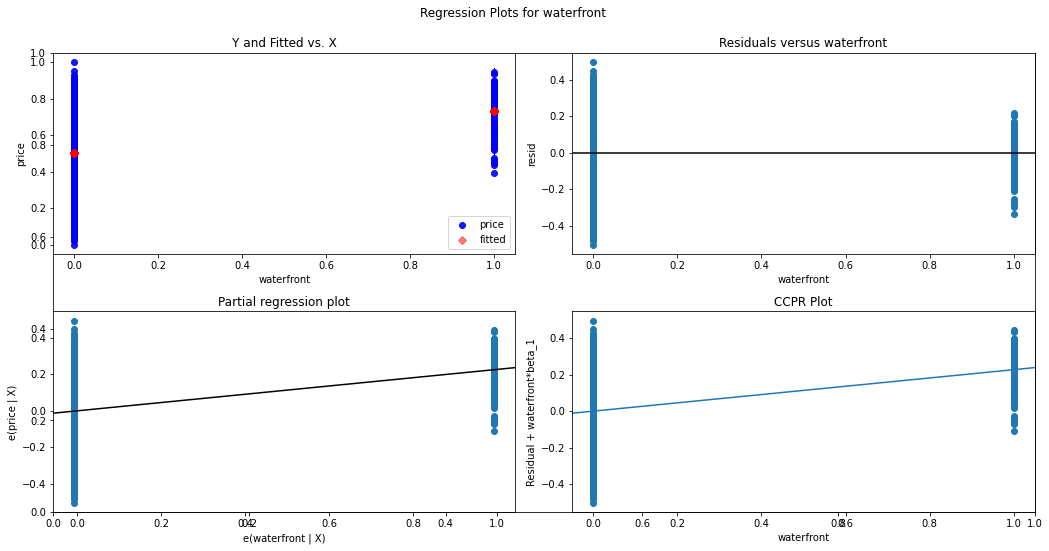

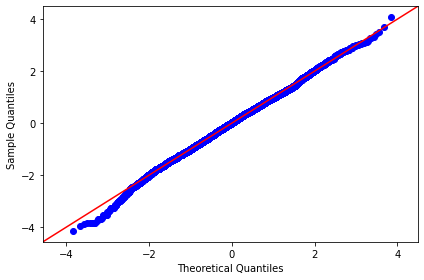

view normality tests
['view', 0.09703421437572235, 0.4929793702014753, 0.12878773542593278, 0.0, 79.87823314481639]


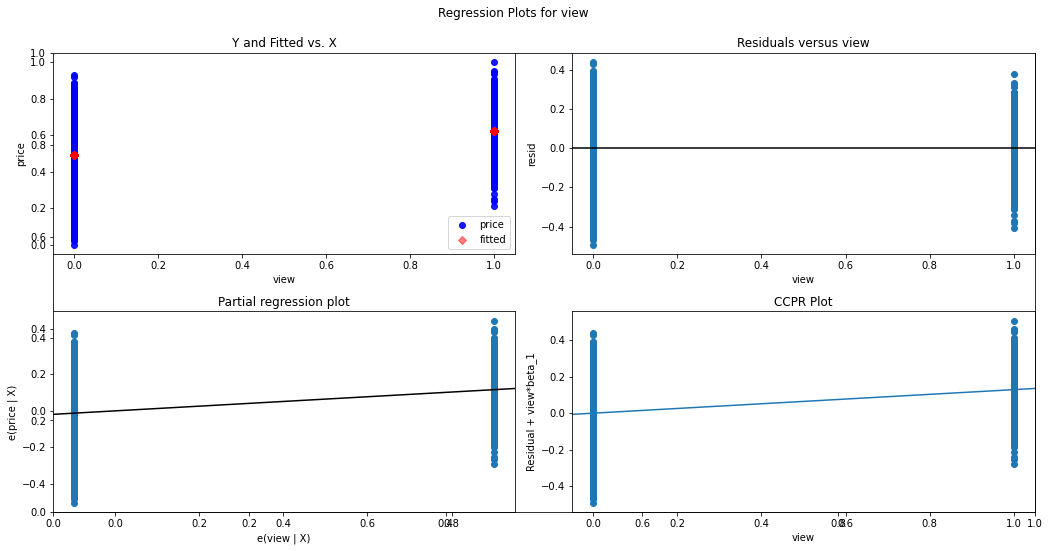

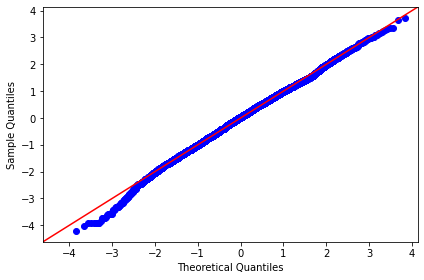

bedrooms normality tests
['bedrooms', 0.12344584647443124, 0.36847931676985435, 0.3836721222105671, 0.0, 12.666250484991263]


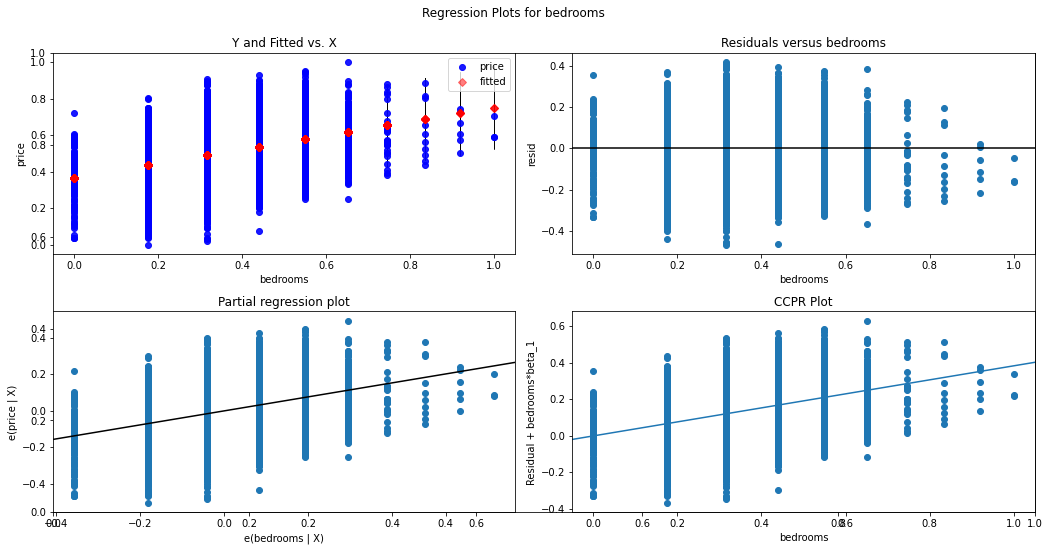

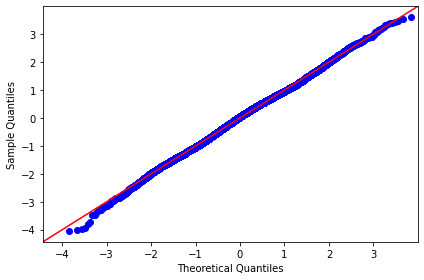

condition normality tests
['condition', 0.0023103408589740804, 0.4576478982547121, 0.0606129975549414, 9.350871915386745e-10, 40.365850555087206]


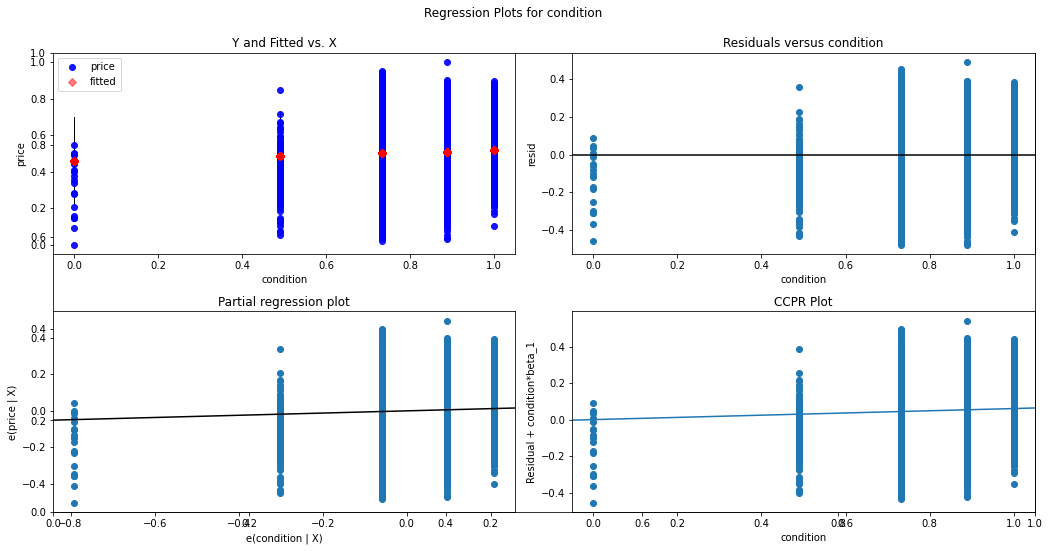

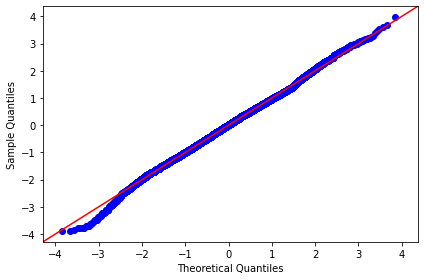

yr_renovated normality tests
['yr_renovated', 0.008643574270941867, 0.5034675235870416, 0.06266943153144557, 1.989698499313487e-32, 52.32245543673809]


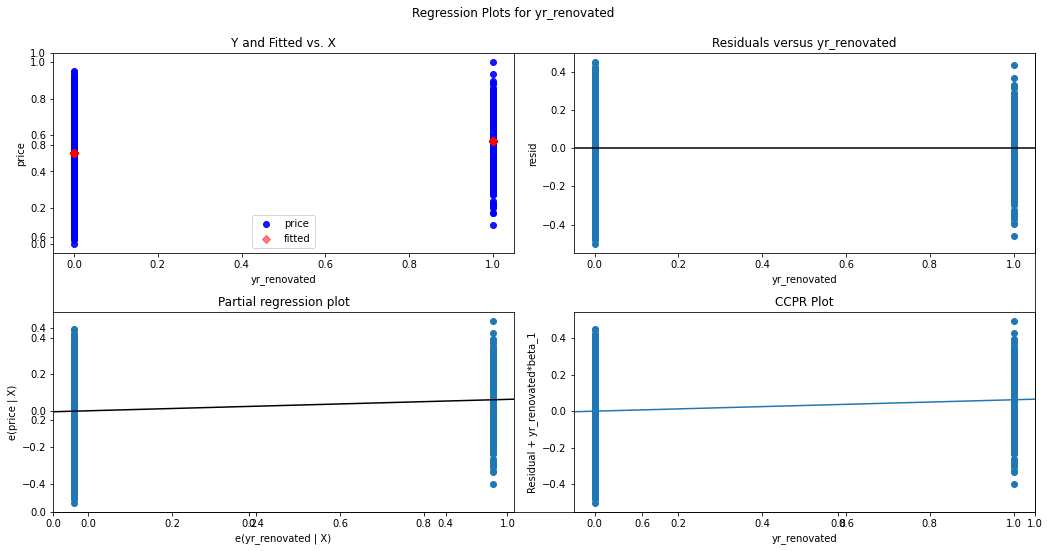

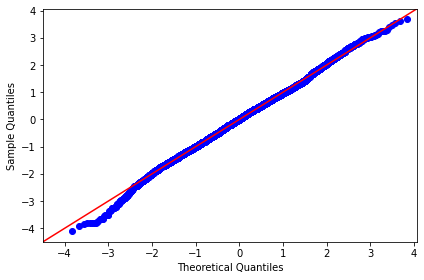

price
0     0.353568
1     0.445315
2     0.218825
3     0.580973
4     0.319022
...        ...
16191 0.454447
16192 0.407164
16193 0.294613
16194 0.503165
16195 0.354670

[16196 rows x 1 columns]

In [499]:
linearity_test(final_df_z)

In [506]:
orig_df_z = zip_val_df.copy()
orig_df_z = orig_df_z[feat_list_z]
orig_df_z.drop('sqft_lot', axis=1, inplace=True)
orig_df_z

sqft_living  grade   zip_sqft  waterfront     view  bedrooms  \
0             1180      7 179.600000    0.000000 0.000000         3   
1             2570      7 269.100000    0.000000 0.000000         3   
2              770      6 217.900000    0.000000 0.000000         2   
3             1960      7 319.500000    0.000000 0.000000         4   
4             1680      8 259.100000    0.000000 0.000000         3   
...            ...    ...        ...         ...      ...       ...   
21590         1530      8 354.300000    0.000000 0.000000         3   
21591         2310      8 221.700000    0.000000 0.000000         4   
21592         1020      7 311.000000    0.000000 0.000000         2   
21593         1600      8 245.400000    0.000000 0.000000         3   
21594         1020      7 311.000000    0.000000 0.000000         2   

       condition  yr_renovated         price  
0              3      0.000000 221900.000000  
1              3      1.000000 538000.000000  
2              3      0.000000 180000.000000  
3              5      0.000000 604000.000000  
4              3      0.000000 510000.000000  
...          ...           ...           ...  
21590          3      0.000000 360000.000000  
21591          3      0.000000 400000.000000  
21592          3      0.000000 402101.000000  
21593          3      0.000000 400000.000000  
21594          3      0.000000 325000.000000  

[21595 rows x 9 columns]

In [507]:
y_z = orig_df_z["price"]
x_z = orig_df_z.drop("price", axis=1)
x_trainz, x_testz, y_trainz, y_testz = train_test_split(x_z, y_z)

x_z_int = sm.add_constant(x_trainz)
    

predictors_intz = sm.add_constant(x_trainz)
modelz = sm.OLS(y_trainz, predictors_intz).fit()
    
predictors_testz = sm.add_constant(x_testz)
    
y_hat_trainz = modelz.predict(predictors_intz)
y_hat_testz = modelz.predict(predictors_testz)
    
regression = LinearRegression()
model_scoresz = cross_validate(
    estimator=regression,
    scoring=('r2','neg_mean_squared_error'),
    X=x_z,
    y=y_z,
    return_train_score=True,
    cv=5)
        
print("Train score:     ", model_scoresz["train_r2"].mean())
print("Validation score:", model_scoresz["test_r2"].mean())

train_msez = mean_squared_error(y_trainz, y_hat_trainz)
test_msez = mean_squared_error(y_testz, y_hat_testz)
print('Train Mean Squarred Error:', train_msez)
print('Test Mean Squarred Error:', test_msez)
    
r_sqz = np.mean(cross_val_score(regression, x_z, y_z, scoring='r2', cv=10))
print(f'cros_val r2 = {r_sqz}')

Train score:      0.7842406308674926
Validation score: 0.7822727812410578
Train Mean Squarred Error: 28654516059.226776
Test Mean Squarred Error: 30690030191.41518
cros_val r2 = 0.7824269639257327


In [508]:
modelz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     7455.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:33:06   Log-Likelihood:            -2.1797e+05
No. Observations:               16196   AIC:                         4.360e+05
Df Residuals:                   16187   BIC:                         4.360e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.462e+05   1.48e+04    -57.115      0.000   -8.75e+05   -8.17e+05
sqft_living    208.7627      2.677     77.989      0.000     203.516     214.010
grade          5.38e+04   1841.619     29.212      0.000    5.02e+04    5.74e+04
zip_sqft      1968.6474     17.304    113.770      0.000    1934.730    2002.565
waterfront    7.082e+05   1.73e+04     40.818      0.000    6.74e+05    7.42e+05
view          4.749e+04   2001.706     23.726      0.000    4.36e+04    5.14e+04
bedrooms      -2.81e+04   1867.063    -15.051      0.000   -3.18e+04   -2.44e+04
condition     3.304e+04   2106.923     15.684      0.000    2.89e+04    3.72e+04
yr_renovated  4.975e+04   4768.636     10.433      0.000    4.04e+04    5.91e+04
==============================================================================
Omnibus:                    16097.793   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3191807.114
Skew:                           4.409   Prob(JB):                         0.00
Kurtosis:                      71.206   Cond. No.                     2.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [509]:
big_list_z = list(modelz.params[1:])
z_list = list(orig_df_z.columns)
z_list.remove('price')

In [510]:
z_dict = dict(zip(z_list, big_list_z))
z_sl = sorted(z_dict.items(), key=lambda x:x[1], reverse=True)
z_sort = dict(z_sl)
print(z_sl)

[('waterfront', 708172.0926300277), ('grade', 53797.994769886864), ('yr_renovated', 49752.9912454592), ('view', 47492.965603112956), ('condition', 33043.99292589021), ('zip_sqft', 1968.6473601025677), ('sqft_living', 208.76269259508587), ('bedrooms', -28100.73731163373)]


In [511]:
print(modelz.params[0])

-846187.6640621168


In [514]:
# need to add zipcode for info, get rid of condition and bedrooms
-846187+(1180*209)+(7*53797)+(179.6*1968)+(3*-28100)+(3*33043)

145293.8

In [515]:
orig_df_z

sqft_living  grade   zip_sqft  waterfront     view  bedrooms  \
0             1180      7 179.600000    0.000000 0.000000         3   
1             2570      7 269.100000    0.000000 0.000000         3   
2              770      6 217.900000    0.000000 0.000000         2   
3             1960      7 319.500000    0.000000 0.000000         4   
4             1680      8 259.100000    0.000000 0.000000         3   
...            ...    ...        ...         ...      ...       ...   
21590         1530      8 354.300000    0.000000 0.000000         3   
21591         2310      8 221.700000    0.000000 0.000000         4   
21592         1020      7 311.000000    0.000000 0.000000         2   
21593         1600      8 245.400000    0.000000 0.000000         3   
21594         1020      7 311.000000    0.000000 0.000000         2   

       condition  yr_renovated         price  
0              3      0.000000 221900.000000  
1              3      1.000000 538000.000000  
2              3      0.000000 180000.000000  
3              5      0.000000 604000.000000  
4              3      0.000000 510000.000000  
...          ...           ...           ...  
21590          3      0.000000 360000.000000  
21591          3      0.000000 400000.000000  
21592          3      0.000000 402101.000000  
21593          3      0.000000 400000.000000  
21594          3      0.000000 325000.000000  

[21595 rows x 9 columns]